# Advanced Regression Case Study

In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Data Understatnding

In [2]:
# Reading the CSV
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the shape of the dataframe
df.shape

(1460, 81)

In [4]:
# Checking the info of datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To see all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Finding the amount of null value in each column
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Percentage of null value in each column
df.isnull().mean().round(4) * 100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Data Cleaning 

#### Using the provided dictionary for imputing the values

In [8]:
# Checking the missing value in the field LotFrontage
df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [9]:
# Imputing the missing value using median value
lot_median = df['LotFrontage'].median()
df['LotFrontage'].fillna(lot_median, inplace = True)

In [10]:
# Again checking for any missing value
df['LotFrontage'] = df['LotFrontage'].astype('int64')
df['LotFrontage'].isnull().sum()

0

In [11]:
# Checking the missing value in the field Alley
df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [12]:
# In the dictionary we can see NA means No alley access so we will replace the Nan with that
df['Alley'].fillna('No alley access', inplace = True)

In [13]:
# Again cheking in the alley column
df['Alley'].value_counts(dropna=False)

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [14]:
# Checking the missing value in the field MasVnrType
df['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [15]:
# Imputing the missing value with most common categorical term
df['MasVnrType'].fillna('None', inplace = True)

In [16]:
# Again checking the value in the field MasVnrType
df['MasVnrType'].value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
# Checking the missing value in the field MasVnrArea
df['MasVnrArea'].value_counts(dropna=False)

0.0       861
72.0        8
180.0       8
NaN         8
108.0       8
120.0       7
16.0        7
106.0       6
80.0        6
340.0       6
200.0       6
132.0       5
170.0       5
360.0       5
84.0        5
320.0       5
270.0       4
183.0       4
100.0       4
168.0       4
252.0       4
178.0       4
246.0       4
196.0       4
288.0       4
216.0       4
160.0       4
220.0       4
336.0       4
210.0       4
76.0        4
300.0       4
40.0        4
268.0       4
456.0       4
42.0        3
44.0        3
99.0        3
74.0        3
420.0       3
82.0        3
110.0       3
208.0       3
169.0       3
90.0        3
148.0       3
166.0       3
350.0       3
145.0       3
186.0       3
240.0       3
272.0       3
104.0       3
174.0       3
176.0       3
136.0       3
70.0        3
50.0        3
116.0       3
226.0       3
128.0       3
312.0       3
85.0        3
256.0       3
130.0       3
147.0       2
205.0       2
135.0       2
284.0       2
362.0       2
660.0       2
101.0 

In [18]:
# Imputing the null value with median
mas_median = df['MasVnrArea'].median()
df['MasVnrArea'].fillna(mas_median, inplace = True)

In [19]:
# Converting to int
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')
df['MasVnrArea'].isnull().sum()

0

In [20]:
# Checking the missing value in the field BsmtQual
df['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [21]:
# Filling with No Basement where it is null
df['BsmtQual'].fillna('No Basement', inplace = True)

In [22]:
# Again checking the values
df['BsmtQual'].value_counts(dropna=False)

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [23]:
# Checking the missing value in the field BsmtCond
df['BsmtCond'].value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [24]:
# Filling with No Basement where it is null
df['BsmtCond'].fillna('No Basement', inplace = True)

In [25]:
# Again checking the values
df['BsmtCond'].value_counts(dropna=False)

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [26]:
# Checking the missing value in the field BsmtExposure
df['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [27]:
# Filling with No Basement where it is null
df['BsmtExposure'].fillna('No Basement', inplace = True)

In [28]:
# Again checking the values
df['BsmtExposure'].value_counts(dropna=False)

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [29]:
# Checking the missing value in the field BsmtFinType1
df['BsmtFinType1'].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [30]:
# Filling with No Basement where it is null
df['BsmtFinType1'].fillna('No Basement', inplace = True)

In [31]:
# Again checking the values
df['BsmtFinType1'].value_counts(dropna=False)

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [32]:
# Checking the missing value in the field BsmtFinType2
df['BsmtFinType2'].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
# Filling with No Basement where it is null
df['BsmtFinType2'].fillna('No Basement', inplace = True)

In [34]:
# Again checking the values
df['BsmtFinType2'].value_counts(dropna=False)

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [35]:
# Checking the missing value in the field Electrical
df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [36]:
# Filling the null value with most common value
df['Electrical'].fillna('SBrkr', inplace = True)

In [37]:
# Again checking the values
df['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
# Checking the missing value in the field FireplaceQu
df['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [39]:
# Filling with No Fireplace where it is null
df['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [40]:
# Again checking the values
df['FireplaceQu'].value_counts(dropna=False)

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [41]:
# Checking the missing value in the field GarageType
df['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
# Filling with No Garage where it is null
df['GarageType'].fillna('No Garage', inplace = True)

In [43]:
# Again checking the values
df['GarageType'].value_counts(dropna=False)

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [44]:
# Checking the missing value in the field GarageFinish
df['GarageFinish'].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [45]:
# Filling with No Garage where it is null
df['GarageFinish'].fillna('No Garage', inplace = True)

In [46]:
# Again checking the values
df['GarageFinish'].value_counts(dropna=False)

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [47]:
# Checking the missing value in the field GarageQual
df['GarageQual'].value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [48]:
# Filling with No Garage where it is null
df['GarageQual'].fillna('No Garage', inplace = True)

In [49]:
# Again checking the values
df['GarageQual'].value_counts(dropna=False)

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [50]:
# Checking the missing value in the field GarageCond
df['GarageCond'].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [51]:
# Filling with No Garage where it is null
df['GarageCond'].fillna('No Garage', inplace = True)

In [52]:
# Again checking the values
df['GarageCond'].value_counts(dropna=False)

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [53]:
# Checking the missing value in the field PoolQC
df['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [54]:
# Filling with No Pool where it is null
df['PoolQC'].fillna('No Pool', inplace = True)

In [55]:
# Again checking the values
df['PoolQC'].value_counts(dropna=False)

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [56]:
# Checking the missing value in the field Fence
df['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [57]:
# Filling with No Fence where it is null
df['Fence'].fillna('No Fence', inplace = True)

In [58]:
# Again checking the values
df['Fence'].value_counts(dropna=False)

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [59]:
# Checking the missing value in the field MiscFeature
df['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [60]:
# Filling with None where it is null
df['MiscFeature'].fillna('None', inplace = True)

In [61]:
# Again checking the values
df['MiscFeature'].value_counts(dropna=False)

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [62]:
# Dropping some column which are not required
df = df.drop(['Id', 'GarageYrBlt'], axis=1)

In [63]:
# Checking again the Percentage of null value in each column
df.isnull().mean().round(4) * 100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [64]:
# Again Checking the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

#### Now Let us look all the columns in more detail

In [65]:
# Checking the Value count
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [66]:
# Lets convert it into categorical form as given in data dictionary
df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
                          30:'1-STORY 1945 & OLDER',
                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                          50:'1-1/2 STORY FINISHED ALL AGES',
                          60:'2-STORY 1946 & NEWER',
                          70:'2-STORY 1945 & OLDER',
                          75:'2-1/2 STORY ALL AGES',
                          80:'SPLIT OR MULTI-LEVEL',
                          85:'SPLIT FOYER',
                          90:'DUPLEX - ALL STYLES AND AGES',
                          120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                          150:'1-1/2 STORY PUD - ALL AGES',
                          160:'2-STORY PUD - 1946 & NEWER',
                          180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                          190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
                          },inplace=True)

In [67]:
# Checking the Value count in percentage
df['MSSubClass'].value_counts(1)

1-STORY 1946 & NEWER ALL STYLES                          0.367123
2-STORY 1946 & NEWER                                     0.204795
1-1/2 STORY FINISHED ALL AGES                            0.098630
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.059589
1-STORY 1945 & OLDER                                     0.047260
2-STORY PUD - 1946 & NEWER                               0.043151
2-STORY 1945 & OLDER                                     0.041096
SPLIT OR MULTI-LEVEL                                     0.039726
DUPLEX - ALL STYLES AND AGES                             0.035616
2 FAMILY CONVERSION - ALL STYLES AND AGES                0.020548
SPLIT FOYER                                              0.013699
2-1/2 STORY ALL AGES                                     0.010959
1-1/2 STORY - UNFINISHED ALL AGES                        0.008219
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                  0.006849
1-STORY W/FINISHED ATTIC ALL AGES                        0.002740
Name: MSSu

In [68]:
# Replacing categories having less than 5% to others
df['MSSubClass'].replace({'1-STORY W/FINISHED ATTIC ALL AGES': 'Other',
                          'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER' : 'Other',
                          '1-1/2 STORY - UNFINISHED ALL AGES' : 'Other',
                          '2-1/2 STORY ALL AGES' : 'Other',
                          '2 FAMILY CONVERSION - ALL STYLES AND AGES' : 'Other',
                          'SPLIT FOYER' : 'Other',
                          'DUPLEX - ALL STYLES AND AGES' : 'Other',
                          'SPLIT OR MULTI-LEVEL' : 'Other',
                          '2-STORY 1945 & OLDER' : 'Other',
                          '2-STORY PUD - 1946 & NEWER' : 'Other',
                          '1-STORY 1945 & OLDER' : 'Other'
                          },inplace=True)

In [69]:
# Checking the Value count in percentage
df['MSSubClass'].value_counts(1)

1-STORY 1946 & NEWER ALL STYLES                          0.367123
Other                                                    0.269863
2-STORY 1946 & NEWER                                     0.204795
1-1/2 STORY FINISHED ALL AGES                            0.098630
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.059589
Name: MSSubClass, dtype: float64

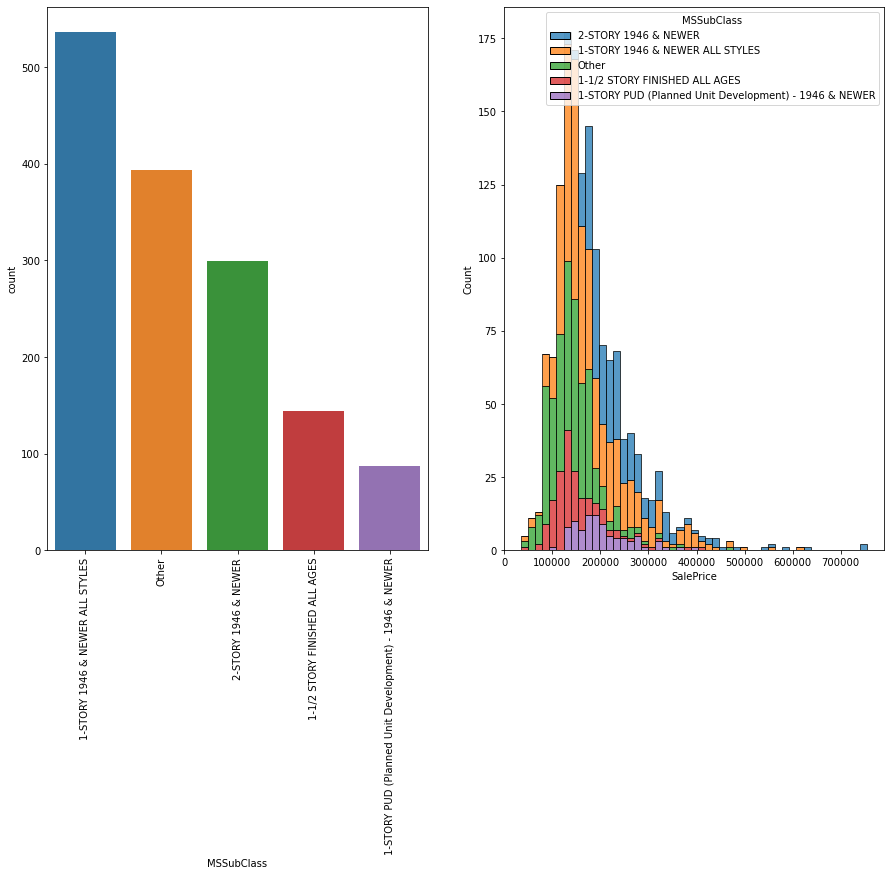

In [70]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,10))
axes[0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axes[0], x = 'MSSubClass',data = df,order = df['MSSubClass'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='MSSubClass', x = 'SalePrice',multiple='stack')
plt.show()


<b>As we can see that 1-STORY 1946 & NEWER ALL STYLES is the most sold class of house but 2-STORY 1946 & NEWER in general fetch a better Sale Price</b>

In [71]:
# Checking the Value count
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [72]:
# Checking the Value count in percentage
df['MSZoning'].value_counts(1)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [73]:
# Replacing categories having less than 5% to others
df['MSZoning'].replace({'C (all)': 'Other',
                        'RH' : 'Other',
                        'FV' : 'Other',                                            
                        },inplace=True)

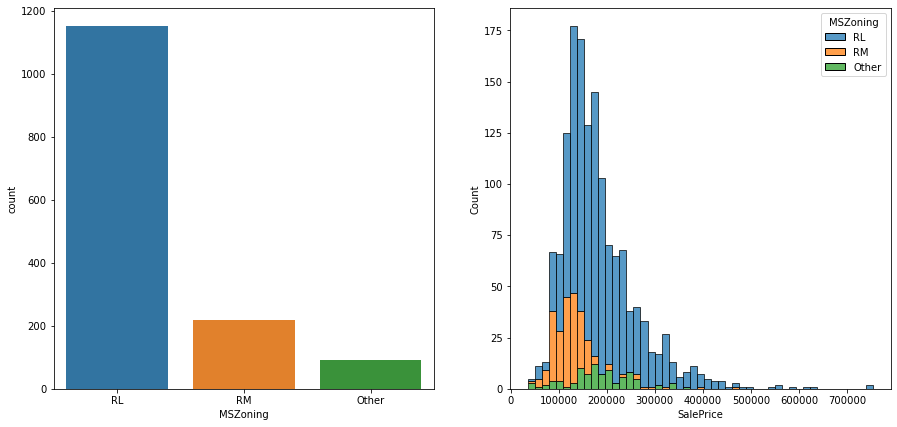

In [74]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'MSZoning',data = df,order = df['MSZoning'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='MSZoning', x = 'SalePrice',multiple='stack')
plt.show()

<b>We can see that most sales occur in the region of Residential with low density as well as they generally fetch higher prices.</b>

In [75]:
# Checking the Value count
df['LotFrontage'].value_counts()

69     270
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
21      23
90      23
68      19
64      19
24      19
73      18
63      17
79      17
72      17
55      17
100     16
74      15
51      15
66      15
52      14
59      13
82      12
71      12
67      12
40      12
43      12
57      12
76      11
92      10
53      10
34      10
86      10
88      10
62       9
44       9
84       9
77       9
35       9
93       8
96       8
61       8
98       8
95       7
107      7
120      7
58       7
41       6
81       6
105      6
54       6
48       6
94       6
89       6
36       6
91       6
110      6
30       6
47       5
32       5
56       5
37       5
83       5
87       5
42       4
102      4
49       4
130      3
99       3
103      3
104      3
45       3
108      3
121      2
174      2
134      2
129      2
124      2
122      2
313      2
118      2
109      2
97       2
116      2
101      2
114      2
115      2
112      1

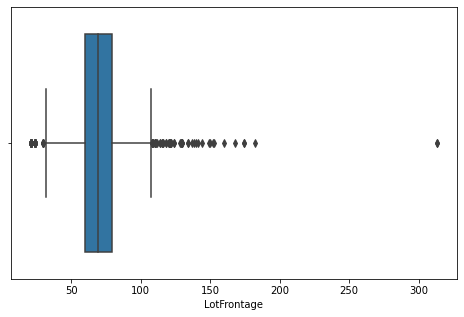

In [76]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='LotFrontage' ,data=df)
plt.show()

In [77]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.LotFrontage))

In [78]:
# Setting the threshold value
threshold = 3
print(np.where(z > 3))

(array([ 171,  197,  231,  277,  313,  446,  807,  909,  934, 1107, 1127,
       1173, 1182, 1211, 1298, 1337], dtype=int64),)


In [79]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1444, 79)

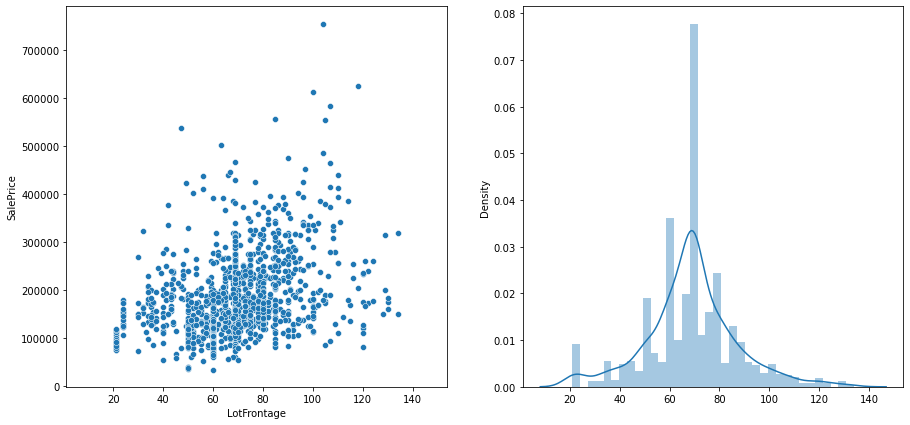

In [80]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='LotFrontage', y = 'SalePrice')
sns.distplot(ax=axes[1], x=df.LotFrontage)
plt.show()

<b>We can see that there is some correlation to sale price with lot frontage but not a lot and we can see the peak size at around 70 feet.</b>

In [81]:
# Checking the Value count
df['LotArea'].value_counts()

7200      25
9600      24
6000      17
10800     14
9000      14
8400      14
1680      10
7500       9
6120       8
6240       8
9100       8
8125       8
3182       7
7800       6
8450       6
10140      5
9750       5
4435       5
10400      5
4500       5
5000       5
5400       5
10000      5
8640       4
8500       4
9375       4
10625      4
8800       4
8544       4
6600       4
7018       4
11700      4
8750       4
7000       4
9900       4
11250      4
13125      4
8520       4
2522       3
9120       3
7750       3
8712       3
8012       3
13891      3
8000       3
12090      3
3675       3
14115      3
10500      3
9920       3
10440      3
7875       3
2280       3
8777       3
11600      3
10200      3
11500      3
9200       3
4426       3
9084       3
6762       3
2117       3
4438       2
7758       2
9020       2
11275      2
9245       2
9819       2
11988      2
2308       2
11075      2
7024       2
11040      2
11029      2
9842       2
9786       2
1890       2

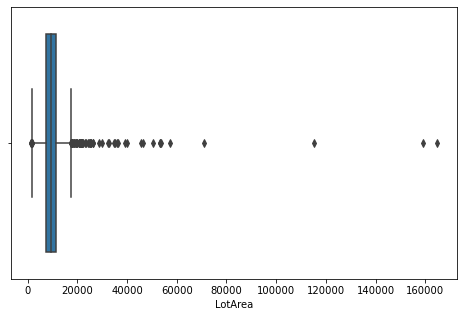

In [82]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='LotArea' ,data=df)
plt.show()

In [83]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.LotArea))

In [84]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([  53,  246,  268,  330,  379,  445,  451,  517,  655,  700,  763,
        841, 1158, 1171, 1273, 1380], dtype=int64),)


In [85]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1428, 79)

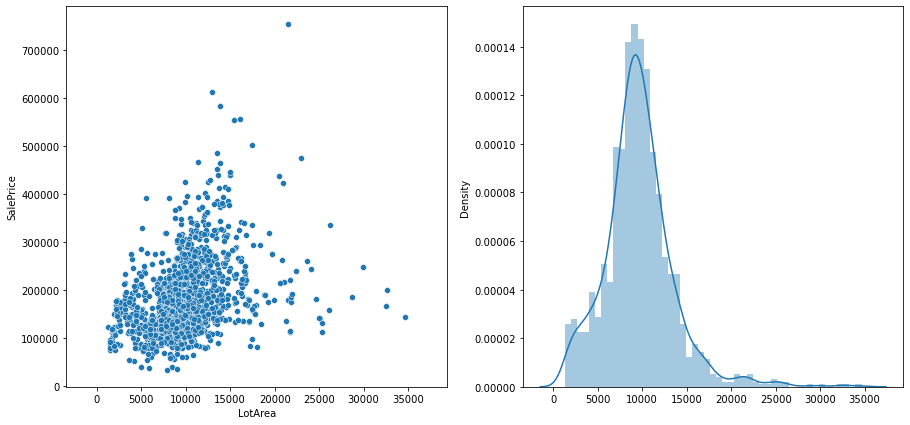

In [86]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='LotArea', y = 'SalePrice')
sns.distplot(ax=axes[1], x=df.LotArea)
plt.show()

<b>We can see there being a general trend of increase in sale price with the increase in the lot size and the peak at around 10,000 sq feet.</b>

In [87]:
# Checking the Value count
df['Street'].value_counts()

Pave    1424
Grvl       4
Name: Street, dtype: int64

In [88]:
# Checking the Value count in percentage
df['Street'].value_counts(1)

Pave    0.997199
Grvl    0.002801
Name: Street, dtype: float64

In [89]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Street'], axis=1)

In [90]:
# Checking the Value count
df['Alley'].value_counts()

No alley access    1338
Grvl                 49
Pave                 41
Name: Alley, dtype: int64

In [91]:
# Checking the Value count in percentage
df['Alley'].value_counts(1)

No alley access    0.936975
Grvl               0.034314
Pave               0.028711
Name: Alley, dtype: float64

In [92]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Alley'], axis=1)

In [93]:
# Checking the Value count
df['LotShape'].value_counts()

Reg    921
IR1    468
IR2     33
IR3      6
Name: LotShape, dtype: int64

In [94]:
# Checking the Value count in percentage
df['LotShape'].value_counts(1)

Reg    0.644958
IR1    0.327731
IR2    0.023109
IR3    0.004202
Name: LotShape, dtype: float64

In [95]:
# Merging Irregular into 1 category
df['LotShape'].replace({'IR1': 'IReg',
                        'IR2' : 'IReg',
                        'IR3' : 'IReg',                                            
                        },inplace=True)

In [96]:
# Checking the Value count
df['LotShape'].value_counts()

Reg     921
IReg    507
Name: LotShape, dtype: int64

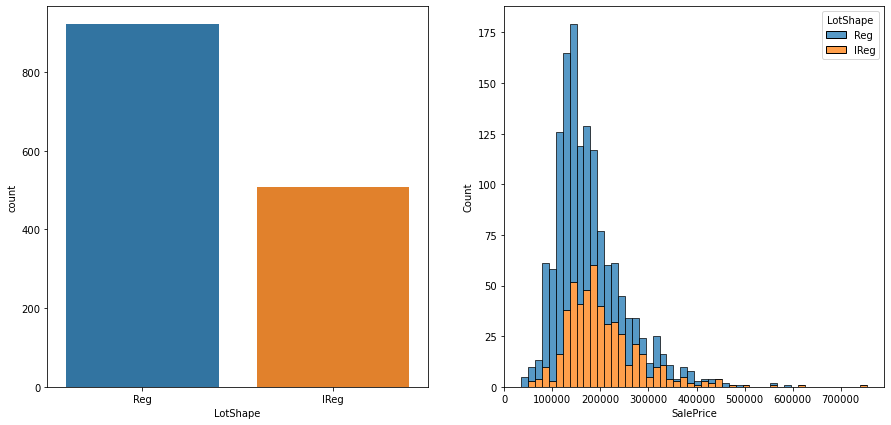

In [97]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'LotShape',data = df,order = df['LotShape'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='LotShape', x = 'SalePrice',multiple='stack')
plt.show()

<b>We can see around 2/3rd of the property are regular in shape. Although price is not much related to that.</b>

In [98]:
# Checking the Value count
df['LandContour'].value_counts()

Lvl    1299
Bnk      56
HLS      46
Low      27
Name: LandContour, dtype: int64

In [99]:
# Checking the Value count in percentage
df['LandContour'].value_counts(1)

Lvl    0.909664
Bnk    0.039216
HLS    0.032213
Low    0.018908
Name: LandContour, dtype: float64

In [100]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['LandContour'], axis=1)

In [101]:
# Checking the Value count in percentage
df['Utilities'].value_counts()

AllPub    1427
NoSeWa       1
Name: Utilities, dtype: int64

In [102]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Utilities'], axis=1)

In [103]:
# Checking the Value count
df['LotConfig'].value_counts()

Inside     1038
Corner      253
CulDSac      86
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [104]:
# Checking the Value count in percentage
df['LotConfig'].value_counts(1)

Inside     0.726891
Corner     0.177171
CulDSac    0.060224
FR2        0.032913
FR3        0.002801
Name: LotConfig, dtype: float64

In [105]:
# Replacing categories having less than 7% to others
df['LotConfig'].replace({'CulDSac' : 'Other',
                     'FR2' : 'Other',
                     'FR3' : 'Other',
                    },inplace=True)

In [106]:
# Again checking the values
df['LotConfig'].value_counts()

Inside    1038
Corner     253
Other      137
Name: LotConfig, dtype: int64

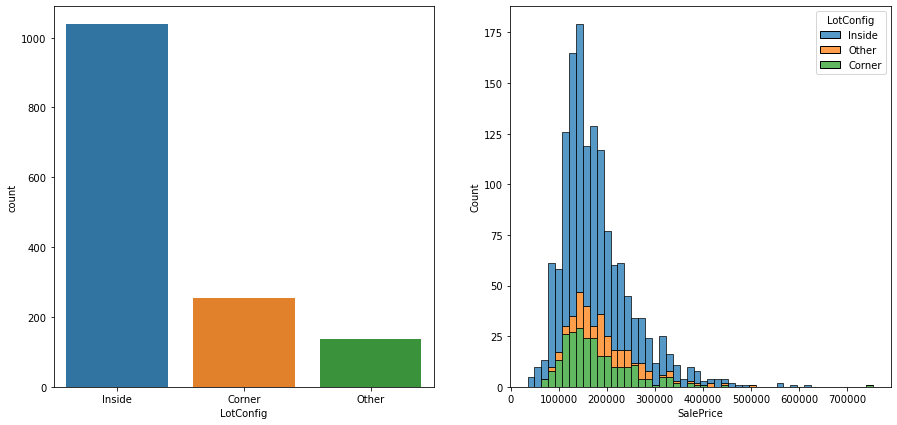

In [107]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'LotConfig',data = df,order = df['LotConfig'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='LotConfig', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see mostly we have inside lots.</b>

In [108]:
# Checking the Value count
df['LandSlope'].value_counts()

Gtl    1365
Mod      56
Sev       7
Name: LandSlope, dtype: int64

In [109]:
# Checking the Value count in percentage
df['LandSlope'].value_counts(1)

Gtl    0.955882
Mod    0.039216
Sev    0.004902
Name: LandSlope, dtype: float64

In [110]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['LandSlope'], axis=1)

In [111]:
# Checking the Value count
df['Neighborhood'].value_counts()

NAmes      221
CollgCr    150
OldTown    112
Edwards     98
Somerst     86
NridgHt     77
Sawyer      74
Gilbert     74
NWAmes      73
SawyerW     59
BrkSide     57
Crawfor     51
Mitchel     49
IDOTRR      37
NoRidge     37
Timber      34
SWISU       25
StoneBr     24
ClearCr     19
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [112]:
# Checking the Value count in percentage
df['Neighborhood'].value_counts(1)

NAmes      0.154762
CollgCr    0.105042
OldTown    0.078431
Edwards    0.068627
Somerst    0.060224
NridgHt    0.053922
Sawyer     0.051821
Gilbert    0.051821
NWAmes     0.051120
SawyerW    0.041317
BrkSide    0.039916
Crawfor    0.035714
Mitchel    0.034314
IDOTRR     0.025910
NoRidge    0.025910
Timber     0.023810
SWISU      0.017507
StoneBr    0.016807
ClearCr    0.013305
Blmngtn    0.011905
MeadowV    0.011905
BrDale     0.011204
Veenker    0.007003
NPkVill    0.006303
Blueste    0.001401
Name: Neighborhood, dtype: float64

In [113]:
# Replacing categories having less than 2% to others
df['Neighborhood'].replace({'Blueste' : 'Other',
                         'NPkVill' : 'Other',
                         'Veenker' : 'Other',
                         'BrDale' : 'Other',
                         'MeadowV' : 'Other',
                         'Blmngtn' : 'Other',
                         'ClearCr' : 'Other',
                         'StoneBr' : 'Other',
                         'SWISU' : 'Other',
                          },inplace=True)

In [114]:
# Again checking the values
df['Neighborhood'].value_counts()

NAmes      221
CollgCr    150
Other      139
OldTown    112
Edwards     98
Somerst     86
NridgHt     77
Gilbert     74
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     57
Crawfor     51
Mitchel     49
IDOTRR      37
NoRidge     37
Timber      34
Name: Neighborhood, dtype: int64

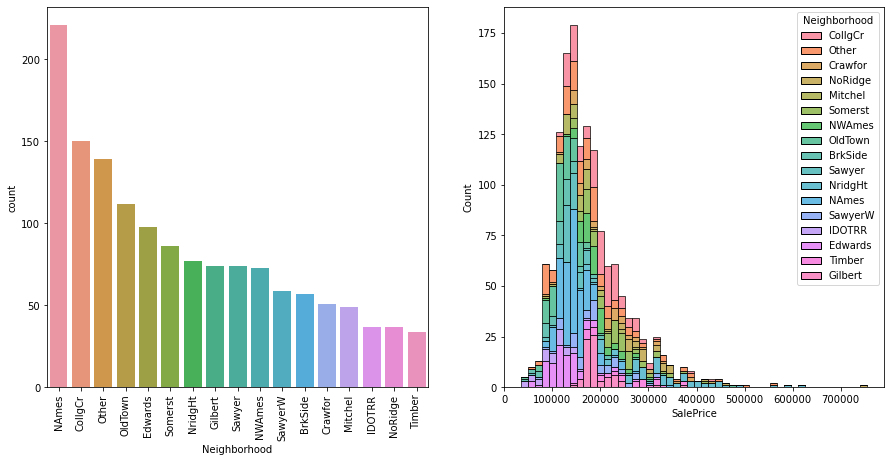

In [115]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axes[0], x = 'Neighborhood',data = df, order = df['Neighborhood'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='Neighborhood', x = 'SalePrice',multiple='stack')
plt.show()

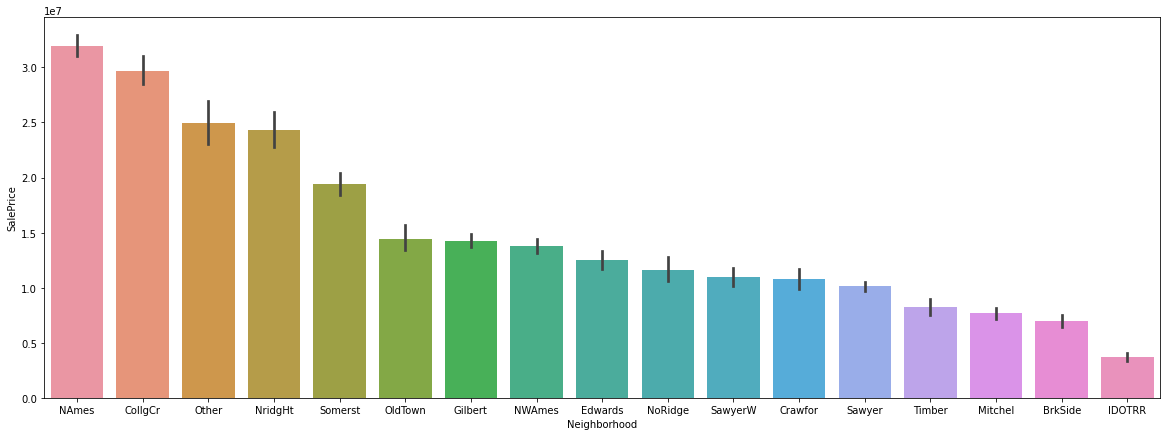

In [116]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Neighborhood', y = 'SalePrice', 
            order=['NAmes','CollgCr','Other','NridgHt','Somerst','OldTown','Gilbert','NWAmes','Edwards','NoRidge',
                   'SawyerW','Crawfor','Sawyer','Timber','Mitchel','BrkSide','IDOTRR'], estimator=sum)
plt.show()

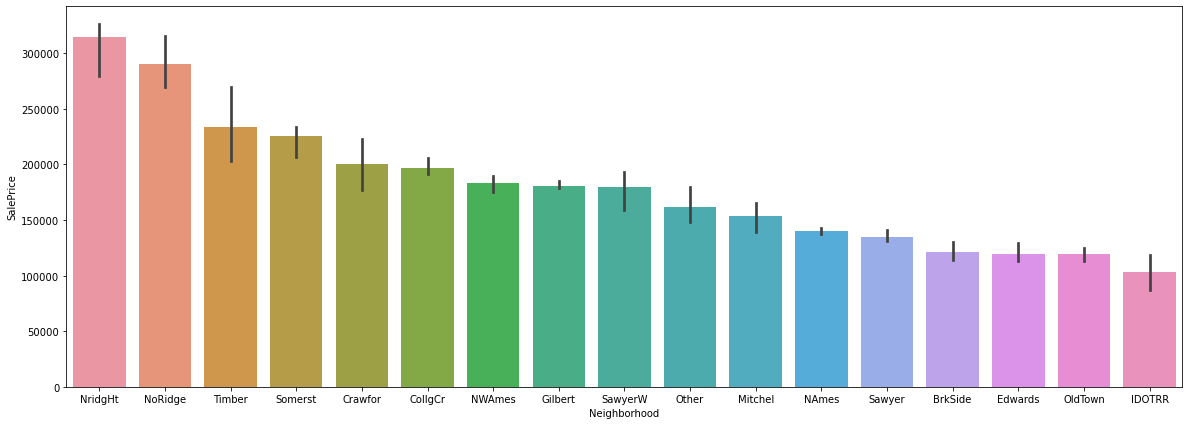

In [117]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Neighborhood', y = 'SalePrice', 
            order=['NridgHt','NoRidge','Timber','Somerst','Crawfor','CollgCr','NWAmes','Gilbert','SawyerW','Other'
                   ,'Mitchel','NAmes','Sawyer','BrkSide','Edwards','OldTown','IDOTRR'], estimator=np.median)
plt.show()

In [118]:
# Grouping all the numerical columns related with neighborhood
df.groupby(by=['Neighborhood']).sum().sort_values(by=['SalePrice'],ascending=False)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NAmes,16148,2180150,1179,1281,433195,435656,22645,106915,20376,99055,226346,256867,28996,232,286095,100,22,266,61,647,236,1344,120,333,93683,13916,6631,3809,845,4895,0,26430,1436,443736,31933593
CollgCr,10688,1442872,996,786,299683,299871,14584,68488,4110,101040,173638,174694,47381,0,222075,74,3,263,58,423,150,953,59,301,82887,17148,7758,34,389,645,0,2450,921,301171,29694866
Other,7277,970671,864,765,274271,275755,11278,61455,9876,72862,144193,155461,52753,2800,211014,62,10,219,64,366,141,882,98,230,58678,17443,5066,3456,298,2532,0,400,898,279099,24975346
NridgHt,6292,838372,636,385,154437,154475,25375,53652,1018,68748,123418,121642,25886,0,147528,43,0,157,32,208,77,591,79,205,57423,11681,5816,0,304,1158,0,0,528,154602,24352838
Somerst,5596,674315,631,433,172429,172456,12928,28139,0,69303,97442,97529,39543,240,137312,27,0,171,50,230,86,552,40,195,54234,5949,8701,0,0,464,0,0,536,172666,19382666
OldTown,6967,923280,605,714,215345,221273,1604,18488,3230,69145,90863,109025,55161,2330,166516,18,4,150,20,316,133,735,38,162,43180,5835,5503,8313,140,1428,0,3900,736,224874,14436959
Gilbert,5193,817263,486,378,147908,147936,3280,15061,0,49029,64090,69355,52605,53,122013,19,2,147,62,230,74,526,67,152,33425,7618,3196,0,867,291,0,1680,483,148555,14222781
NWAmes,5590,863855,462,434,144221,144651,12962,37264,5597,41369,84230,96104,30024,0,126128,24,12,137,44,240,75,529,69,147,38947,8116,4670,951,506,2176,1167,3750,447,146571,13800655
Edwards,6385,917884,488,534,191582,193495,3489,34542,2616,43576,80734,101476,22210,0,123686,46,7,131,17,282,103,589,28,113,30318,6655,2626,2638,180,1525,738,1600,564,196779,12477220


<b>From all the above graphs we can see that which neighborhood of North Ames generaly sells most of the houses but when we look deeper we can see neighborhood of Northridge Heights have more expensive property on average.</b>

In [119]:
# Checking the Value count
df['Condition1'].value_counts()

Norm      1235
Feedr       78
Artery      47
RRAn        26
PosN        18
RRAe        11
PosA         6
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [120]:
# Checking the Value count in percentage
df['Condition1'].value_counts(1)

Norm      0.864846
Feedr     0.054622
Artery    0.032913
RRAn      0.018207
PosN      0.012605
RRAe      0.007703
PosA      0.004202
RRNn      0.003501
RRNe      0.001401
Name: Condition1, dtype: float64

In [121]:
# Replacing categories having less than 5% to others
df['Condition1'].replace({'Artery' : 'Other',
                         'RRAn' : 'Other',
                         'PosN' : 'Other',
                         'RRAe' : 'Other',
                         'PosA' : 'Other',
                         'RRNn' : 'Other',
                         'RRNe' : 'Other',
                          },inplace=True)

In [122]:
# Again checking the values
df['Condition1'].value_counts()

Norm     1235
Other     115
Feedr      78
Name: Condition1, dtype: int64

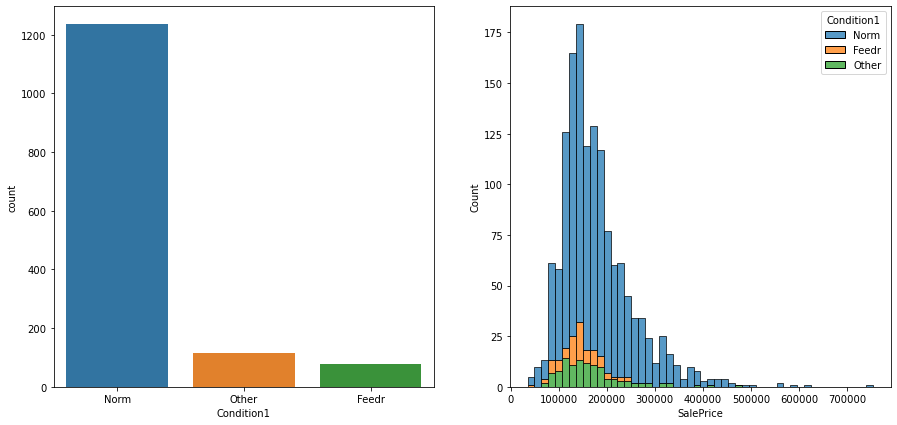

In [123]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'Condition1',data = df, order = df['Condition1'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='Condition1', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can majority of sold properties have Normal Proximity to various conditions.</b>

In [124]:
# Checking the Value count
df['Condition2'].value_counts()

Norm      1414
Feedr        6
Artery       2
RRNn         2
RRAe         1
PosN         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [125]:
# Checking the Value count in percentage
df['Condition2'].value_counts(1)

Norm      0.990196
Feedr     0.004202
Artery    0.001401
RRNn      0.001401
RRAe      0.000700
PosN      0.000700
PosA      0.000700
RRAn      0.000700
Name: Condition2, dtype: float64

In [126]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Condition2'], axis=1)

In [127]:
# Checking the Value count
df['BldgType'].value_counts()

1Fam      1189
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [128]:
# Checking the Value count in percentage
df['BldgType'].value_counts(1)

1Fam      0.832633
TwnhsE    0.079832
Duplex    0.036415
Twnhs     0.030112
2fmCon    0.021008
Name: BldgType, dtype: float64

In [129]:
# Replacing categories having less than 5% to others
df['BldgType'].replace({'Duplex' : 'Other',
                         'Twnhs' : 'Other',
                         '2fmCon' : 'Other',
                        },inplace=True)

In [130]:
# Again checking the values
df['BldgType'].value_counts()

1Fam      1189
Other      125
TwnhsE     114
Name: BldgType, dtype: int64

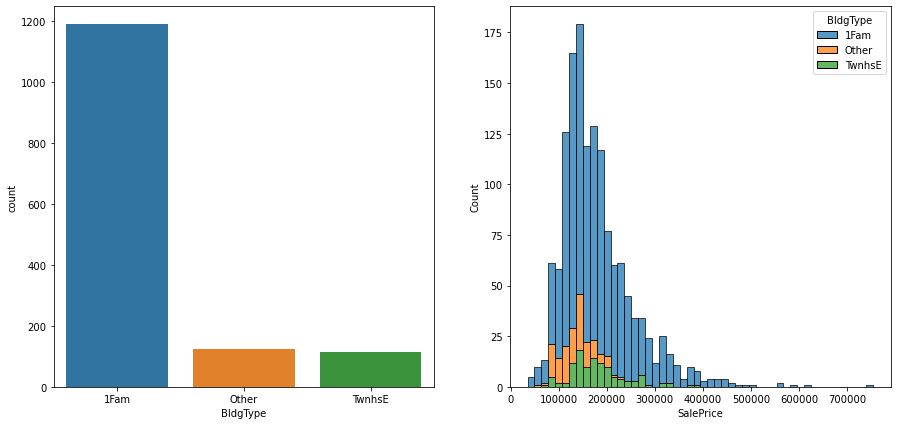

In [131]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BldgType',data = df, order = df['BldgType'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BldgType', x = 'SalePrice',multiple='stack')
plt.show()

<b>Most Building Type are of Single-family Detached type.</b>

In [132]:
# Checking the Value count
df['HouseStyle'].value_counts()

1Story    711
2Story    433
1.5Fin    149
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [133]:
# Checking the Value count in percentage
df['HouseStyle'].value_counts(1)

1Story    0.497899
2Story    0.303221
1.5Fin    0.104342
SLvl      0.045518
SFoyer    0.025910
1.5Unf    0.009804
2.5Unf    0.007703
2.5Fin    0.005602
Name: HouseStyle, dtype: float64

In [134]:
# Replacing categories having less than 5% to others
df['HouseStyle'].replace({'2.5Fin' : 'Other',
                         '2.5Unf' : 'Other',
                         '1.5Unf' : 'Other',
                         'SFoyer' : 'Other',
                         'SLvl' : 'Other',
                          },inplace=True)

In [135]:
# Again checking the values
df['HouseStyle'].value_counts()

1Story    711
2Story    433
1.5Fin    149
Other     135
Name: HouseStyle, dtype: int64

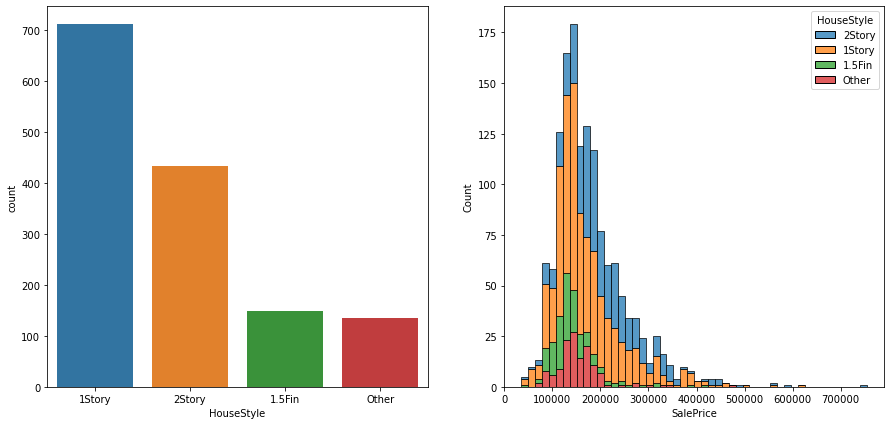

In [136]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'HouseStyle',data = df, order = df['HouseStyle'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='HouseStyle', x = 'SalePrice',multiple='stack')
plt.show()

<b>We can see here the most common house style is one Story, but we can also see two story are not far behind and generally fetches more price.</b>

In [137]:
# Checking the Value count
df['OverallQual'].value_counts()

5     391
6     368
7     312
8     163
4     113
9      42
3      20
10     14
2       3
1       2
Name: OverallQual, dtype: int64

In [138]:
# Lets convert it into categorical form
df['OverallQual'].replace({1:'Very Poor',
                           2:'Poor',
                           3:'Fair',
                           4:'Below Average',
                           5:'Average',
                           6:'Above Average',
                           7:'Good',
                           8:'Very Good',
                           9:'Excellent',
                           10:'Very Excellent'
                          },inplace=True)

In [139]:
# Checking the Value count in percentage
df['OverallQual'].value_counts(1)

Average           0.273810
Above Average     0.257703
Good              0.218487
Very Good         0.114146
Below Average     0.079132
Excellent         0.029412
Fair              0.014006
Very Excellent    0.009804
Poor              0.002101
Very Poor         0.001401
Name: OverallQual, dtype: float64

In [140]:
# Reducing the total number of categories by merging certain categories
df['OverallQual'].replace({'Very Poor' : 'Poor',
                           'Fair' : 'Below Average',
                           'Above Average' : 'Average',
                           'Very Good' : 'Good',
                           'Very Excellent' : 'Excellent',
                          },inplace=True)

In [141]:
# Again checking the values
df['OverallQual'].value_counts()

Average          759
Good             475
Below Average    133
Excellent         56
Poor               5
Name: OverallQual, dtype: int64

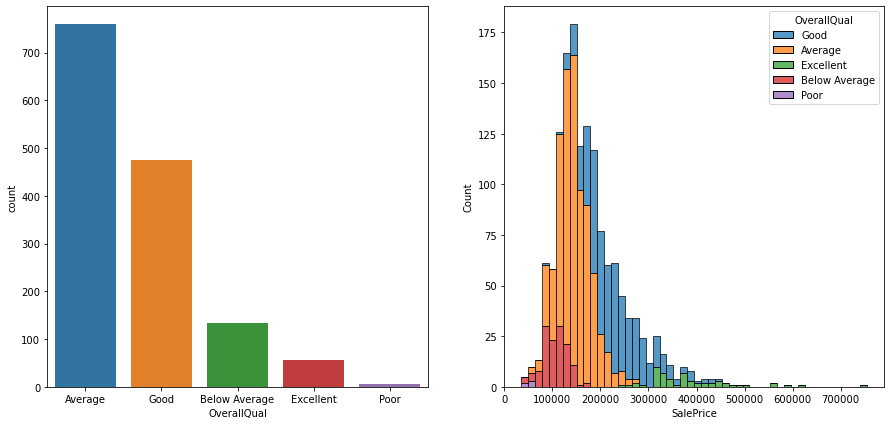

In [142]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'OverallQual',data = df, order = df['OverallQual'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='OverallQual', x = 'SalePrice',multiple='stack')
plt.show()

<b>The Majority of property has overall material and finish of the house in average condition.</b>

In [143]:
# Checking the Value count
df['OverallCond'].value_counts()

5    803
6    247
7    200
8     71
4     54
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [144]:
# Lets convert it into categorical form
df['OverallCond'].replace({1:'Very Poor',
                           2:'Poor',
                           3:'Fair',
                           4:'Below Average',
                           5:'Average',
                           6:'Above Average',
                           7:'Good',
                           8:'Very Good',
                           9:'Excellent',
                           10:'Very Excellent'
                          },inplace=True)

In [145]:
# Checking the Value count in percentage
df['OverallCond'].value_counts(1)

Average          0.562325
Above Average    0.172969
Good             0.140056
Very Good        0.049720
Below Average    0.037815
Fair             0.017507
Excellent        0.015406
Poor             0.003501
Very Poor        0.000700
Name: OverallCond, dtype: float64

In [146]:
# Reducing the total number of categories by merging certain categories
df['OverallCond'].replace({'Very Poor' : 'Poor',
                           'Fair' : 'Below Average',
                           'Above Average' : 'Average',
                           'Very Good' : 'Good',
                           'Very Excellent' : 'Excellent'
                          },inplace=True)

In [147]:
# Again checking the values
df['OverallCond'].value_counts()

Average          1050
Good              271
Below Average      79
Excellent          22
Poor                6
Name: OverallCond, dtype: int64

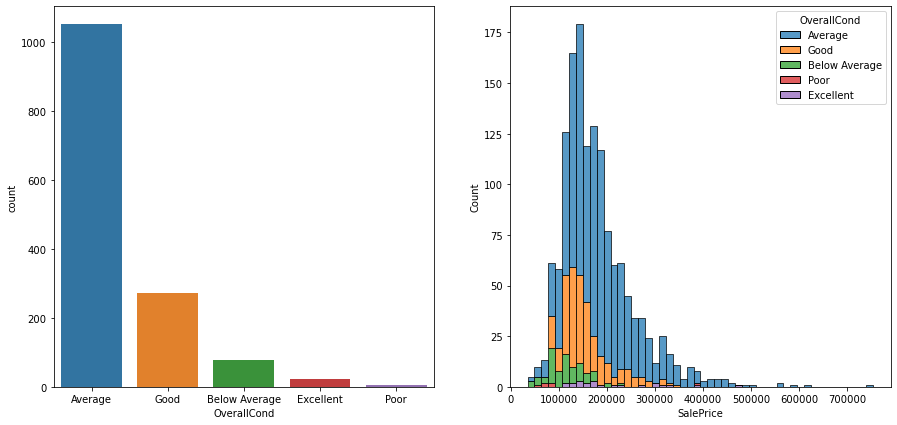

In [148]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'OverallCond',data = df, order = df['OverallCond'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='OverallCond', x = 'SalePrice',multiple='stack')
plt.show()

<b>The majority of property have overall condition of the house in Average condition.</b>

In [149]:
# Checking the Value count
df['YearBuilt'].value_counts()

2006    66
2005    63
2004    53
2007    48
2003    44
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
2000    24
1970    24
2002    23
1972    23
1958    23
1965    22
1968    22
1954    22
2008    22
1971    21
1957    20
1950    20
2001    20
1962    19
1940    18
1994    18
2009    18
1993    17
1910    17
1966    17
1967    16
1995    16
1955    16
1978    16
1925    16
1960    15
1963    15
1941    14
1964    14
1956    14
1961    14
1969    14
1996    14
1997    14
1948    13
1992    12
1990    12
1953    12
1949    12
1973    11
1915    10
1900    10
1980    10
1974    10
1988    10
1930     9
1979     9
1936     9
1926     9
1984     9
1916     8
1939     8
1922     8
1924     7
1928     7
1975     7
1914     7
1935     6
1918     6
1921     6
1945     6
1923     6
1946     6
1982     6
1931     6
1986     5
1991     5
1937     5
1947     5
1951     5
1952     5
1985     5
1880     4
1929     4
1981     4
1938     4
1932     4
1983     4
1989     3
1912     3

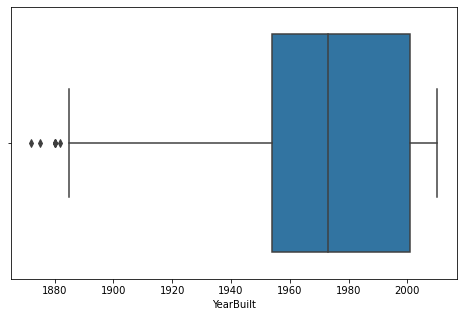

In [150]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='YearBuilt' ,data=df)
plt.show()

In [151]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.YearBuilt))

In [152]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([ 297,  616,  731, 1109, 1114, 1318], dtype=int64),)


In [153]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1422, 73)

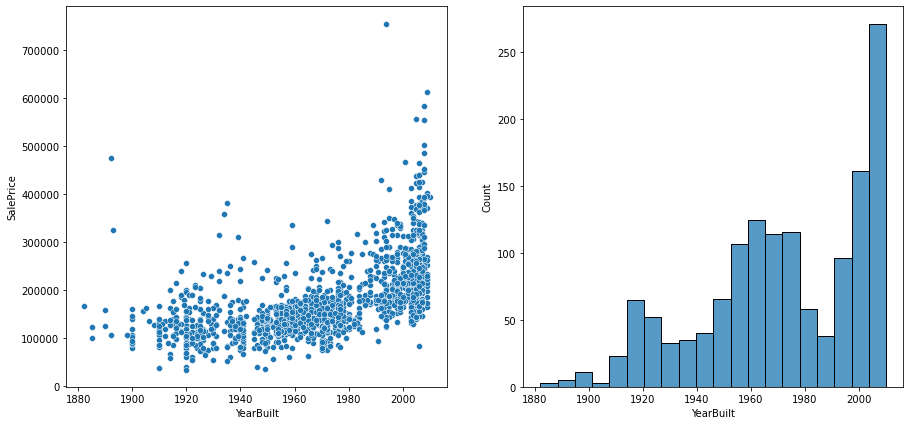

In [154]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='YearBuilt', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'YearBuilt', bins = 20)
plt.show()

<b>We can see a general trend that is newer house have sold for higher price.</b>

In [155]:
# Checking the Value count
df['YearRemodAdd'].value_counts()

1950    175
2006     95
2007     75
2005     69
2004     60
2000     55
2003     49
2002     45
2008     38
1998     36
1996     32
1995     31
1976     30
1999     30
1970     26
1977     25
1997     24
2009     23
2001     21
1994     20
1972     20
1993     19
1959     18
1971     18
1965     17
1968     17
1978     16
1992     16
1966     15
1958     15
1962     14
1969     14
1954     14
1990     14
1991     13
1963     12
1967     12
1980     12
1973     11
1989     11
1960     11
1979     10
1953     10
1956     10
1964     10
1975      9
1955      9
1985      9
1957      9
1988      9
1987      8
1961      8
1981      8
1974      7
1984      7
1982      7
2010      6
1986      5
1983      5
1952      5
1951      3
Name: YearRemodAdd, dtype: int64

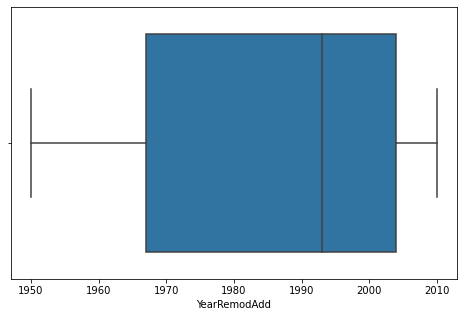

In [156]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='YearRemodAdd' ,data=df)
plt.show()

<b>As we can't see any outliers we can go ahead with building other graphs to see any pattern.</b>

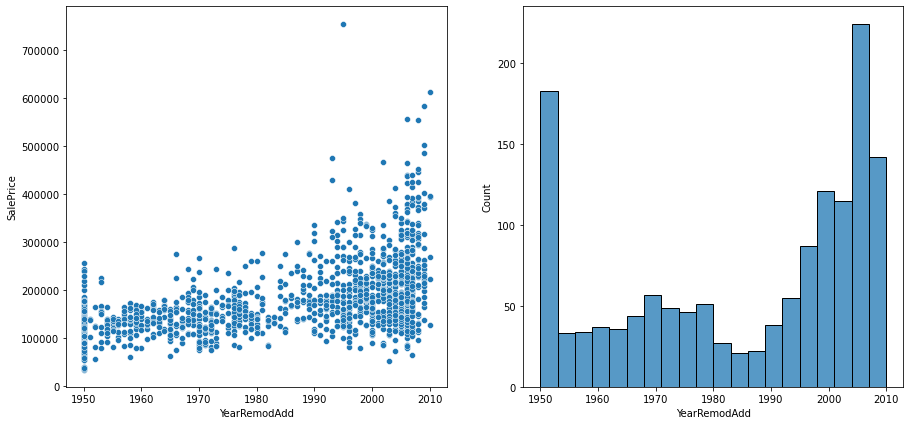

In [157]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='YearRemodAdd', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'YearRemodAdd', bins = 20)
plt.show()

<b>The general trend is that remodling did help in raising the selling price.</b>

In [158]:
# Checking the Value count
df['RoofStyle'].value_counts()

Gable      1117
Hip         276
Gambrel      11
Flat         10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

In [159]:
# Checking the Value count in percentage
df['RoofStyle'].value_counts(1)

Gable      0.785513
Hip        0.194093
Gambrel    0.007736
Flat       0.007032
Mansard    0.004219
Shed       0.001406
Name: RoofStyle, dtype: float64

In [160]:
# Replacing categories having less than 5% to others
df['RoofStyle'].replace({'Shed' : 'Other',
                         'Mansard' : 'Other',
                         'Flat' : 'Other',
                         'Gambrel' : 'Other',
                         },inplace=True)

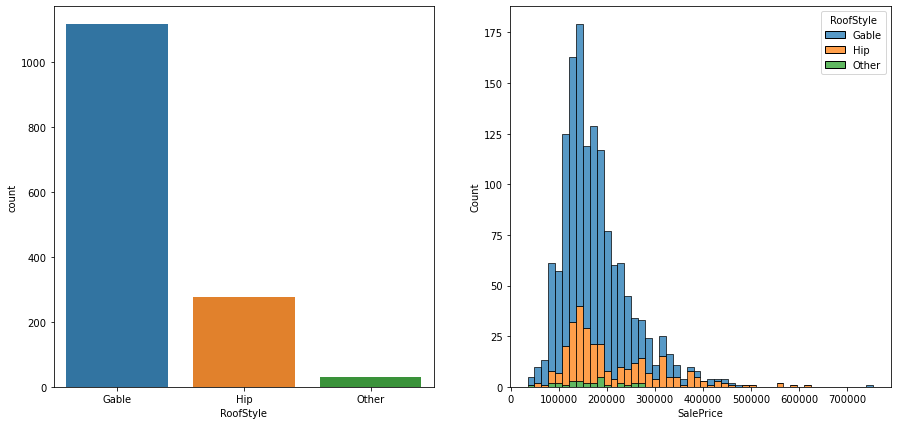

In [161]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'RoofStyle',data = df, order = df['RoofStyle'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='RoofStyle', x = 'SalePrice',multiple='stack')
plt.show()

<b>The Majority of Roof style of type Gable.</b>

In [162]:
# Checking the Value count
df['RoofMatl'].value_counts()

CompShg    1402
Tar&Grv       9
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [163]:
# Checking the Value count in percentage
df['RoofMatl'].value_counts(1)

CompShg    0.985935
Tar&Grv    0.006329
WdShake    0.003516
WdShngl    0.002813
Metal      0.000703
Roll       0.000703
Name: RoofMatl, dtype: float64

In [164]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['RoofMatl'], axis=1)

In [165]:
# Checking the Value count
df['Exterior1st'].value_counts()

VinylSd    507
HdBoard    220
MetalSd    217
Wd Sdng    196
Plywood    103
CemntBd     58
BrkFace     47
WdShing     25
Stucco      22
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [166]:
# Checking the Value count in percentage
df['Exterior1st'].value_counts(1)

VinylSd    0.356540
HdBoard    0.154712
MetalSd    0.152602
Wd Sdng    0.137834
Plywood    0.072433
CemntBd    0.040788
BrkFace    0.033052
WdShing    0.017581
Stucco     0.015471
AsbShng    0.014065
Stone      0.001406
BrkComm    0.001406
ImStucc    0.000703
AsphShn    0.000703
CBlock     0.000703
Name: Exterior1st, dtype: float64

In [167]:
# Replacing categories having less than 4% to others
df['Exterior1st'].replace({'CBlock' : 'Other',
                         'AsphShn' : 'Other',
                         'ImStucc' : 'Other',
                         'BrkComm' : 'Other',
                         'Stone' : 'Other',
                         'AsbShng' : 'Other',
                         'Stucco' : 'Other',
                         'WdShing' : 'Other',
                         'BrkFace' : 'Other', 
                         },inplace=True)

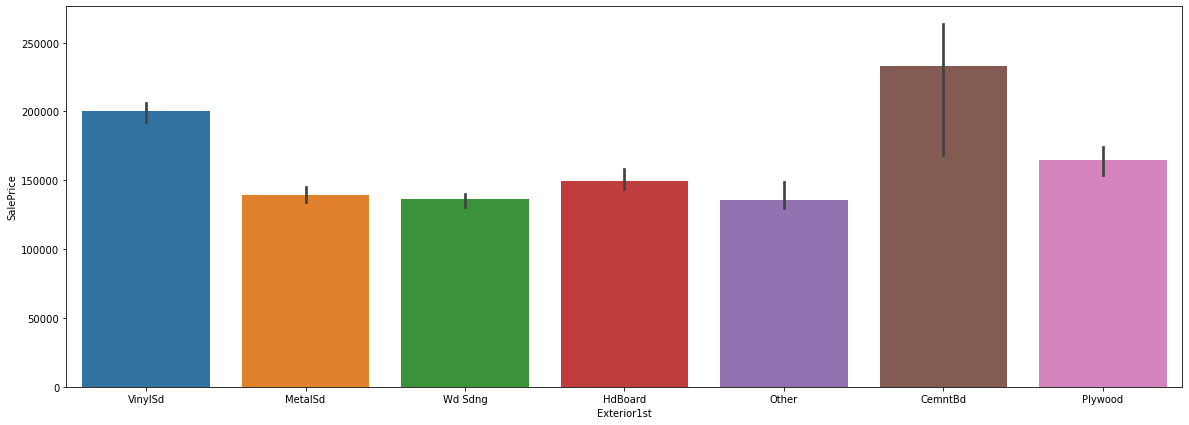

In [168]:
# Let's Plot to analyze
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Exterior1st', y = 'SalePrice', estimator=np.median)
plt.show()

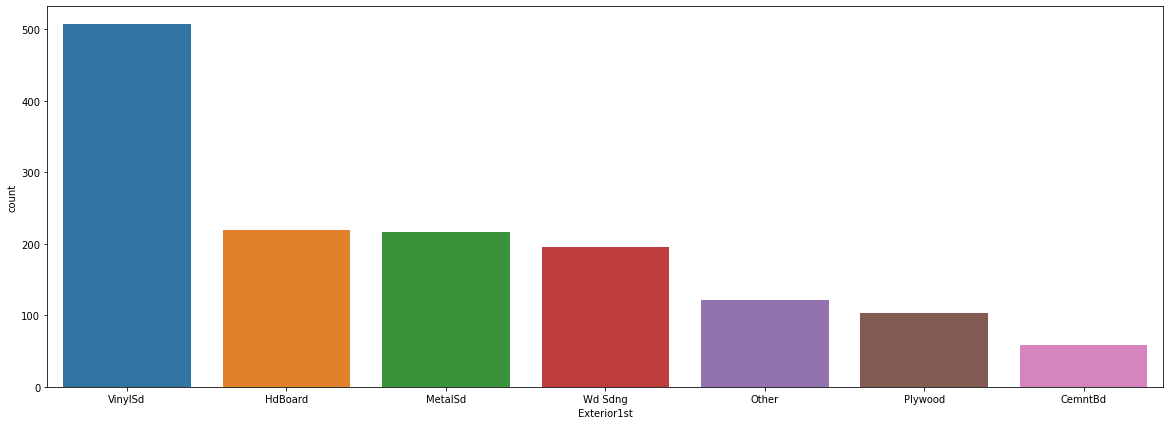

In [169]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Exterior1st',data = df, order = df['Exterior1st'].value_counts().index)
plt.show()

<b>With the above graphs we can see the most common exterior covering the houses is Vinyl Siding although on an average the house with exterior of Cement Board fetch higher sales price.</b>

In [170]:
# Checking the Value count
df['Exterior2nd'].value_counts()

VinylSd    496
MetalSd    211
HdBoard    204
Wd Sdng    189
Plywood    135
CmentBd     58
Wd Shng     36
BrkFace     24
Stucco      23
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [171]:
# Checking the Value count in percentage
df['Exterior2nd'].value_counts(1)

VinylSd    0.348805
MetalSd    0.148383
HdBoard    0.143460
Wd Sdng    0.132911
Plywood    0.094937
CmentBd    0.040788
Wd Shng    0.025316
BrkFace    0.016878
Stucco     0.016174
AsbShng    0.014065
ImStucc    0.006329
Brk Cmn    0.004923
Stone      0.003516
AsphShn    0.002110
Other      0.000703
CBlock     0.000703
Name: Exterior2nd, dtype: float64

In [172]:
# Replacing categories having less than 4% to others
df['Exterior2nd'].replace({'CBlock' : 'Other',
                         'AsphShn' : 'Other',
                         'ImStucc' : 'Other',
                         'BrkComm' : 'Other',
                         'Stone' : 'Other',
                         'AsbShng' : 'Other',
                         'Stucco' : 'Other',
                         'WdShing' : 'Other',
                         'BrkFace' : 'Other', 
                         },inplace=True)

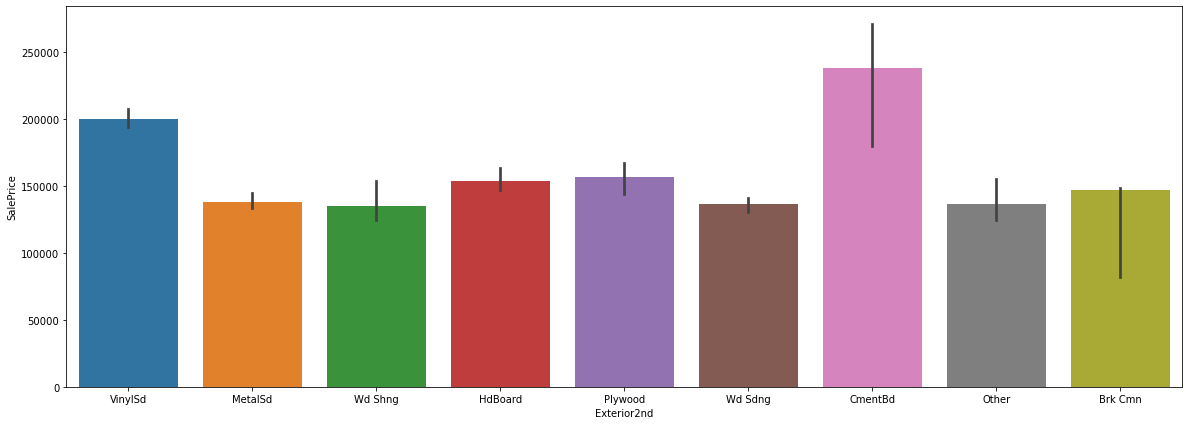

In [173]:
# Let's Plot to analyze
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Exterior2nd', y = 'SalePrice', estimator=np.median)
plt.show()

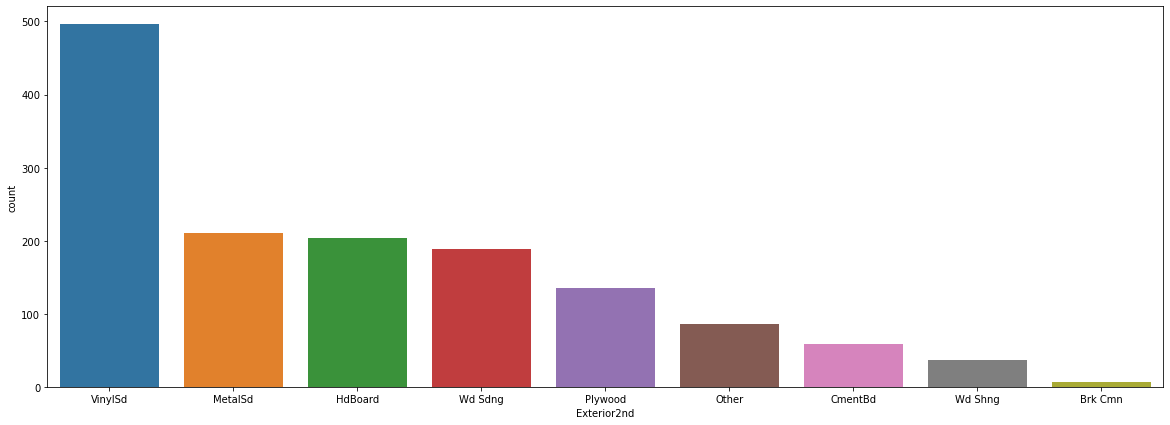

In [174]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Exterior2nd',data = df, order = df['Exterior2nd'].value_counts().index)
plt.show()

<b>With the above graphs we can see the most common exterior covering the houses is Vinyl Siding although on an average the house with exterior of Cement Board fetch higher sales price.</b>

In [175]:
# Checking the Value count
df['MasVnrType'].value_counts()

None       845
BrkFace    440
Stone      124
BrkCmn      13
Name: MasVnrType, dtype: int64

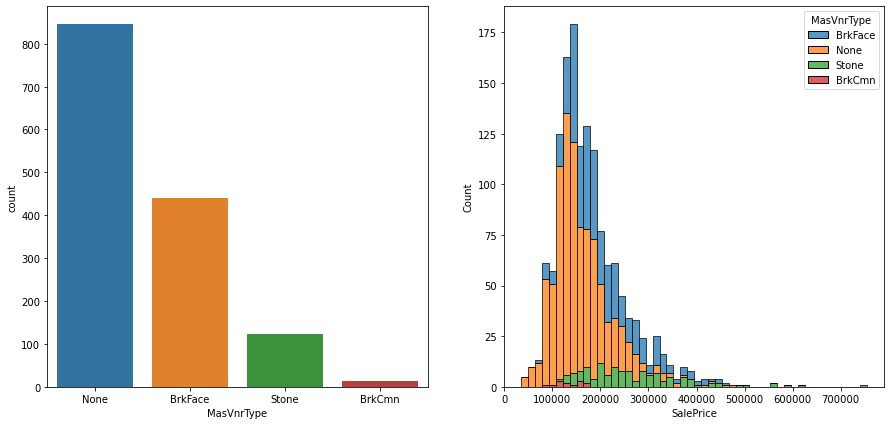

In [176]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'MasVnrType',data = df, order = df['MasVnrType'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='MasVnrType', x = 'SalePrice',multiple='stack')
plt.show()

<b>We can see majority of houses don't have Masonry vaneer area after that Brick Face is the most common style.</b>

In [177]:
# Checking the Value count
df['MasVnrArea'].value_counts()

0       842
72        8
108       8
180       8
16        7
120       7
80        6
340       6
106       6
200       6
132       5
170       5
84        5
320       5
360       5
220       4
252       4
100       4
246       4
160       4
270       4
210       4
288       4
268       4
178       4
456       4
76        4
300       4
196       4
216       4
336       4
40        4
183       4
168       4
90        3
272       3
350       3
104       3
99        3
130       3
136       3
420       3
110       3
85        3
116       3
312       3
145       3
128       3
148       3
166       3
82        3
44        3
176       3
42        3
174       3
208       3
240       3
50        3
70        3
74        3
256       3
169       3
186       3
305       2
306       2
147       2
304       2
226       2
184       2
215       2
189       2
318       2
182       2
212       2
192       2
206       2
144       2
328       2
143       2
205       2
302       2
149       2
232       2
233 

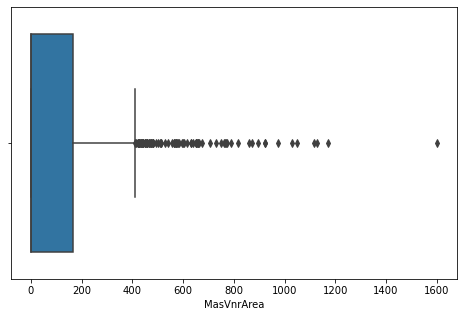

In [178]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='MasVnrArea' ,data=df)
plt.show()

In [179]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.MasVnrArea))

In [180]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([  25,   37,   57,   69,  104,  114,  160,  168,  176,  221,  290,
        339,  392,  463,  503,  638,  674,  683,  700,  736,  744,  778,
        787,  804,  876,  957, 1086, 1195, 1235, 1255, 1336, 1379],
      dtype=int64),)


In [181]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1390, 72)

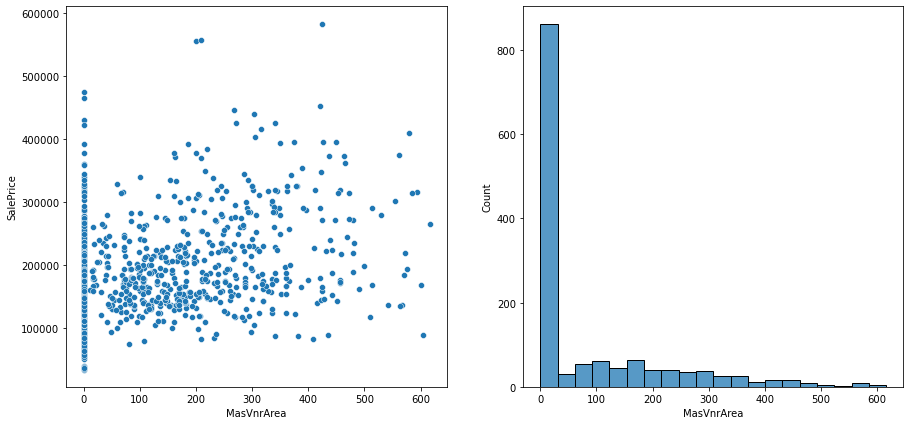

In [182]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='MasVnrArea', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'MasVnrArea', bins = 20)
plt.show()

<b>We can see some pattern there is some sweet spot between the sale price and Masonry Vaneer area but after a certain limit it stagnates.</b>

In [183]:
# Checking the Value count
df['ExterQual'].value_counts()

TA    878
Gd    460
Ex     38
Fa     14
Name: ExterQual, dtype: int64

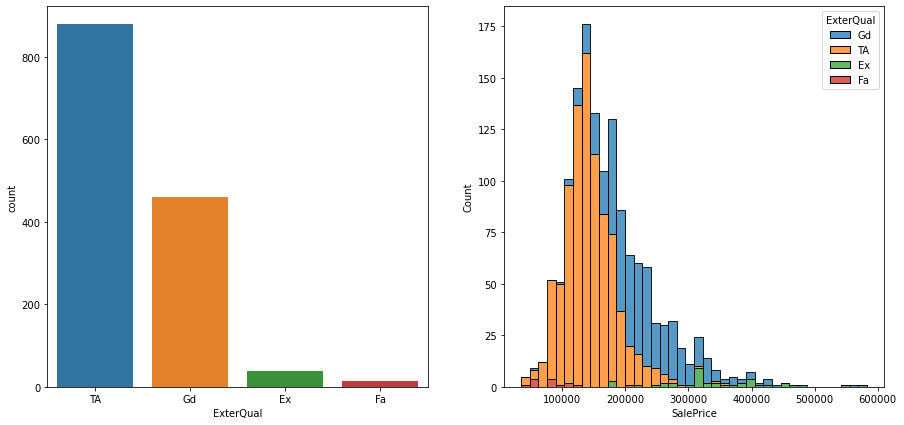

In [184]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'ExterQual',data = df, order = df['ExterQual'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='ExterQual', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see the majority of houses have the quality of the material on the exterior of Average/Typical type, but we can see the houses having Good exterior geneally fecth higher price.</b>

In [185]:
# Checking the Value count
df['Foundation'].value_counts()

PConc     609
CBlock    609
BrkTil    141
Slab       24
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [186]:
# Checking the Value count in percentage
df['Foundation'].value_counts(1)

PConc     0.438129
CBlock    0.438129
BrkTil    0.101439
Slab      0.017266
Stone     0.003597
Wood      0.001439
Name: Foundation, dtype: float64

In [187]:
# Replacing categories having less than 2% to others
df['Foundation'].replace({'Wood' : 'Other',
                         'Stone' : 'Other',
                         'Slab' : 'Other'
                         },inplace=True)

In [188]:
# Again checking the values
df['Foundation'].value_counts()

PConc     609
CBlock    609
BrkTil    141
Other      31
Name: Foundation, dtype: int64

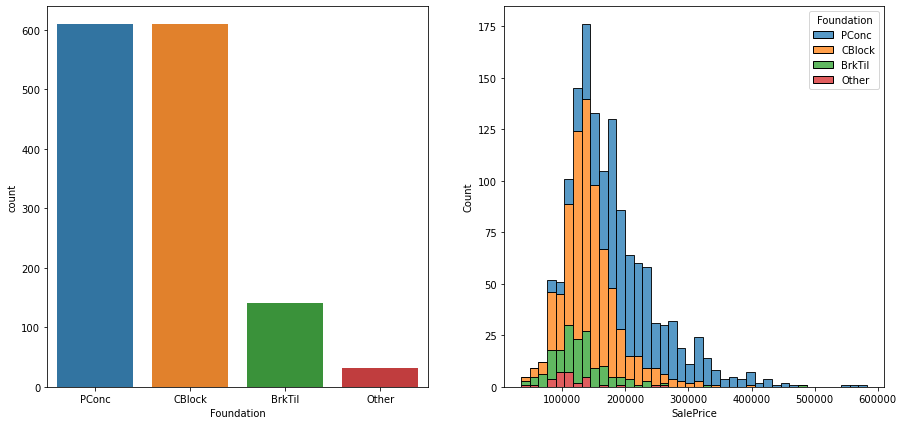

In [189]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'Foundation',data = df, order = df['Foundation'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='Foundation', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see the two major types of Foundation for the houses are Cinder Block and Poured Concrete and we can see houses having Cinder Block as their foundation generally fetch higher sale price.</b>

In [190]:
# Checking the Value count
df['BsmtQual'].value_counts()

TA             628
Gd             589
Ex             102
No Basement     37
Fa              34
Name: BsmtQual, dtype: int64

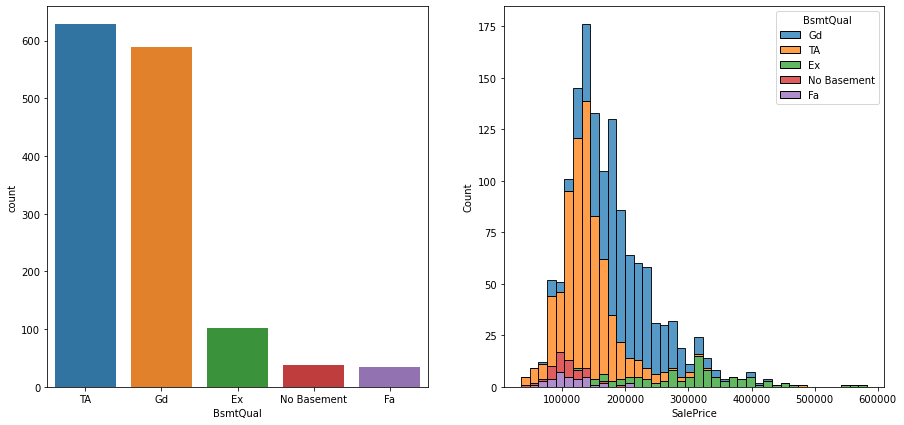

In [191]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtQual',data = df, order = df['BsmtQual'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtQual', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see the most 2 common height of basement is Typical(80-89 inches)and Good (90-99 inches)also we can see Good and Excellent fetches hihger price. </b>

In [192]:
# Checking the Value count
df['BsmtCond'].value_counts()

TA             1247
Gd               62
Fa               42
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

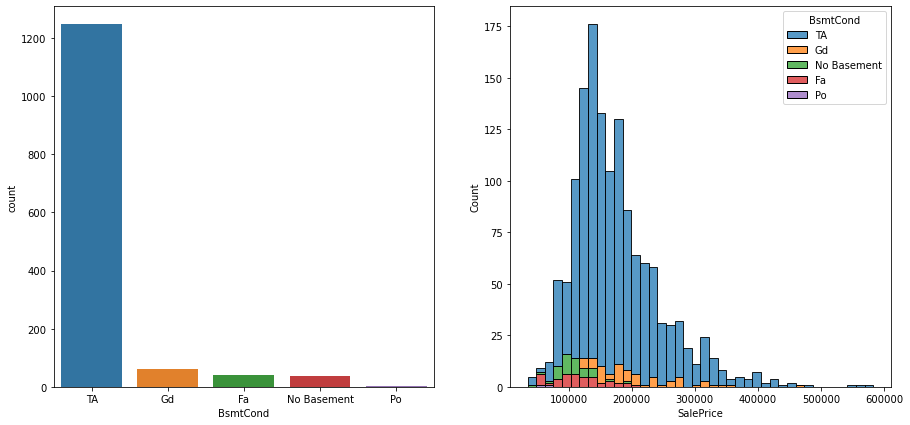

In [193]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtCond',data = df, order = df['BsmtCond'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtCond', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see majority of houses have Typical Basement Condition.</b>

In [194]:
# Checking the Value count
df['BsmtExposure'].value_counts()

No             923
Av             211
Gd             109
Mn             109
No Basement     38
Name: BsmtExposure, dtype: int64

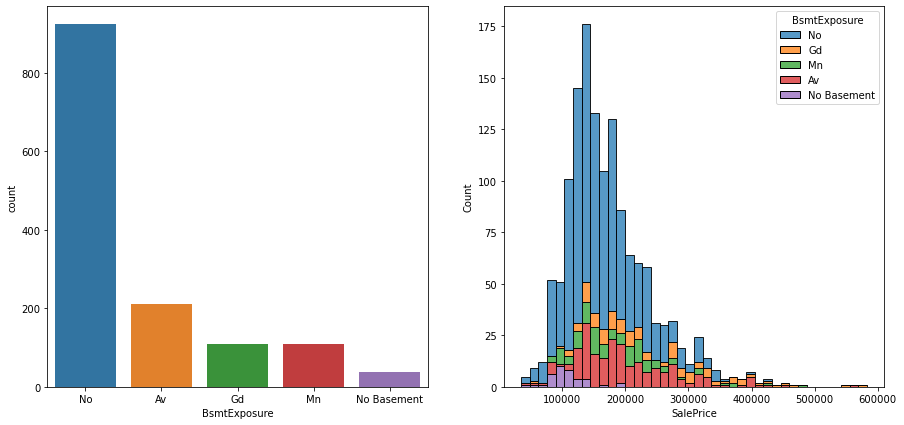

In [195]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtExposure',data = df, order = df['BsmtExposure'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtExposure', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see majority of houses don't have walkout or garden level walls.</b>

In [196]:
# Checking the Value count
df['BsmtFinType1'].value_counts()

Unf            412
GLQ            387
ALQ            212
BLQ            144
Rec            127
LwQ             71
No Basement     37
Name: BsmtFinType1, dtype: int64

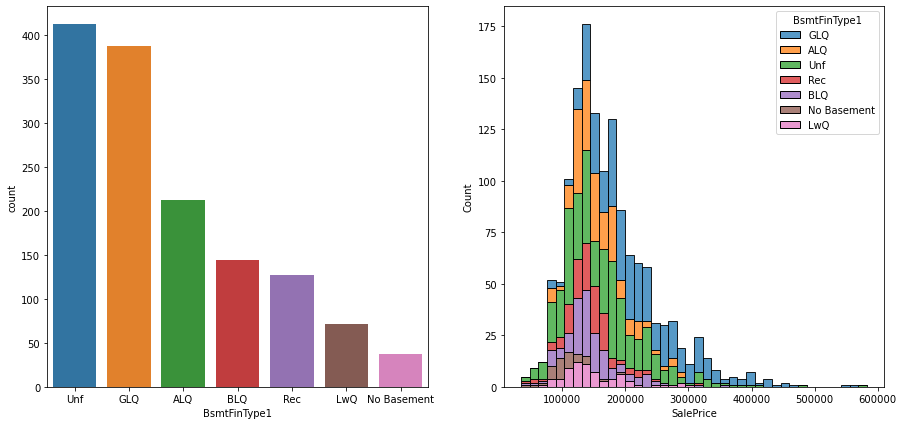

In [197]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtFinType1',data = df, order = df['BsmtFinType1'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtFinType1', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see that houses generally either have Unfinished basements or have Good Living Quarters and we can see Good Living Quarters fetch higher price.</b>

In [198]:
# Checking the Value count
df['BsmtFinSF1'].value_counts()

0       449
24       12
16        9
616       5
936       5
662       5
686       5
20        5
1200      4
300       4
560       4
588       4
312       4
495       4
360       4
504       4
384       4
600       4
442       4
641       4
553       4
400       4
428       4
547       4
733       3
655       3
450       3
648       3
280       3
732       3
1201      3
767       3
196       3
1218      3
297       3
456       3
643       3
1056      3
210       3
695       3
656       3
659       3
690       3
789       3
250       3
288       3
786       3
904       3
672       3
633       3
700       3
674       3
680       3
685       3
697       3
660       3
180       3
570       3
828       3
510       3
507       3
565       3
569       3
182       3
500       3
340       3
28        3
375       3
490       3
338       3
595       3
336       3
625       3
528       3
168       3
816       3
626       3
378       3
624       3
390       2
403       2
763       2
348       2
392 

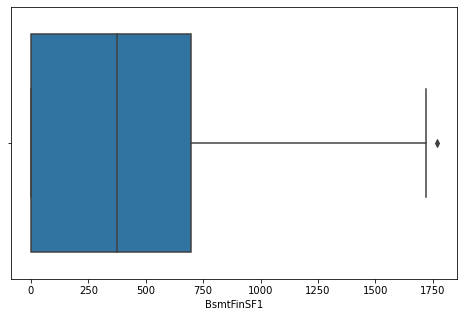

In [199]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='BsmtFinSF1' ,data=df)
plt.show()

In [200]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.BsmtFinSF1))

In [201]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([416, 631], dtype=int64),)


In [202]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1388, 72)

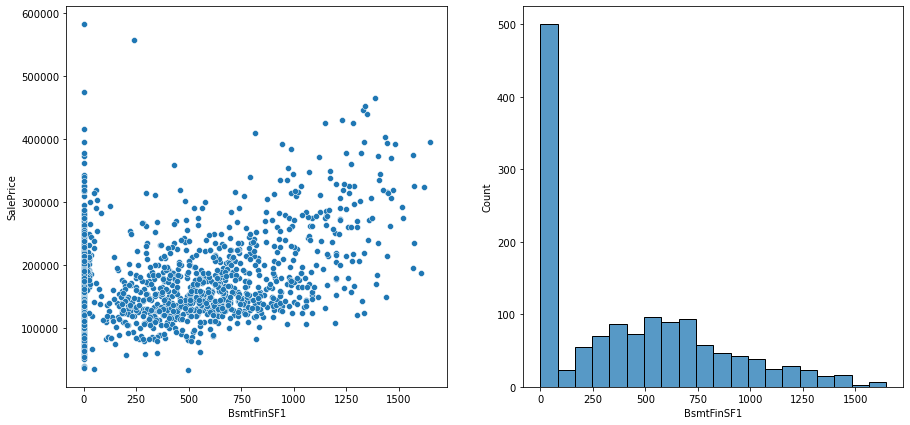

In [203]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='BsmtFinSF1', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'BsmtFinSF1', bins = 20)
plt.show()

<b>Here we can see a positive correlation between sale price and basement finished area.</b>

In [204]:
# Checking the Value count
df['BsmtFinType2'].value_counts()

Unf            1194
Rec              50
LwQ              45
No Basement      38
BLQ              30
ALQ              18
GLQ              13
Name: BsmtFinType2, dtype: int64

In [205]:
# Checking the Value count in percentage
df['BsmtFinType2'].value_counts(1)

Unf            0.860231
Rec            0.036023
LwQ            0.032421
No Basement    0.027378
BLQ            0.021614
ALQ            0.012968
GLQ            0.009366
Name: BsmtFinType2, dtype: float64

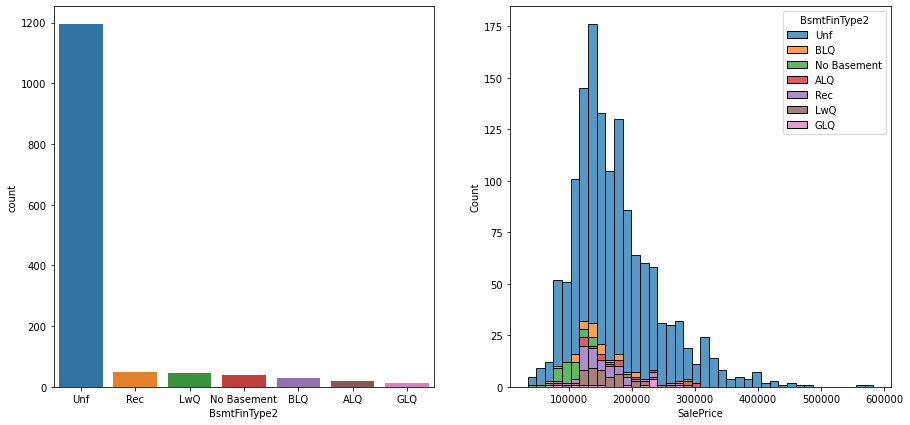

In [206]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtFinType2',data = df, order = df['BsmtFinType2'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtFinType2', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see houses which have multiple basement generally are of unfinished type.</b>

In [207]:
# Checking the Value count
df['BsmtFinSF2'].value_counts()

0       1231
180        4
374        3
96         2
290        2
480        2
117        2
712        2
279        2
287        2
93         2
391        2
468        2
294        2
64         2
41         2
551        2
182        2
230        1
202        1
208        1
210        1
193        1
211        1
215        1
219        1
228        1
1085       1
264        1
232        1
239        1
240        1
258        1
1120       1
273        1
276        1
306        1
311        1
324        1
336        1
181        1
173        1
177        1
123        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
125        1
175        1
127        1
132        1
139        1
144        1
147        1
149        1
150        1
163        1
165        1
168        1
169        1
345        1
174        1
344        1
362        1
352        1
354        1
600        1

In [208]:
df['BsmtFinSF2'].value_counts(1)

0       0.886888
180     0.002882
374     0.002161
96      0.001441
290     0.001441
480     0.001441
117     0.001441
712     0.001441
279     0.001441
287     0.001441
93      0.001441
391     0.001441
468     0.001441
294     0.001441
64      0.001441
41      0.001441
551     0.001441
182     0.001441
230     0.000720
202     0.000720
208     0.000720
210     0.000720
193     0.000720
211     0.000720
215     0.000720
219     0.000720
228     0.000720
1085    0.000720
264     0.000720
232     0.000720
239     0.000720
240     0.000720
258     0.000720
1120    0.000720
273     0.000720
276     0.000720
306     0.000720
311     0.000720
324     0.000720
336     0.000720
181     0.000720
173     0.000720
177     0.000720
123     0.000720
28      0.000720
32      0.000720
35      0.000720
40      0.000720
68      0.000720
80      0.000720
81      0.000720
105     0.000720
106     0.000720
108     0.000720
110     0.000720
119     0.000720
121     0.000720
125     0.000720
175     0.0007

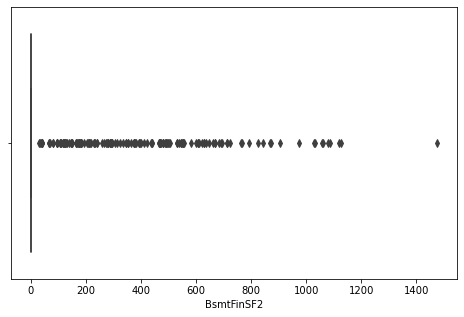

In [209]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='BsmtFinSF2' ,data=df)
plt.show()

In [210]:
# We can drop this variable as around 90% is of one type and 
# the outliers are quite high
df = df.drop(['BsmtFinSF2'], axis=1)

In [211]:
# Checking the Value count
df['BsmtUnfSF'].value_counts()

0       118
728       9
384       8
572       7
600       7
672       6
300       6
280       6
625       6
440       6
270       6
216       5
410       5
108       5
390       5
698       5
264       5
490       5
319       5
816       5
276       4
324       4
684       4
350       4
326       4
336       4
340       4
360       4
638       4
392       4
396       4
420       4
611       4
660       4
284       4
544       4
80        4
100       4
115       4
884       4
125       4
92        4
847       4
840       4
162       4
163       4
168       4
912       4
186       4
192       4
768       4
36        4
628       3
901       3
598       3
596       3
612       3
936       3
594       3
588       3
570       3
556       3
896       3
712       3
630       3
894       3
732       3
832       3
811       3
808       3
780       3
686       3
697       3
700       3
702       3
554       3
756       3
710       3
747       3
864       3
408       3
546       3
278       3
245 

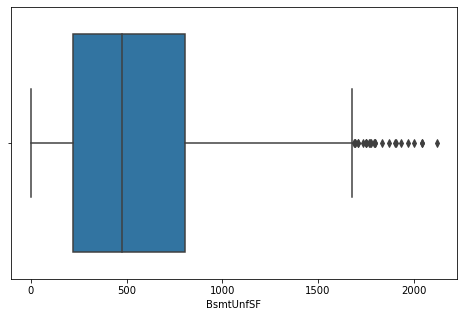

In [212]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='BsmtUnfSF' ,data=df)
plt.show()

In [213]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.BsmtUnfSF))

In [214]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([ 130,  261,  467,  550,  643,  731,  882, 1204], dtype=int64),)


In [215]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1380, 71)

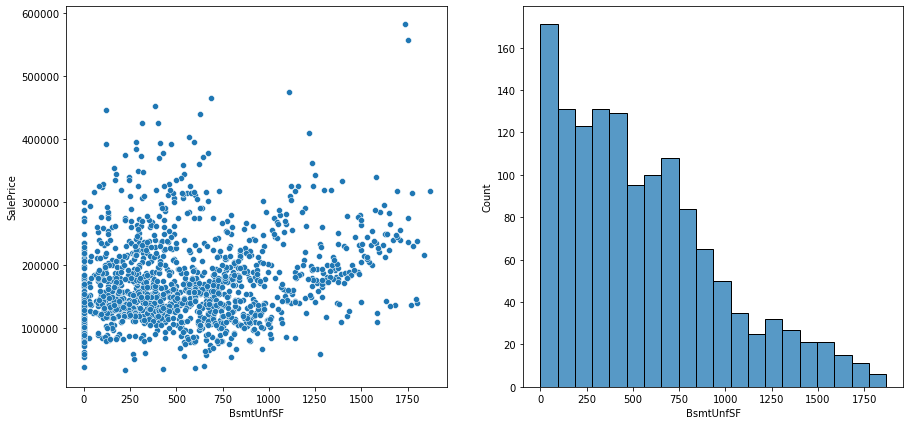

In [216]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='BsmtUnfSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'BsmtUnfSF', bins = 20)
plt.show()

<b>Here we can see some increase in sale price with increase in unfinshed basement area.</b>

In [217]:
# Checking the Value count
df['TotalBsmtSF'].value_counts()

0       37
864     34
672     17
912     15
1040    14
816     13
768     12
894     11
728     11
848     11
832     10
780     10
952      9
756      9
630      9
936      8
1056     8
600      7
840      7
384      7
483      7
720      7
858      6
796      6
1362     6
884      6
876      6
1008     6
1392     6
928      5
1728     5
1144     5
793      5
1440     5
896      5
990      5
686      5
1092     5
992      5
970      5
960      5
880      4
847      4
910      4
924      4
980      4
1026     4
1029     4
1050     4
1057     4
1078     4
1188     4
1064     4
616      4
804      4
735      4
698      4
689      4
764      4
684      4
784      4
660      4
1314     4
1494     4
1208     4
588      4
546      4
855      4
1080     3
1104     3
1086     3
1088     3
1453     3
1372     3
1466     3
1196     3
1258     3
1268     3
1164     3
1117     3
1120     3
1248     3
1127     3
1237     3
1128     3
1216     3
1145     3
1214     3
1200     3
1152     3
1073     3

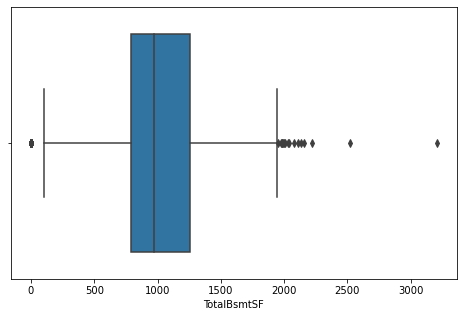

In [218]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='TotalBsmtSF' ,data=df)
plt.show()

In [219]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.TotalBsmtSF))

In [220]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([310, 834, 985], dtype=int64),)


In [221]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1377, 71)

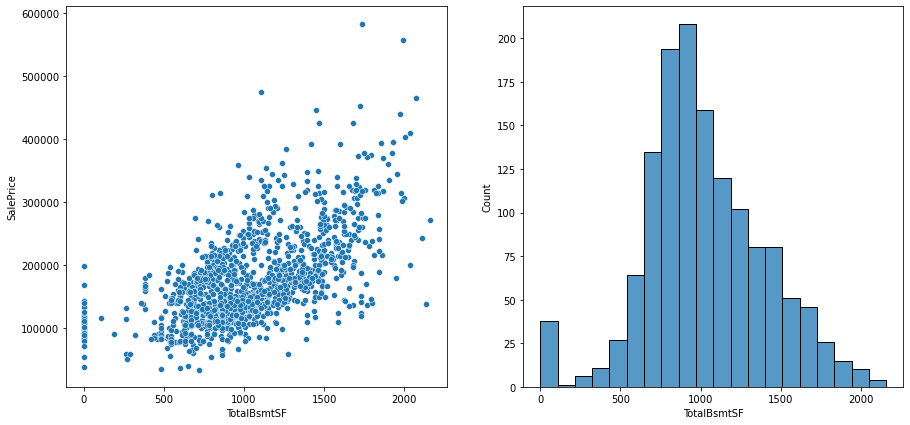

In [222]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='TotalBsmtSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'TotalBsmtSF', bins = 20)
plt.show()

<b>Here we can see that increase in the total basement are increases the sale price.</b>

In [223]:
# Checking the Value count
df['Heating'].value_counts()

GasA     1350
GasW       15
Grav        6
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64

In [224]:
# Checking the Value count in percentage
df['Heating'].value_counts(1)

GasA     0.980392
GasW     0.010893
Grav     0.004357
Wall     0.002905
OthW     0.000726
Floor    0.000726
Name: Heating, dtype: float64

In [225]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Heating'], axis=1)

In [226]:
# Checking the Value count
df['HeatingQC'].value_counts()

Ex    687
TA    415
Gd    229
Fa     45
Po      1
Name: HeatingQC, dtype: int64

In [227]:
# Mergin Po into Fa as it has only 1 value and Fa is the closest in scale to Po
df['HeatingQC'].replace({'Po' : 'Fa',
                         },inplace=True)

In [228]:
# Again checking the values
df['HeatingQC'].value_counts()

Ex    687
TA    415
Gd    229
Fa     46
Name: HeatingQC, dtype: int64

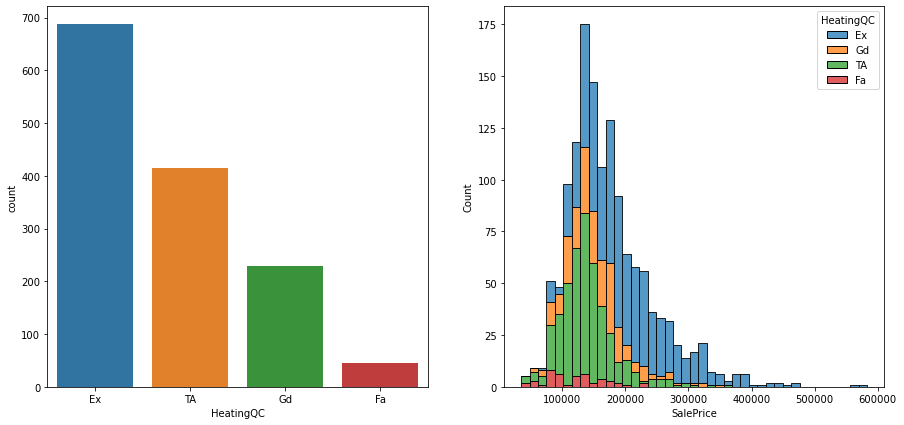

In [229]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'HeatingQC',data = df, order = df['HeatingQC'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='HeatingQC', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see that most houses have Excellent heating and as a result fetch higher prices.</b>

In [230]:
# Checking the Value count
df['CentralAir'].value_counts()

Y    1286
N      91
Name: CentralAir, dtype: int64

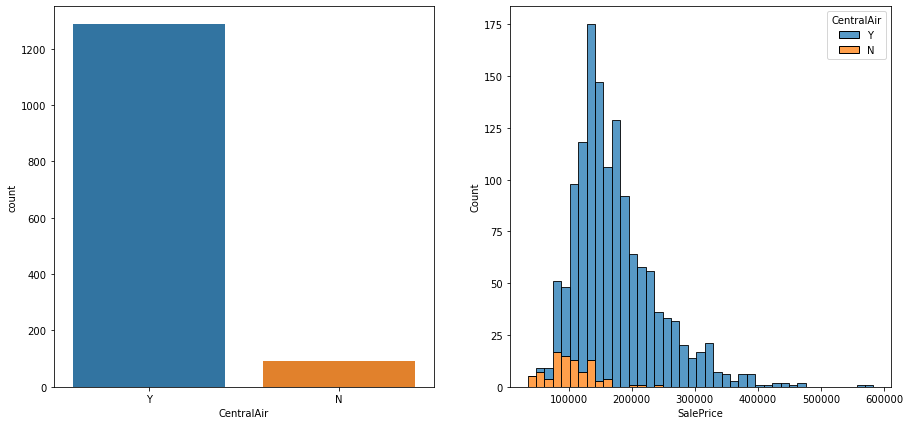

In [231]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'CentralAir',data = df, order = df['CentralAir'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='CentralAir', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have central air conditioning as a result fetching higher prices.</b>

In [232]:
# Checking the Value count
df['Electrical'].value_counts()

SBrkr    1254
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [233]:
# Checking the Value count in percentage
df['Electrical'].value_counts(1)

SBrkr    0.910675
FuseA    0.066812
FuseF    0.019608
FuseP    0.002179
Mix      0.000726
Name: Electrical, dtype: float64

In [234]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Electrical'], axis=1)

In [235]:
# Checking the Value count
df['1stFlrSF'].value_counts()

864     24
1040    16
912     14
894     12
848     12
672     11
630      9
816      9
936      7
483      7
832      7
960      7
882      6
728      6
840      6
764      6
1728     6
720      6
1056     6
990      6
1236     5
958      5
616      5
948      5
698      5
1392     5
1314     5
1144     5
804      5
858      5
1200     5
774      5
1422     5
1494     5
1088     5
796      5
798      5
768      5
1026     5
988      5
520      5
980      5
1328     4
1050     4
1048     4
780      4
1337     4
847      4
1092     4
855      4
928      4
900      4
1004     4
892      4
1306     4
884      4
1022     4
866      4
902      4
1188     4
1128     4
810      4
1120     4
1164     4
860      4
1136     4
970      4
952      4
1072     4
1440     4
1442     4
1057     4
1080     4
756      4
808      3
1518     3
1302     3
1504     3
833      3
792      3
1478     3
1484     3
1344     3
1352     3
1362     3
1414     3
1500     3
1370     3
1383     3
1466     3
1301     3

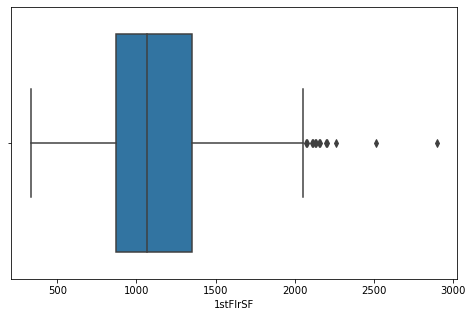

In [236]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='1stFlrSF' ,data=df)
plt.show()

In [237]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df['1stFlrSF']))

In [238]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([  62,  107,  164,  494,  963, 1134], dtype=int64),)


In [239]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1371, 69)

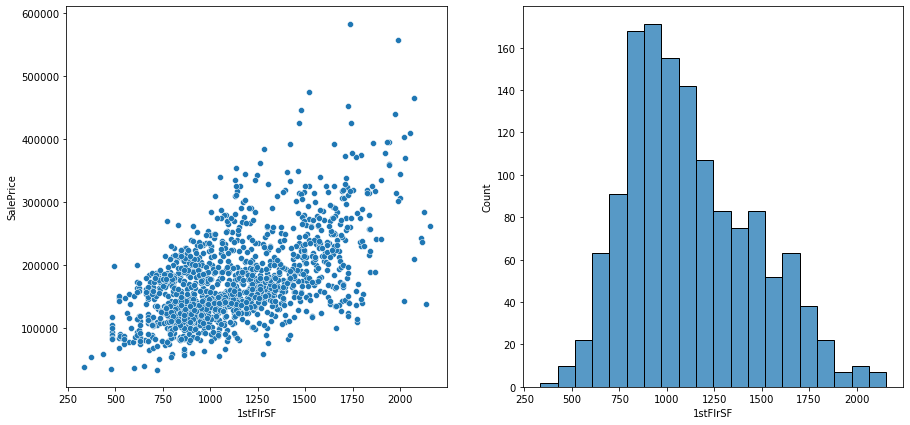

In [240]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='1stFlrSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = '1stFlrSF', bins = 20)
plt.show()

<b>Here we can see with the increase in First Floor area increases the Sale price. </b>

In [241]:
# Checking the Value count
df['2ndFlrSF'].value_counts()

0       782
728      10
504       8
546       8
720       7
600       7
672       7
896       6
780       5
862       5
689       5
756       5
840       5
551       4
702       4
878       4
804       4
741       4
739       4
871       3
677       3
858       3
846       3
793       3
832       3
596       3
795       3
668       3
704       3
670       3
1254      3
888       3
660       3
684       3
886       3
915       3
807       3
1040      2
576       2
676       2
550       2
560       2
842       2
678       2
1020      2
564       2
568       2
567       2
844       2
864       2
983       2
584       2
648       2
900       2
640       2
902       2
885       2
884       2
650       2
651       2
912       2
880       2
625       2
876       2
656       2
620       2
612       2
872       2
601       2
941       2
866       2
978       2
860       2
833       2
829       2
1070      2
1177      2
448       2
445       2
785       2
703       2
534       2
783       2
432 

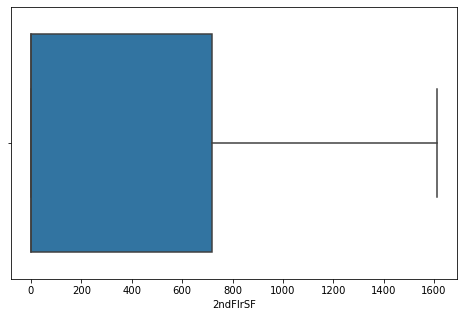

In [242]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='2ndFlrSF' ,data=df)
plt.show()

In [243]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df['2ndFlrSF']))

In [244]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([1274], dtype=int64),)


In [245]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1370, 69)

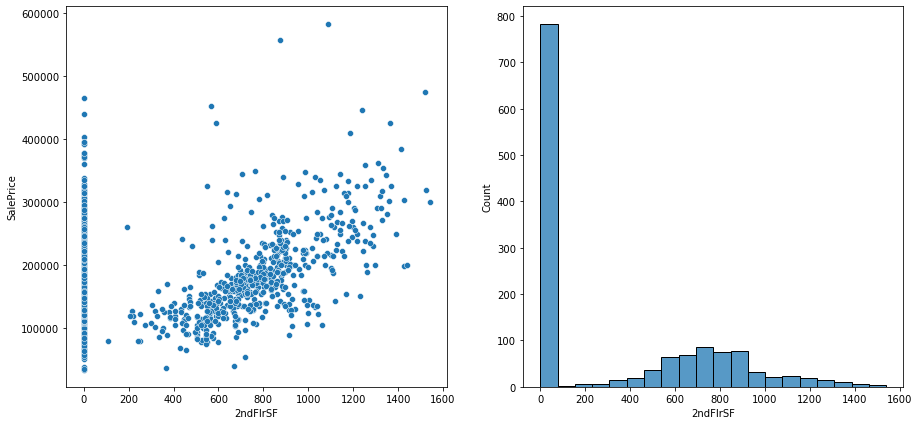

In [246]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='2ndFlrSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = '2ndFlrSF', bins = 20)
plt.show()

<b>Here we can see with the increase in Second Floor area increases the Sale price. </b>

In [247]:
# Checking the Value count
df['LowQualFinSF'].value_counts()

0      1347
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
397       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [248]:
# Checking the Value count in percentage
df['LowQualFinSF'].value_counts(1)

0      0.983212
80     0.002190
360    0.001460
371    0.000730
53     0.000730
120    0.000730
144    0.000730
156    0.000730
232    0.000730
234    0.000730
572    0.000730
528    0.000730
390    0.000730
397    0.000730
420    0.000730
473    0.000730
481    0.000730
513    0.000730
514    0.000730
515    0.000730
384    0.000730
Name: LowQualFinSF, dtype: float64

In [249]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['LowQualFinSF'], axis=1)

In [250]:
# Checking the Value count
df['GrLivArea'].value_counts()

864     21
1040    14
894     11
848     10
1456    10
912      9
1200     9
1092     8
816      8
987      7
1728     7
1344     7
1224     6
1768     6
1056     6
630      6
1494     6
1144     5
1218     5
960      5
1302     5
1314     5
1252     5
1392     5
990      5
988      5
1710     5
1484     5
1362     4
1632     4
1382     4
882      4
1414     4
1734     4
1573     4
1440     4
1442     4
1479     4
1502     4
1416     4
858      4
1258     4
1656     4
1664     4
1250     4
1337     4
1208     4
1792     4
1694     4
1680     4
1709     4
1652     4
1716     4
1646     4
1668     4
1504     3
1717     3
1501     3
1509     3
1718     3
1689     3
1720     3
1500     3
1640     3
768      3
1588     3
1661     3
1593     3
1660     3
1601     3
1604     3
720      3
1616     3
1647     3
1620     3
1626     3
1644     3
1535     3
1489     3
1324     3
1306     3
980      3
1294     3
999      3
1268     3
1236     3
1048     3
1214     3
1212     3
1196     3
1072     3

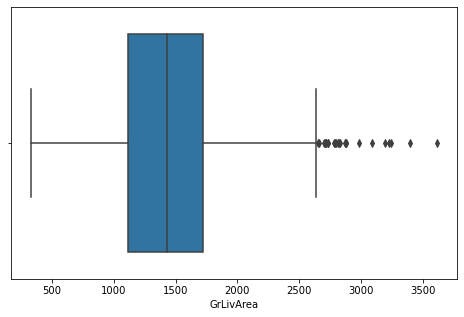

In [251]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='GrLivArea' ,data=df)
plt.show()

In [252]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df['GrLivArea']))

In [253]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([ 109,  170,  299,  568,  594,  897,  965,  979, 1101, 1267],
      dtype=int64),)


In [254]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1360, 68)

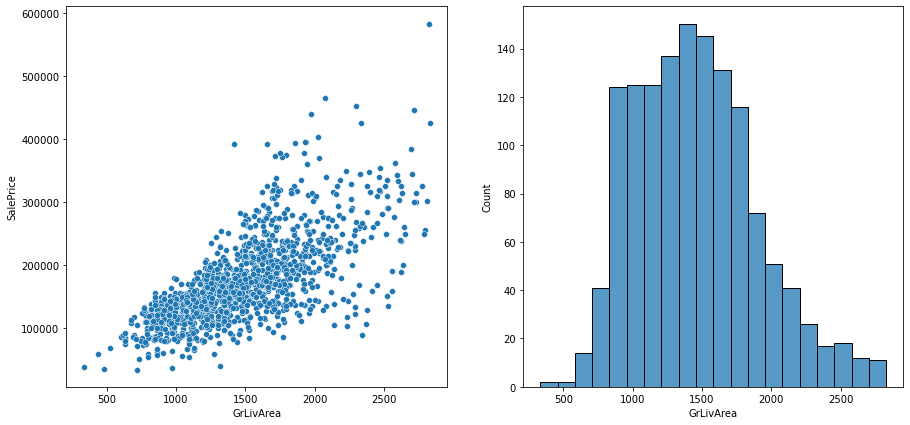

In [255]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='GrLivArea', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'GrLivArea', bins = 20)
plt.show()

<b>Here we can see with the increase in Above Grade living area increases the Sale price. </b>

In [256]:
# Checking the Value count
df['BsmtFullBath'].value_counts()

0    808
1    541
2     10
3      1
Name: BsmtFullBath, dtype: int64

In [257]:
# Merging 2 and 3
df['BsmtFullBath'].replace({3 : 2,
                         },inplace=True)

In [258]:
# Again checking the values
df['BsmtFullBath'].value_counts()

0    808
1    541
2     11
Name: BsmtFullBath, dtype: int64

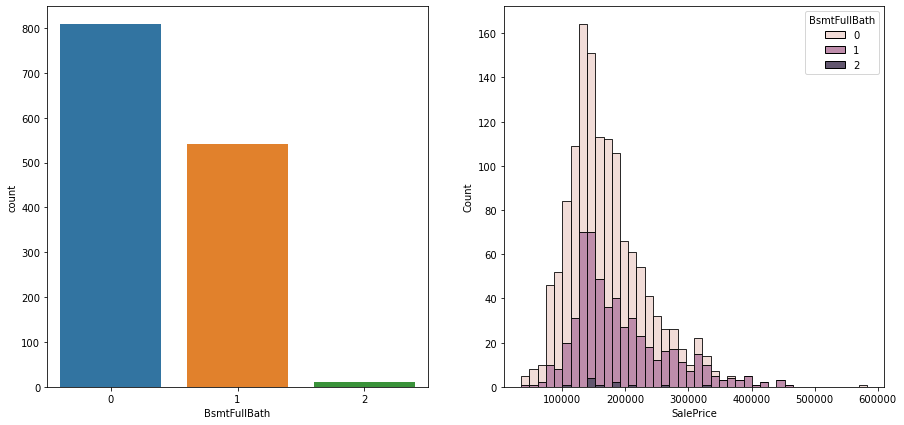

In [259]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BsmtFullBath',data = df, order = df['BsmtFullBath'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BsmtFullBath', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have either no Full Bathrooms or 1 Full Bathroom. </b>

In [260]:
# Checking the Value count
df['BsmtHalfBath'].value_counts()

0    1283
1      75
2       2
Name: BsmtHalfBath, dtype: int64

In [261]:
# Checking the Value count in percentage
df['BsmtHalfBath'].value_counts(1)

0    0.943382
1    0.055147
2    0.001471
Name: BsmtHalfBath, dtype: float64

In [262]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['BsmtHalfBath'], axis=1)

In [263]:
# Checking the Value count
df['FullBath'].value_counts()

2    701
1    635
3     16
0      8
Name: FullBath, dtype: int64

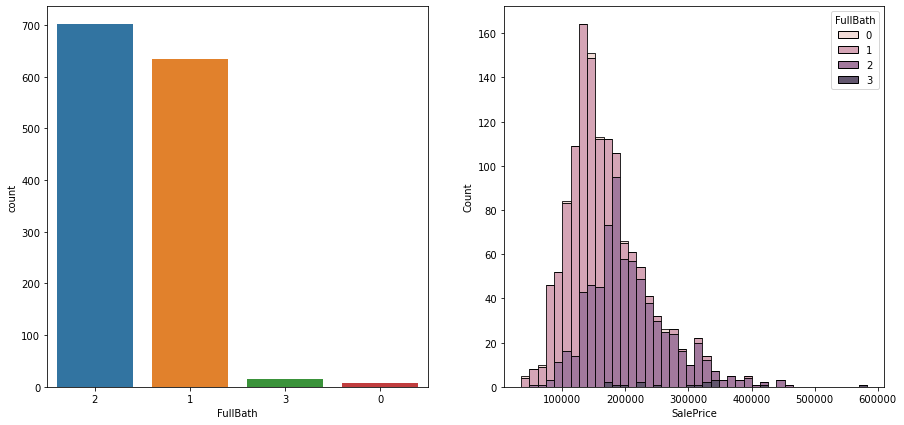

In [264]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'FullBath',data = df, order = df['FullBath'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='FullBath', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have either 2 or 1 Full Bathrooms above Grade level. General trend show more bathrooms have higher sale price.</b>

In [265]:
# Checking the Value count
df['HalfBath'].value_counts()

0    866
1    482
2     12
Name: HalfBath, dtype: int64

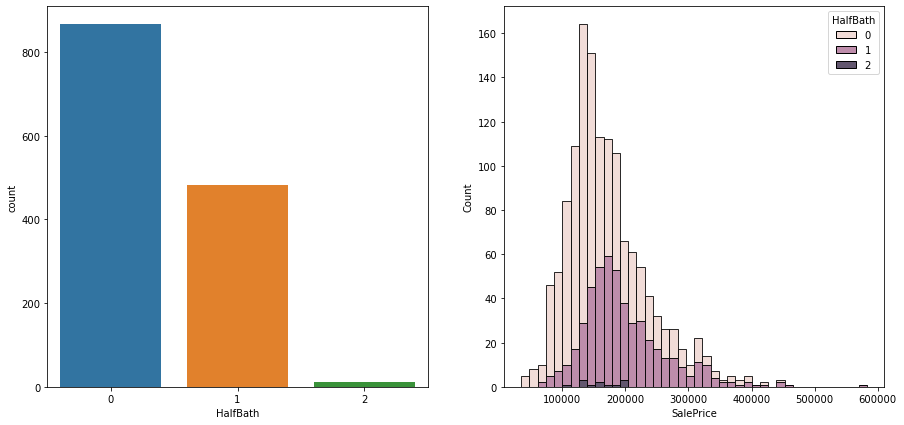

In [266]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'HalfBath',data = df, order = df['HalfBath'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='HalfBath', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have either 0 or 1 Half Bathrooms above Grade level. General trend show more bathrooms have higher sale price.</b>

In [267]:
# Checking the Value count
df['BedroomAbvGr'].value_counts()

3    762
2    342
4    182
1     47
5     15
6      7
0      5
Name: BedroomAbvGr, dtype: int64

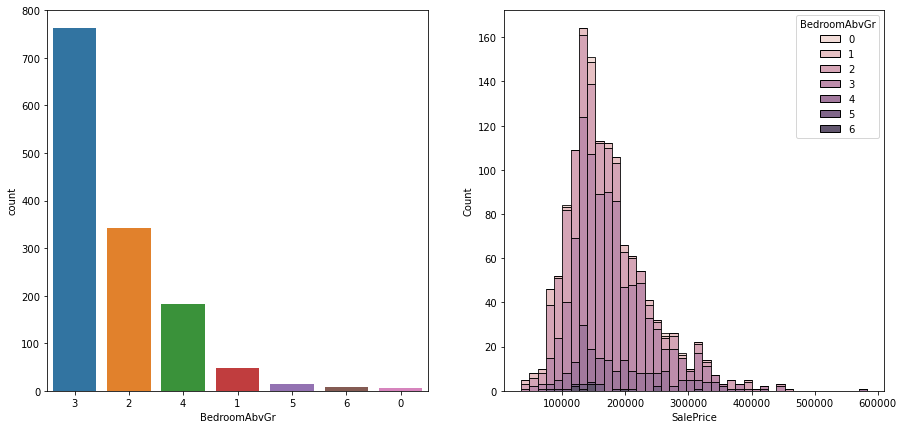

In [268]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'BedroomAbvGr',data = df, order = df['BedroomAbvGr'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='BedroomAbvGr', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have 3 Bedrooms above Grade level. General trend show more Bedrooms have higher sale price.</b>

In [269]:
# Checking the Value count
df['KitchenAbvGr'].value_counts()

1    1295
2      62
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [270]:
# Checking the Value count in percentage
df['KitchenAbvGr'].value_counts(1)

1    0.952206
2    0.045588
3    0.001471
0    0.000735
Name: KitchenAbvGr, dtype: float64

In [271]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['KitchenAbvGr'], axis=1)

In [272]:
# Checking the Value count
df['KitchenQual'].value_counts()

TA    709
Gd    542
Ex     73
Fa     36
Name: KitchenQual, dtype: int64

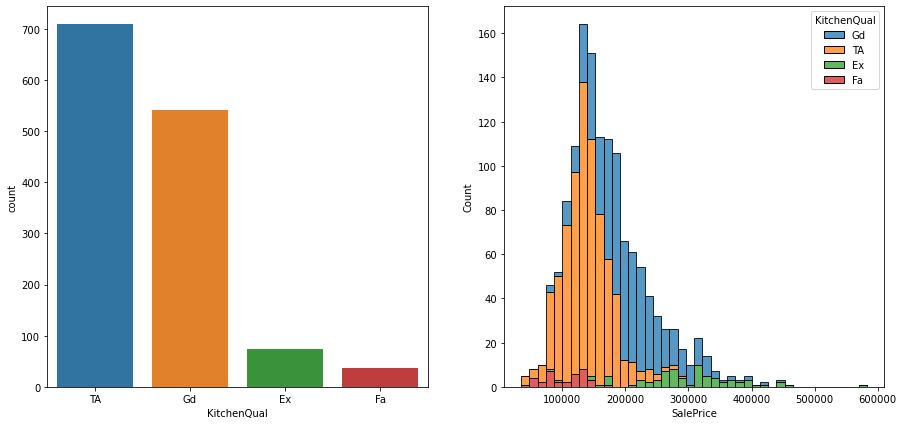

In [273]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'KitchenQual',data = df, order = df['KitchenQual'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='KitchenQual', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have either Typical or Good Kitchen quality. Generally trend show the better quality Kitchen fetch higher price. </b>

In [274]:
# Checking the Value count
df['TotRmsAbvGrd'].value_counts()

6     395
7     309
5     268
8     165
4      95
9      61
10     33
3      17
11     10
12      6
2       1
Name: TotRmsAbvGrd, dtype: int64

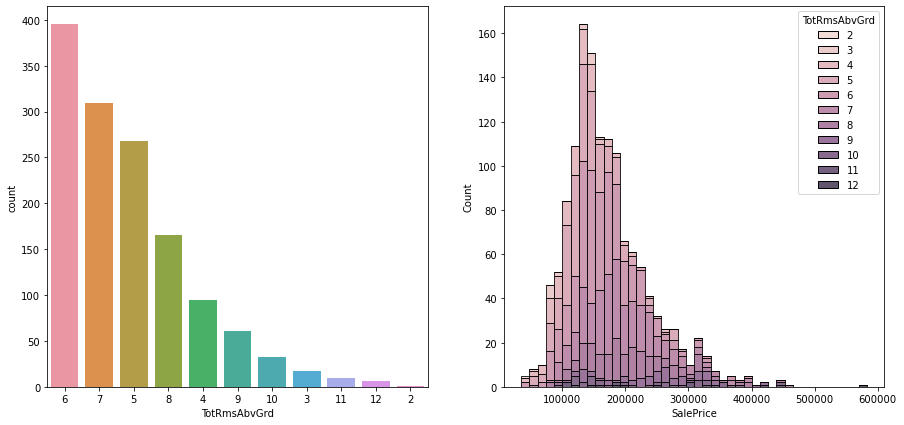

In [275]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'TotRmsAbvGrd',data = df, order = df['TotRmsAbvGrd'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='TotRmsAbvGrd', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have 6 Total rooms above Grade level. General trend show more Total rooms have higher sale price.</b>

In [276]:
# Checking the Value count
df['Functional'].value_counts()

Typ     1268
Min2      34
Min1      28
Mod       12
Maj1      12
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [277]:
# Checking the Value count in percentage
df['Functional'].value_counts(1)

Typ     0.932353
Min2    0.025000
Min1    0.020588
Mod     0.008824
Maj1    0.008824
Maj2    0.003676
Sev     0.000735
Name: Functional, dtype: float64

In [278]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['Functional'], axis=1)

In [279]:
# Checking the Value count
df['Fireplaces'].value_counts()

0    678
1    590
2     88
3      4
Name: Fireplaces, dtype: int64

In [280]:
# Merging 2 and 3
df['Fireplaces'].replace({3 : 2,
                         },inplace=True)

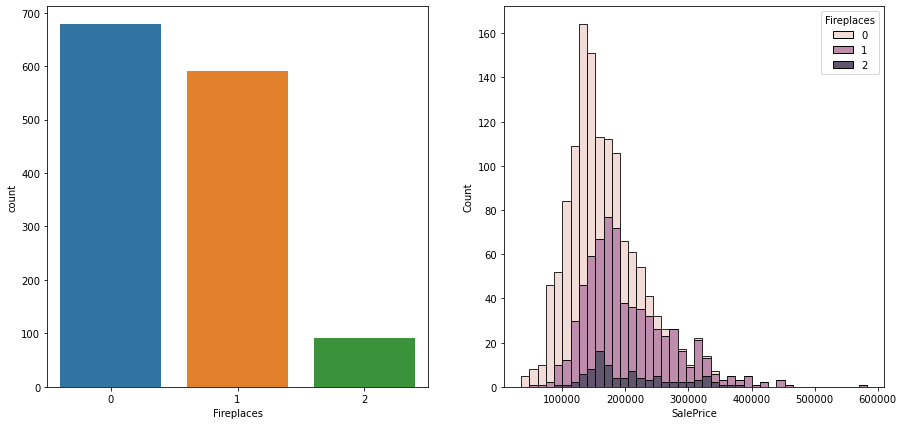

In [281]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'Fireplaces',data = df, order = df['Fireplaces'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='Fireplaces', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses either have 0 or 1 Fireplace. General trend show more Fireplace have higher sale price.</b>

In [282]:
# Checking the Value count
df['FireplaceQu'].value_counts()

No Fireplace    678
Gd              330
TA              285
Fa               31
Po               20
Ex               16
Name: FireplaceQu, dtype: int64

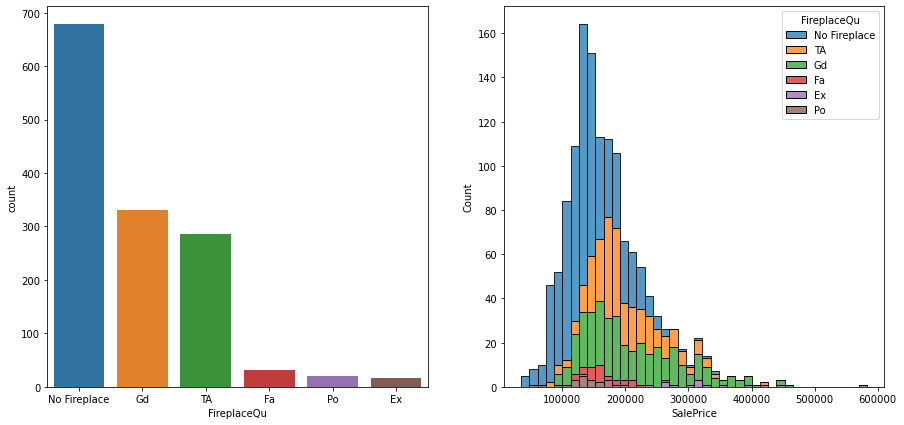

In [283]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'FireplaceQu',data = df, order = df['FireplaceQu'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='FireplaceQu', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses either have no fireplace and those who have keep it in good or average condition. General trend show good condition Fireplace fetch higher sale price.</b>

In [284]:
# Checking the Value count
df['GarageType'].value_counts()

Attchd       805
Detchd       376
No Garage     76
BuiltIn       75
Basment       15
CarPort        9
2Types         4
Name: GarageType, dtype: int64

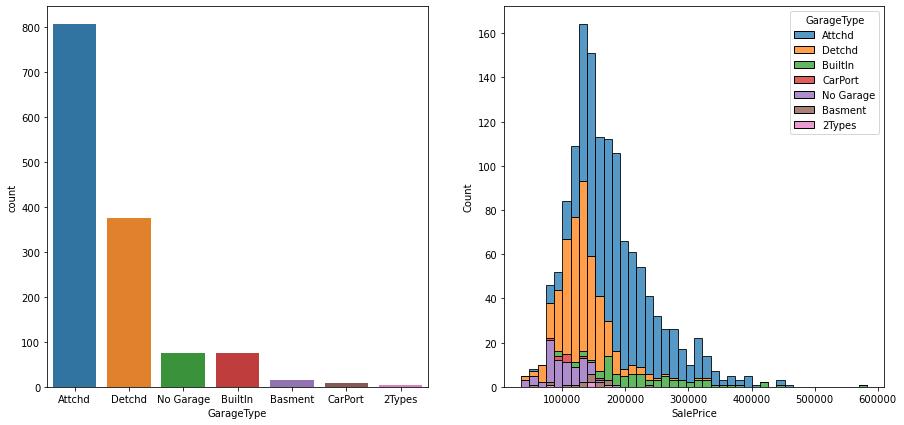

In [285]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'GarageType',data = df, order = df['GarageType'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='GarageType', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see that most houses have attached garage and in general fetch higher prices.</b>

In [286]:
# Checking the Value count
df['GarageFinish'].value_counts()

Unf          583
RFn          398
Fin          303
No Garage     76
Name: GarageFinish, dtype: int64

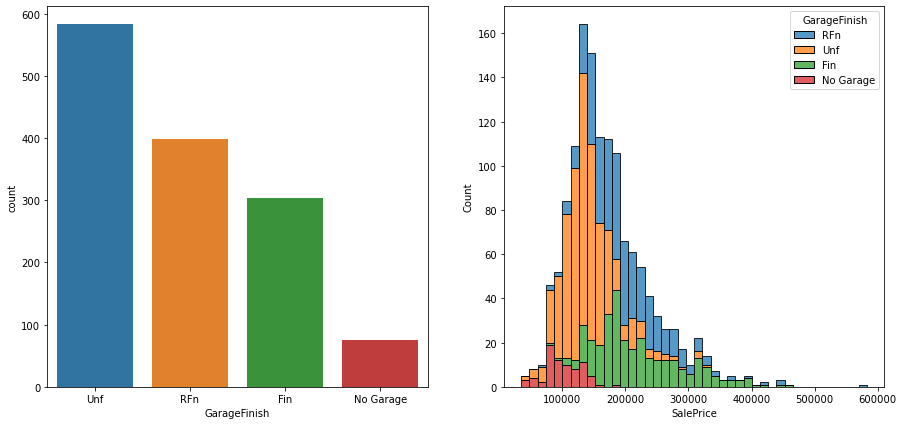

In [287]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'GarageFinish',data = df, order = df['GarageFinish'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='GarageFinish', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses have unfinished garage.</b>

In [288]:
# Checking the Value count
df['GarageCars'].value_counts()

2    779
1    367
3    134
0     76
4      4
Name: GarageCars, dtype: int64

In [289]:
# Merging 3 and 4
df['GarageCars'].replace({4 : 3,
                         },inplace=True)

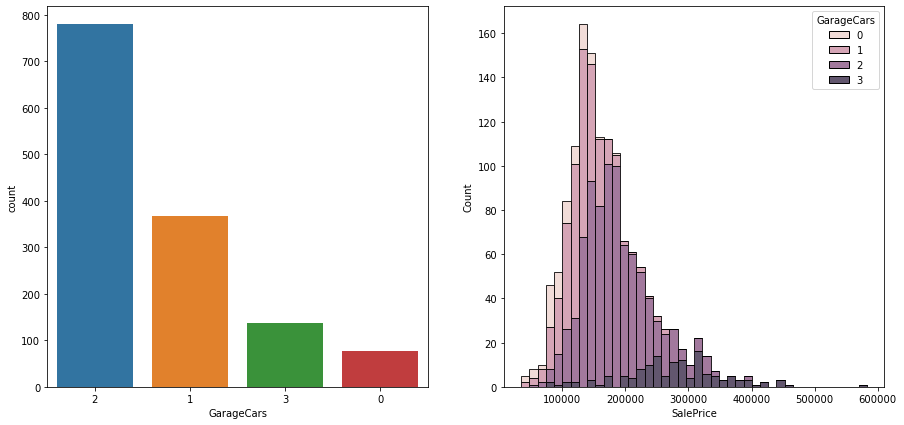

In [290]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'GarageCars',data = df, order = df['GarageCars'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='GarageCars', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see most houses can accomodate 2 cars in their garage, and we can also see the higher the number of cars a garage can accomodate fetch higher prices.</b>

In [291]:
# Checking the Value count
df['GarageArea'].value_counts()

0       76
440     47
576     43
240     37
484     32
528     31
288     27
400     24
264     24
480     24
308     20
420     18
280     16
672     13
216     12
504     12
352     12
336     12
564     10
300     10
360     10
462     10
540     10
312      9
660      9
384      9
180      9
539      9
286      9
572      9
588      8
432      8
550      8
520      8
506      7
624      7
474      7
460      7
461      6
490      6
472      6
525      6
396      6
648      6
478      6
500      6
297      5
299      5
720      5
451      5
544      5
338      5
530      5
560      5
431      5
546      5
380      5
527      5
492      5
434      5
252      5
840      5
270      5
470      4
294      4
463      4
200      4
495      4
577      4
402      4
450      4
532      4
676      4
502      4
442      4
430      4
600      4
552      4
390      4
632      3
516      3
486      3
388      3
487      3
514      3
836      3
260      3
275      3
834      3
210      3
220      3

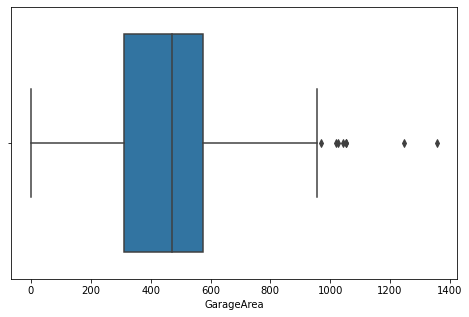

In [292]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='GarageArea' ,data=df)
plt.show()

In [293]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.GarageArea))

In [294]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([ 986, 1105], dtype=int64),)


In [295]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1358, 65)

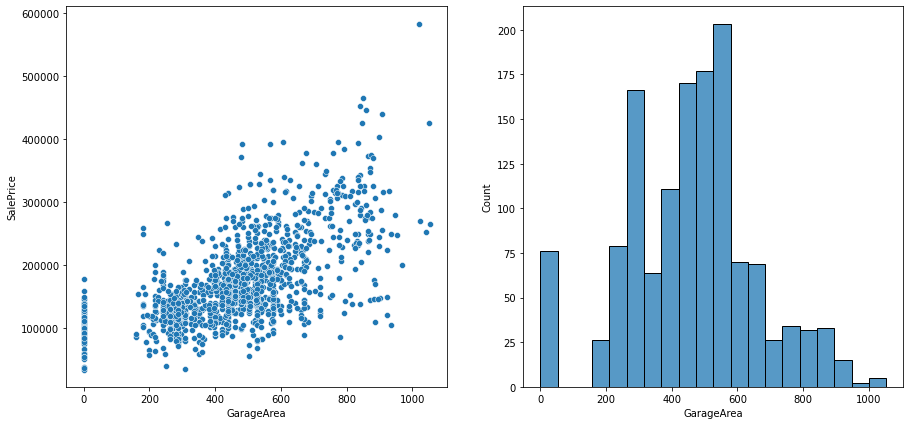

In [296]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='GarageArea', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'GarageArea', bins = 20)
plt.show()

<b>Here we can see the increase in area of Garage increases the sale price.</b>

In [297]:
# Checking the Value count
df['GarageQual'].value_counts()

TA           1218
No Garage      76
Fa             45
Gd             14
Po              3
Ex              2
Name: GarageQual, dtype: int64

In [298]:
# Checking the Value count in percentage
df['GarageQual'].value_counts(1)

TA           0.896907
No Garage    0.055965
Fa           0.033137
Gd           0.010309
Po           0.002209
Ex           0.001473
Name: GarageQual, dtype: float64

In [299]:
# We can drop this variable is around 90% is of only one type
df = df.drop(['GarageQual'], axis=1)

In [300]:
# Checking the Value count
df['GarageCond'].value_counts()

TA           1230
No Garage      76
Fa             35
Gd              9
Po              6
Ex              2
Name: GarageCond, dtype: int64

In [301]:
# Checking the Value count in percentage
df['GarageCond'].value_counts(1)

TA           0.905744
No Garage    0.055965
Fa           0.025773
Gd           0.006627
Po           0.004418
Ex           0.001473
Name: GarageCond, dtype: float64

In [302]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['GarageCond'], axis=1)

In [303]:
# Checking the Value count
df['PavedDrive'].value_counts()

Y    1247
N      82
P      29
Name: PavedDrive, dtype: int64

In [304]:
# Checking the Value count in percentage
df['PavedDrive'].value_counts(1)

Y    0.918262
N    0.060383
P    0.021355
Name: PavedDrive, dtype: float64

In [305]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['PavedDrive'], axis=1)

In [306]:
# Checking the Value count
df['WoodDeckSF'].value_counts()

0      719
100     36
192     36
120     31
144     29
168     27
140     14
224     13
240      9
208      9
180      8
160      8
216      8
143      6
96       6
156      6
132      6
288      5
48       5
264      5
105      5
196      5
182      4
158      4
125      4
171      4
104      4
64       4
74       4
250      4
210      4
147      4
201      3
203      3
165      3
164      3
178      3
198      3
280      3
220      3
268      3
239      3
172      3
335      3
149      3
150      3
40       3
36       3
88       3
108      3
112      3
113      3
72       3
80       3
142      3
228      2
212      2
12       2
68       2
209      2
24       2
60       2
58       2
55       2
26       2
28       2
49       2
219      2
238      2
222      2
38       2
237      2
148      2
106      2
253      2
194      2
154      2
155      2
146      2
138      2
135      2
161      2
128      2
127      2
123      2
169      2
116      2
115      2
114      2
184      2
185      2

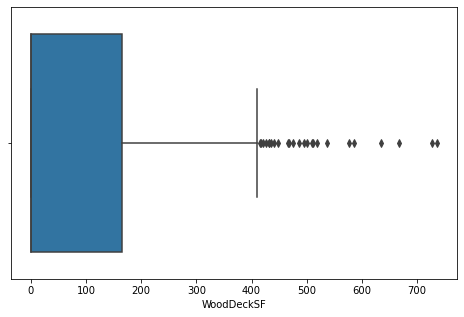

In [307]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='WoodDeckSF' ,data=df)
plt.show()

In [308]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.WoodDeckSF))

In [309]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([  60,  154,  277,  313,  326,  442,  496,  765,  828,  904,  992,
       1060, 1122, 1217, 1218, 1321, 1357], dtype=int64),)


In [310]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1341, 62)

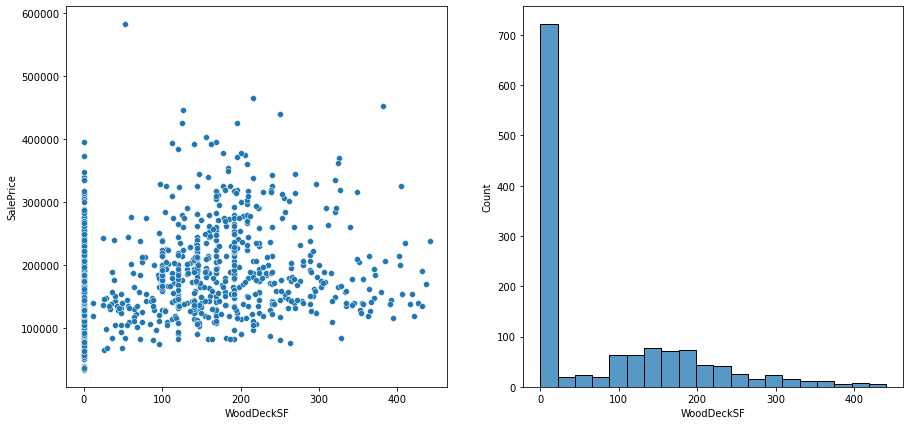

In [311]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='WoodDeckSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'WoodDeckSF', bins = 20)
plt.show()

<b></b>

In [312]:
# Checking the Value count
df['OpenPorchSF'].value_counts()

0      623
36      26
48      20
20      18
40      18
45      16
30      15
60      14
24      14
28      14
39      14
44      13
50      12
54      11
35      11
42      10
63      10
32      10
75       9
96       9
98       9
66       9
38       8
120      8
64       8
80       7
84       7
102      7
70       7
114      7
68       7
130      7
72       7
56       7
144      7
27       7
16       7
25       7
55       6
51       6
22       6
33       6
26       6
140      5
18       5
116      5
21       5
100      5
59       5
88       5
78       5
46       5
65       5
150      5
29       4
74       4
34       4
104      4
108      4
110      4
112      4
49       4
52       4
128      4
62       4
57       4
113      4
168      4
151      3
47       3
166      3
111      3
90       3
87       3
82       3
184      3
158      3
122      3
124      3
73       3
105      3
132      3
192      3
234      3
136      3
53       3
61       3
154      3
69       2
204      2
211      2

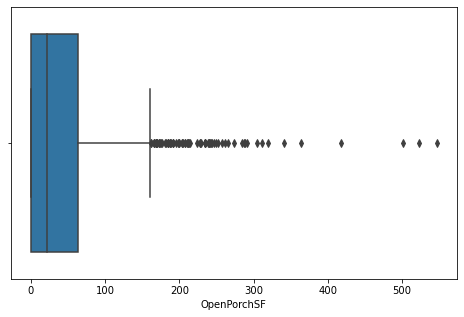

In [313]:
# Let's Plot a boxplot for Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x='OpenPorchSF' ,data=df)
plt.show()

In [314]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.OpenPorchSF))

In [315]:
# Setting the threshold value
threshold = 3
print(np.where((z > 3)))

(array([  27,  267,  451,  454,  533,  541,  570,  592,  610,  653,  674,
        709,  718,  782,  788,  803,  869,  915, 1019, 1094, 1125, 1185,
       1207, 1218, 1255], dtype=int64),)


In [316]:
# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(1316, 62)

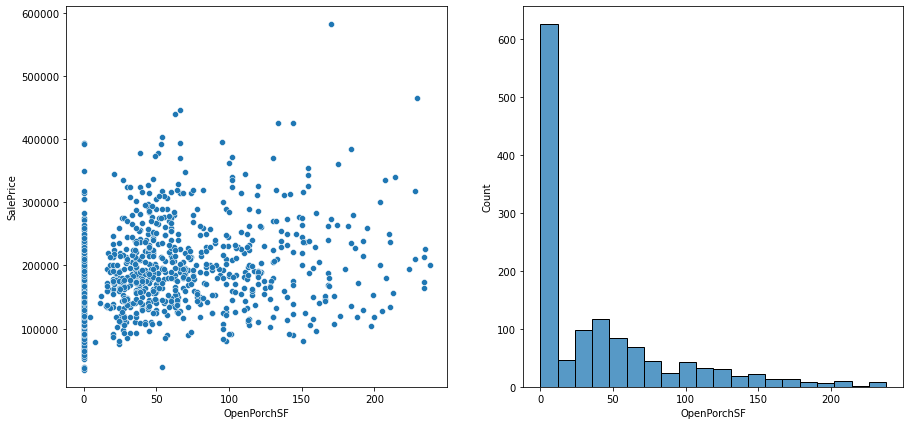

In [317]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
sns.scatterplot(ax=axes[0], data=df, x='OpenPorchSF', y = 'SalePrice')
sns.histplot(ax=axes[1],data=df, x = 'OpenPorchSF', bins = 20)
plt.show()

<b></b>

In [318]:
# Checking the Value count
df['EnclosedPorch'].value_counts()

0      1126
112      15
96        6
144       5
120       5
156       4
216       4
192       4
252       4
116       4
150       3
128       3
126       3
228       3
102       3
184       3
164       3
168       2
160       2
176       2
180       2
185       2
158       2
40        2
32        2
137       2
77        2
114       2
34        2
108       2
100       2
36        2
84        2
80        2
190       2
154       2
240       2
205       2
236       2
234       2
264       2
224       2
244       2
286       1
280       1
248       1
254       1
99        1
98        1
19        1
259       1
24        1
94        1
91        1
90        1
87        1
30        1
81        1
268       1
272       1
294       1
70        1
68        1
105       1
64        1
60        1
56        1
54        1
52        1
48        1
44        1
42        1
275       1
39        1
67        1
194       1
242       1
220       1
189       1
198       1
202       1
183       1
177       1
208 

In [319]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['EnclosedPorch'], axis=1)

In [320]:
# Checking the Value count
df['3SsnPorch'].value_counts()

0      1292
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [321]:
# Checking the Value count in percentage
df['3SsnPorch'].value_counts(1)

0      0.981763
168    0.002280
216    0.001520
144    0.001520
180    0.001520
245    0.000760
238    0.000760
290    0.000760
196    0.000760
182    0.000760
407    0.000760
304    0.000760
162    0.000760
153    0.000760
320    0.000760
140    0.000760
130    0.000760
96     0.000760
23     0.000760
508    0.000760
Name: 3SsnPorch, dtype: float64

In [322]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['3SsnPorch'], axis=1)

In [323]:
# Checking the Value count
df['ScreenPorch'].value_counts()

0      1214
192       6
120       5
189       4
224       3
90        3
126       3
144       3
147       3
160       3
168       3
180       3
100       2
184       2
200       2
216       2
176       2
288       2
259       2
233       1
322       1
152       1
287       1
145       1
143       1
140       1
130       1
128       1
291       1
122       1
119       1
154       1
116       1
374       1
99        1
95        1
385       1
80        1
63        1
60        1
53        1
40        1
153       1
155       1
234       1
156       1
222       1
220       1
252       1
204       1
198       1
197       1
260       1
190       1
265       1
185       1
266       1
182       1
271       1
178       1
396       1
170       1
273       1
165       1
163       1
161       1
276       1
440       1
Name: ScreenPorch, dtype: int64

In [324]:
# Checking the Value count in percentage
df['ScreenPorch'].value_counts(1)

0      0.922492
192    0.004559
120    0.003799
189    0.003040
224    0.002280
90     0.002280
126    0.002280
144    0.002280
147    0.002280
160    0.002280
168    0.002280
180    0.002280
100    0.001520
184    0.001520
200    0.001520
216    0.001520
176    0.001520
288    0.001520
259    0.001520
233    0.000760
322    0.000760
152    0.000760
287    0.000760
145    0.000760
143    0.000760
140    0.000760
130    0.000760
128    0.000760
291    0.000760
122    0.000760
119    0.000760
154    0.000760
116    0.000760
374    0.000760
99     0.000760
95     0.000760
385    0.000760
80     0.000760
63     0.000760
60     0.000760
53     0.000760
40     0.000760
153    0.000760
155    0.000760
234    0.000760
156    0.000760
222    0.000760
220    0.000760
252    0.000760
204    0.000760
198    0.000760
197    0.000760
260    0.000760
190    0.000760
265    0.000760
185    0.000760
266    0.000760
182    0.000760
271    0.000760
178    0.000760
396    0.000760
170    0.000760
273    0

In [325]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['ScreenPorch'], axis=1)

In [326]:
# Checking the Value count
df['PoolArea'].value_counts()

0      1313
648       1
576       1
519       1
Name: PoolArea, dtype: int64

In [327]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['PoolArea'], axis=1)

In [328]:
# Checking the Value count
df['PoolQC'].value_counts()

No Pool    1313
Fa            2
Gd            1
Name: PoolQC, dtype: int64

In [329]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['PoolQC'], axis=1)

In [330]:
# Checking the Value count
df['Fence'].value_counts()

No Fence    1057
MnPrv        149
GdPrv         50
GdWo          50
MnWw          10
Name: Fence, dtype: int64

In [331]:
# Checking the Value count in percentage
df['Fence'].value_counts(1)

No Fence    0.803191
MnPrv       0.113222
GdPrv       0.037994
GdWo        0.037994
MnWw        0.007599
Name: Fence, dtype: float64

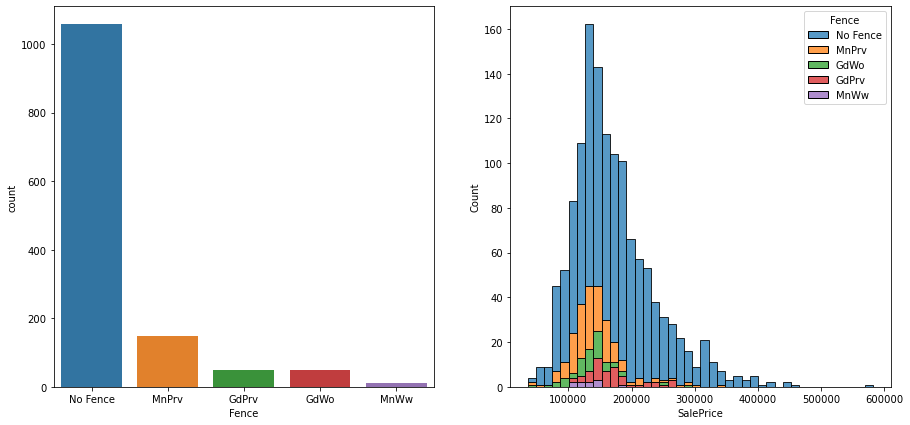

In [332]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'Fence',data = df, order = df['Fence'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='Fence', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see that most houses do not have Fence.</b>

In [333]:
# Checking the Value count
df['MiscFeature'].value_counts()

None    1268
Shed      43
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [334]:
# Checking the Value count in percentage
df['MiscFeature'].value_counts(1)

None    0.963526
Shed    0.032675
Othr    0.001520
Gar2    0.001520
TenC    0.000760
Name: MiscFeature, dtype: float64

In [335]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['MiscFeature'], axis=1)

In [336]:
# Checking the Value count
df['MiscVal'].value_counts()

0        1270
400        10
500         7
700         4
450         4
2000        4
600         4
1200        2
800         1
15500       1
620         1
3500        1
480         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [337]:
# Checking the Value count in percentage
df['MiscVal'].value_counts(1)

0        0.965046
400      0.007599
500      0.005319
700      0.003040
450      0.003040
2000     0.003040
600      0.003040
1200     0.001520
800      0.000760
15500    0.000760
620      0.000760
3500     0.000760
480      0.000760
2500     0.000760
1300     0.000760
1400     0.000760
350      0.000760
8300     0.000760
54       0.000760
Name: MiscVal, dtype: float64

In [338]:
# We can drop this variable as more than 90% is of one type
df = df.drop(['MiscVal'], axis=1)

In [339]:
# Checking the Value count
df['MoSold'].value_counts()

6     219
7     212
5     183
4     136
8     111
3      89
10     78
11     73
9      59
12     54
1      52
2      50
Name: MoSold, dtype: int64

In [340]:
# Lets convert it into categorical form
df['MoSold'].replace({1:'January',
                      2:'February',
                      3:'March',
                      4:'April',
                      5:'May',
                      6:'June',
                      7:'July',
                      8:'August',
                      9:'September',
                      10:'October',
                      11:'November',
                      12:'December'
                          },inplace=True)

In [341]:
df['MoSold'].value_counts()

June         219
July         212
May          183
April        136
August       111
March         89
October       78
November      73
September     59
December      54
January       52
February      50
Name: MoSold, dtype: int64

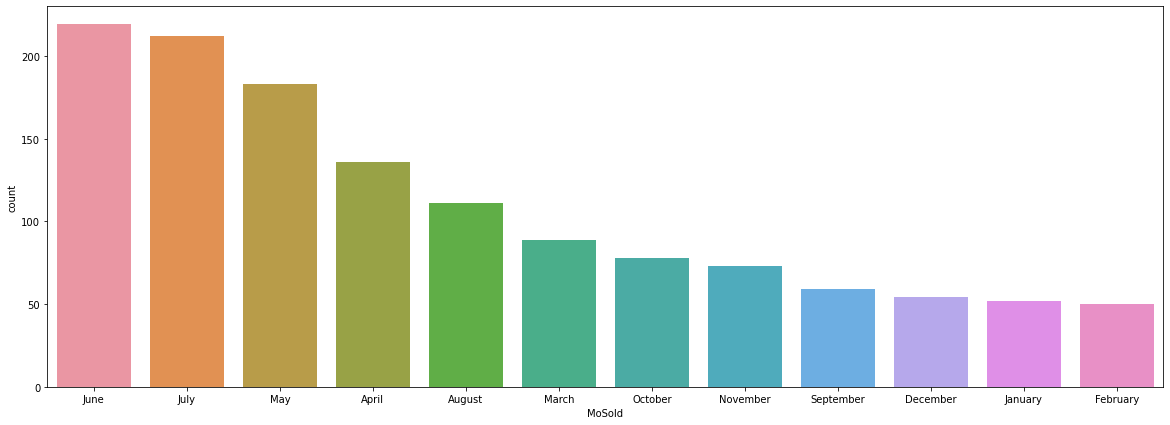

In [342]:
# Let's Plot to analyze
plt.figure(figsize=(20, 7))
sns.countplot(x = 'MoSold',data = df, order = df['MoSold'].value_counts().index)
plt.show()

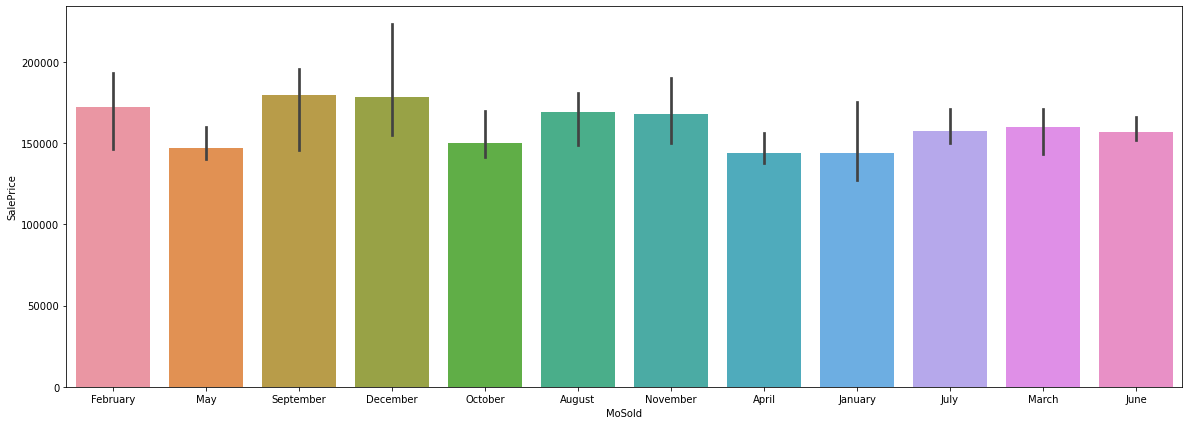

In [343]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='MoSold', y = 'SalePrice', estimator=np.median)
plt.show()

<b>Here we can see most house are sold in the month of June but the sale price is not much different on a average.</b>

In [344]:
# Checking the Value count
df['YrSold'].value_counts()

2009    305
2007    292
2006    284
2008    276
2010    159
Name: YrSold, dtype: int64

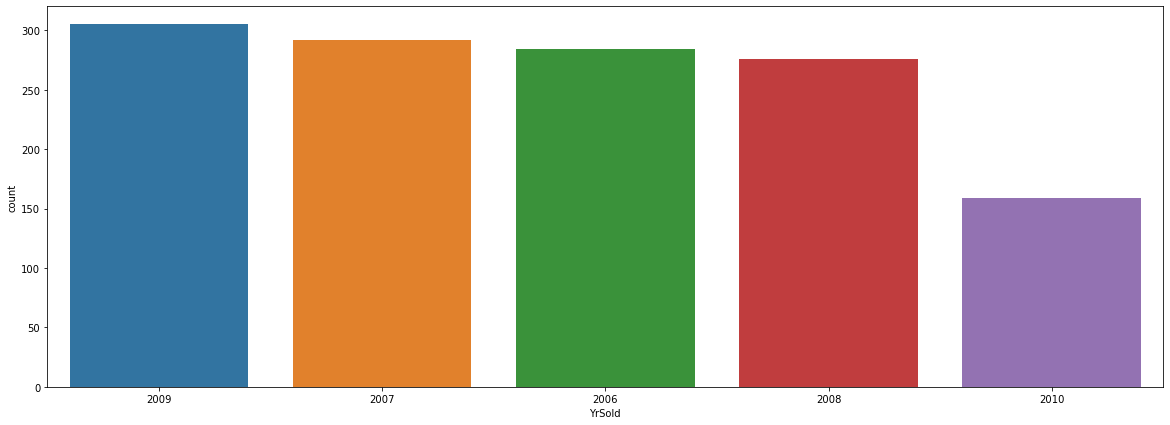

In [345]:
# Let's Plot to analyze
plt.figure(figsize=(20, 7))
sns.countplot(x = 'YrSold',data = df, order = df['YrSold'].value_counts().index)
plt.show()

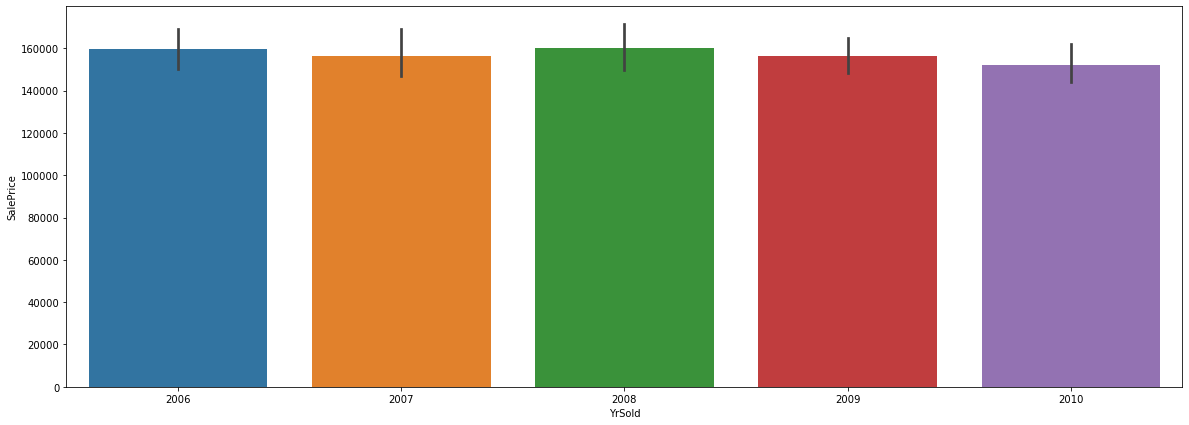

In [346]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='YrSold', y = 'SalePrice', estimator=np.median)
plt.show()

<b>Here we can see that there is not much affect of sale price and year sold.</b>

In [347]:
# Checking the Value count
df['SaleType'].value_counts()

WD       1148
New       103
COD        39
ConLD       8
ConLw       5
CWD         4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [348]:
# Checking the Value count in percentage
df['SaleType'].value_counts(1)

WD       0.872340
New      0.078267
COD      0.029635
ConLD    0.006079
ConLw    0.003799
CWD      0.003040
ConLI    0.003040
Oth      0.002280
Con      0.001520
Name: SaleType, dtype: float64

In [349]:
# Replacing categories having less than 3% to others
df['SaleType'].replace({'CWD' : 'Other',
                         'Con' : 'Other',
                         'Oth' : 'Other',
                         },inplace=True)

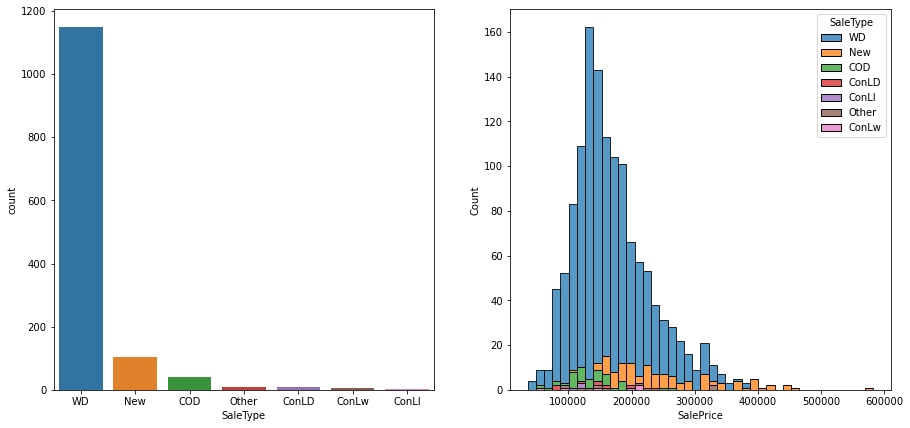

In [350]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'SaleType',data = df, order = df['SaleType'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='SaleType', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see that majority of sale type are conventional warranty deed. </b>

In [351]:
# Checking the Value count
df['SaleCondition'].value_counts()

Normal     1089
Partial     106
Abnorml      90
Family       18
Alloca        9
AdjLand       4
Name: SaleCondition, dtype: int64

In [352]:
# Checking the Value count in percentage
df['SaleCondition'].value_counts(1)

Normal     0.827508
Partial    0.080547
Abnorml    0.068389
Family     0.013678
Alloca     0.006839
AdjLand    0.003040
Name: SaleCondition, dtype: float64

In [353]:
# Replacing categories having less than 5% to others
df['SaleCondition'].replace({'AdjLand' : 'Other',
                         'Alloca' : 'Other',
                         'Family' : 'Other',
                         },inplace=True)

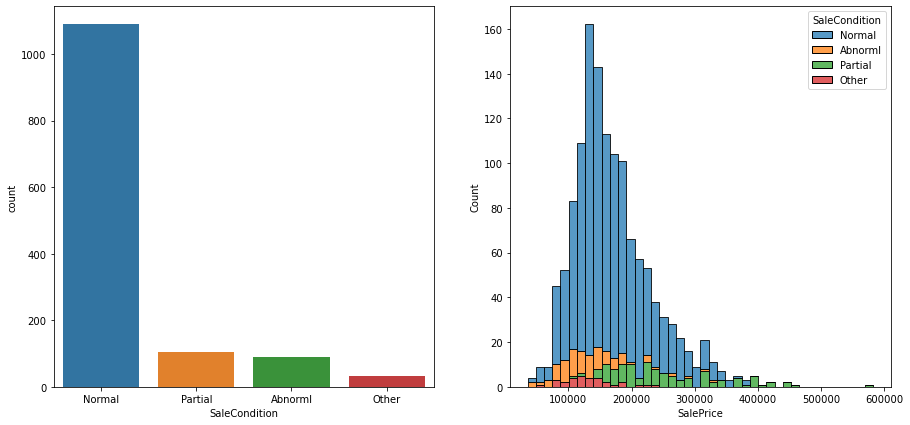

In [354]:
# Let's Plot to analyze
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(ax=axes[0], x = 'SaleCondition',data = df, order = df['SaleCondition'].value_counts().index)
sns.histplot(ax=axes[1], data=df, hue='SaleCondition', x = 'SalePrice',multiple='stack')
plt.show()

<b>Here we can see houses generally have normal sale condition.</b>

In [355]:
# Target Variable/ Output Variable
tar_var = df['SalePrice']
tar_var.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [356]:
# Creating a list of categorical variables
cat_vars = df.select_dtypes(include=['object'])
cat_vars.head(5)

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,No Fireplace,Attchd,RFn,No Fence,February,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,Other,Other,Feedr,1Fam,1Story,Average,Good,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,TA,Attchd,RFn,No Fence,May,WD,Normal
2,2-STORY 1946 & NEWER,RL,IReg,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,TA,Attchd,RFn,No Fence,September,WD,Normal
3,Other,RL,IReg,Corner,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Gd,Detchd,Unf,No Fence,February,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,IReg,Other,NoRidge,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,TA,Attchd,RFn,No Fence,December,WD,Normal


In [357]:
# Checking the shape of categorical variables
cat_vars.shape

(1316, 32)

In [358]:
# Creating a list of numeric variables
num_vars = df.select_dtypes(include=['int64'])
num_vars.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
0,65,8450,2003,2003,196,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2008,208500
1,80,9600,1976,1976,0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,2007,181500
2,68,11250,2001,2002,162,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,2008,223500
3,60,9550,1915,1970,0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,2006,140000
4,84,14260,2000,2000,350,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,2008,250000


In [359]:
num_vars.shape

(1316, 23)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1316 non-null   object
 1   MSZoning       1316 non-null   object
 2   LotFrontage    1316 non-null   int64 
 3   LotArea        1316 non-null   int64 
 4   LotShape       1316 non-null   object
 5   LotConfig      1316 non-null   object
 6   Neighborhood   1316 non-null   object
 7   Condition1     1316 non-null   object
 8   BldgType       1316 non-null   object
 9   HouseStyle     1316 non-null   object
 10  OverallQual    1316 non-null   object
 11  OverallCond    1316 non-null   object
 12  YearBuilt      1316 non-null   int64 
 13  YearRemodAdd   1316 non-null   int64 
 14  RoofStyle      1316 non-null   object
 15  Exterior1st    1316 non-null   object
 16  Exterior2nd    1316 non-null   object
 17  MasVnrType     1316 non-null   object
 18  MasVnrArea     1316 non-null

In [361]:
# Let's see how much correlation is there between the target variable and independent variables
df.corrwith(df.SalePrice).sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.695266
GarageCars      0.647258
GarageArea      0.637135
TotalBsmtSF     0.604828
YearBuilt       0.602159
FullBath        0.569669
1stFlrSF        0.566100
YearRemodAdd    0.545909
TotRmsAbvGrd    0.485110
Fireplaces      0.435647
OpenPorchSF     0.408427
MasVnrArea      0.399789
BsmtFinSF1      0.381316
LotFrontage     0.344582
LotArea         0.337498
WoodDeckSF      0.303039
2ndFlrSF        0.290371
HalfBath        0.275899
BsmtFullBath    0.239219
BsmtUnfSF       0.176841
BedroomAbvGr    0.160214
YrSold         -0.036143
dtype: float64

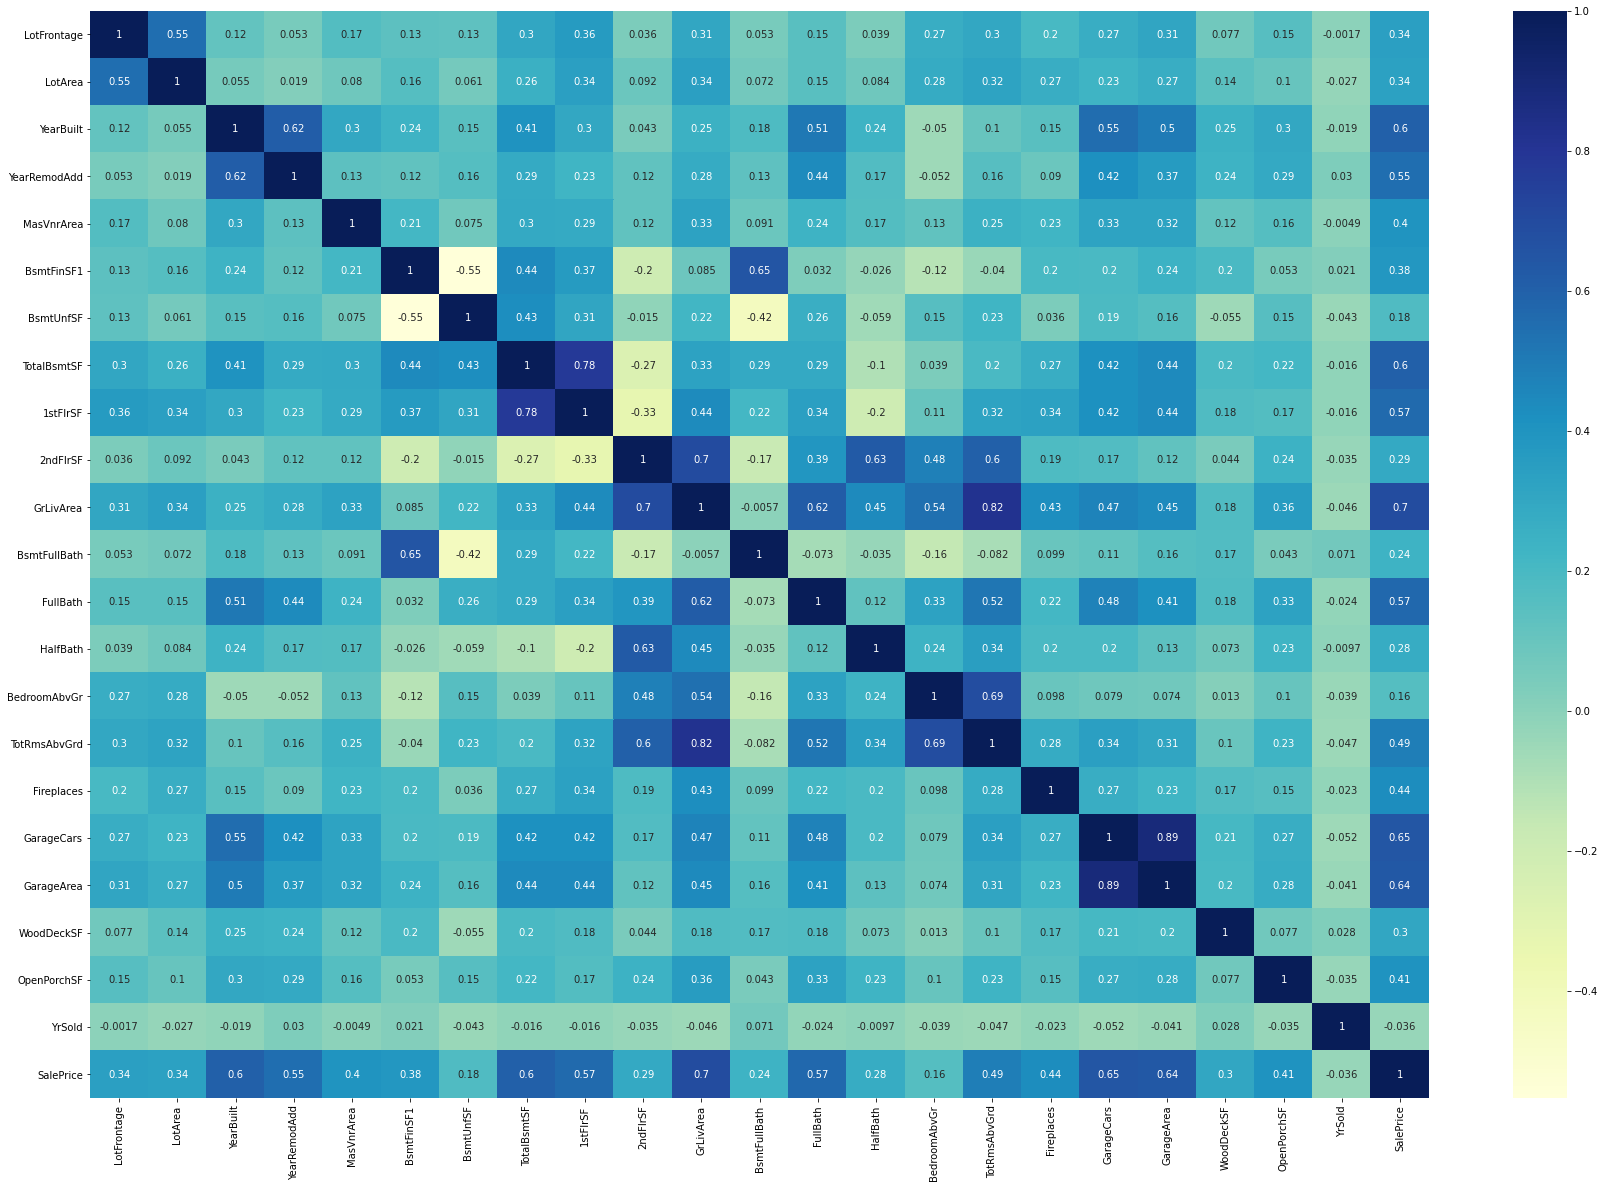

In [362]:
# Lets see the correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Dummy variable

In [363]:
# Creating dummy variables from categorical variables
cat_dummies = pd.get_dummies(cat_vars, drop_first=True)
cat_dummies.head(5)

,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [364]:
# Checking the shape of dummy variables
cat_dummies.shape

(1316, 138)

In [365]:
# Droping the original categorical variables from our dataframe
df = df.drop((cat_vars), axis=1)

In [366]:
# Merging the dummy variables in our dataframe
df = pd.concat([df, cat_dummies], axis=1)

In [367]:
# This will be the final dataframe
df.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,65,8450,2003,2003,196,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2008,208500,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,80,9600,1976,1976,0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,2007,181500,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,68,11250,2001,2002,162,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,2008,223500,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,60,9550,1915,1970,0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,2006,140000,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0

In [368]:
# Checking the shape of the dataframe
df.shape

(1316, 161)

In [369]:
# Now again checking the correlation of Sale Price to all variables
df.corrwith(df.SalePrice).sort_values(ascending=False)

SalePrice                                                           1.000000
GrLivArea                                                           0.695266
GarageCars                                                          0.647258
GarageArea                                                          0.637135
TotalBsmtSF                                                         0.604828
YearBuilt                                                           0.602159
FullBath                                                            0.569669
1stFlrSF                                                            0.566100
OverallQual_Good                                                    0.555768
YearRemodAdd                                                        0.545909
Foundation_PConc                                                    0.540541
ExterQual_Gd                                                        0.540266
TotRmsAbvGrd                                                        0.485110

### Splitting the Data into Training and Testing Sets

In [370]:
# Splitting the data set into train and test set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [371]:
# Initialising the scaler variable
scaler = StandardScaler()

In [372]:
# Fitting our scaler to the train set
df_train[list(num_vars)] = scaler.fit_transform(df_train[list(num_vars)])
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
68,-1.141032,-1.256050,-0.865958,-1.642975,-0.617788,-1.020498,0.485830,-0.685551,-1.096086,-0.802717,-1.620237,-0.828053,-0.997722,-0.729536,-1.046484,-1.559032,-0.928177,-0.957422,-1.147351,-0.784220,-0.747563,1.626385,-1.398353,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
149,0.060985,-0.829186,-1.166983,-1.642975,-0.617788,-1.020498,0.840579,-0.292536,-0.650755,0.293920,-0.238721,-0.828053,-0.997722,-0.729536,0.201977,0.425125,-0.928177,-0.957422,-1.049112,1.068981,1.487335,-1.358967,-0.858686,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
605,0.935179,1.095886,-0.197015,0.281211,0.710376,0.074232,-0.545083,-0.630159,0.215999,1.155564,1.246929,-0.828053,0.866177,1.264241,0.201977,0.425125,2.285548,0.422524,0.159225,-0.784220,0.075821,0.880047,0.529031,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0

In [373]:
df_train.shape

(921, 161)

In [374]:
# Transforming our scaler to the test set
df_test[list(num_vars)] = scaler.transform(df_test[list(num_vars)])
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
1091,-2.397685,-1.896345,0.940188,0.762258,0.982046,0.209265,-1.078396,-1.073290,-1.463709,0.734534,-0.451618,1.127427,0.866177,1.264241,-1.046484,-1.559032,-0.928177,0.422524,0.041338,-0.784220,0.193447,0.133709,-0.164827,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
31,0.060985,-0.226554,-0.163568,1.050886,-0.617788,-1.020498,1.631025,0.583174,0.341529,-0.802717,-0.507156,-0.828053,-0.997722,1.264241,0.201977,-0.236260,-0.928177,-0.957422,-0.896842,-0.784220,0.526721,0.133709,-0.329040,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1277,0.060985,2.213004,-0.130121,-0.392254,2.091365,0.252668,1.450079,1.775405,1.823976,-0.802717,0.640635,1.127427,-0.997722,1.264241,0.201977,0.425125,0.678686,0.422524,0.129753,-0.784220,-0.747563,0.880047,0.419556,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,

In [375]:
df_test.shape

(395, 161)

### Dividing into X and Y sets for the model building

In [376]:
# Creating X_train and y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [377]:
# Creating X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

### Using RFE for Feature Selection

In [378]:
# Initialising and fitting our linear model on train set
lm = LinearRegression()
lm.fit(X_train, y_train)

# Initialising RFE

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [379]:
# List of all the variables showing if they are supported by RFE or not and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 105),
 ('LotArea', False, 22),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 107),
 ('MasVnrArea', False, 45),
 ('BsmtFinSF1', False, 43),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 81),
 ('BsmtFullBath', False, 98),
 ('FullBath', False, 89),
 ('HalfBath', False, 97),
 ('BedroomAbvGr', False, 79),
 ('TotRmsAbvGrd', False, 48),
 ('Fireplaces', False, 76),
 ('GarageCars', False, 9),
 ('GarageArea', False, 35),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 84),
 ('YrSold', False, 110),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 44),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  21),
 ('MSSubClass_2-STORY 1946 & NEWER', False, 36),
 ('MSSubClass_Other', False, 49),
 ('MSZoning_RL', False, 32),
 ('MSZoning_RM', True, 1),
 ('LotShape_Reg', False, 92),
 ('LotConfig_Inside', False, 85),
 ('LotConfig_Other', False, 68),
 ('Neighborhood

In [380]:
# Variable with RFE support
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'BldgType_Other', 'BldgType_TwnhsE',
       'OverallQual_Excellent', 'OverallCond_Below Average',
       'OverallCond_Excellent', 'OverallCond_Good', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'ExterCond_Po', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_No Fireplace', 'FireplaceQu_Po',
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort',

In [381]:
# Variable not supported by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       ...
       'MoSold_November', 'MoSold_October', 'MoSold_September',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Other',
       'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Other'],
      dtype='object', length=110)

In [382]:
X_train_rfe = X_train[col]

In [383]:
# Adding the constant to our traing data
X_train = sm.add_constant(X_train_rfe)

In [384]:
# Building our model
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:07   Log-Likelihood:                -213.34
No. Observations:                 921   AIC:                             528.7
Df Residuals:                     870   BIC:                             774.8
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [385]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,806.01
43,GarageType_Attchd,117.18
47,GarageType_Detchd,94.68
49,SaleType_New,35.41
50,SaleCondition_Partial,35.09
48,GarageType_No Garage,30.25
23,MasVnrType_None,29.38
45,GarageType_BuiltIn,27.87
22,MasVnrType_BrkFace,26.29
40,FireplaceQu_No Fireplace,25.96


In [386]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_2 = X_train.drop(['GarageType_Attchd'], axis = 1)

In [387]:
X_train = sm.add_constant(X_train_2)

In [388]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:                -215.66
No. Observations:                 921   AIC:                             531.3
Df Residuals:                     871   BIC:                             772.6
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [389]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,348.44
48,SaleType_New,35.40
49,SaleCondition_Partial,35.08
23,MasVnrType_None,29.38
22,MasVnrType_BrkFace,26.29
40,FireplaceQu_No Fireplace,25.94
27,ExterQual_TA,19.78
39,FireplaceQu_Gd,18.51
42,FireplaceQu_TA,17.58
26,ExterQual_Gd,16.64


In [390]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_3 = X_train.drop(['SaleType_New'], axis = 1)

In [391]:
X_train = sm.add_constant(X_train_3)

In [392]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     172.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:                -223.62
No. Observations:                 921   AIC:                             545.2
Df Residuals:                     872   BIC:                             781.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [393]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,348.33
23,MasVnrType_None,29.38
22,MasVnrType_BrkFace,26.29
40,FireplaceQu_No Fireplace,25.93
27,ExterQual_TA,19.70
39,FireplaceQu_Gd,18.50
42,FireplaceQu_TA,17.56
26,ExterQual_Gd,16.61
24,MasVnrType_Stone,11.09
37,KitchenQual_TA,10.58


In [394]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_4 = X_train.drop(['MasVnrType_None'], axis = 1)

In [395]:
X_train = sm.add_constant(X_train_4)

In [396]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:                -225.29
No. Observations:                 921   AIC:                             546.6
Df Residuals:                     873   BIC:                             778.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [397]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,225.22
39,FireplaceQu_No Fireplace,25.93
26,ExterQual_TA,19.70
38,FireplaceQu_Gd,18.50
41,FireplaceQu_TA,17.56
25,ExterQual_Gd,16.61
36,KitchenQual_TA,10.58
35,KitchenQual_Gd,8.43
30,BsmtQual_TA,7.54
29,BsmtQual_Gd,6.02


In [398]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_5 = X_train.drop(['FireplaceQu_No Fireplace'], axis = 1)

In [399]:
X_train = sm.add_constant(X_train_5)

In [400]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:                -231.64
No. Observations:                 921   AIC:                             557.3
Df Residuals:                     874   BIC:                             784.1
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [401]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,117.66
26,ExterQual_TA,19.24
25,ExterQual_Gd,16.09
36,KitchenQual_TA,10.49
35,KitchenQual_Gd,8.35
30,BsmtQual_TA,7.52
29,BsmtQual_Gd,5.98
1,YearBuilt,5.26
3,1stFlrSF,4.15
2,TotalBsmtSF,4.06


In [402]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_6 = X_train.drop(['ExterQual_TA'], axis = 1)

In [403]:
X_train = sm.add_constant(X_train_6)

In [404]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     178.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:09   Log-Likelihood:                -239.29
No. Observations:                 921   AIC:                             570.6
Df Residuals:                     875   BIC:                             792.5
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [405]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.68
35,KitchenQual_TA,10.32
34,KitchenQual_Gd,8.26
29,BsmtQual_TA,7.36
28,BsmtQual_Gd,5.82
1,YearBuilt,5.25
3,1stFlrSF,4.15
2,TotalBsmtSF,4.00
25,ExterQual_Gd,2.61
33,KitchenQual_Fa,2.30


In [406]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_7 = X_train.drop(['KitchenQual_TA'], axis = 1)

In [407]:
X_train = sm.add_constant(X_train_7)

In [408]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     174.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:09   Log-Likelihood:                -256.71
No. Observations:                 921   AIC:                             603.4
Df Residuals:                     876   BIC:                             820.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [409]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.37
29,BsmtQual_TA,7.32
28,BsmtQual_Gd,5.77
1,YearBuilt,5.20
3,1stFlrSF,4.13
2,TotalBsmtSF,3.99
25,ExterQual_Gd,2.55
11,Neighborhood_NAmes,2.11
34,KitchenQual_Gd,2.06
27,BsmtQual_Fa,1.90


In [410]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_8 = X_train.drop(['BsmtQual_TA'], axis = 1)

In [411]:
X_train = sm.add_constant(X_train_8)

In [412]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:09   Log-Likelihood:                -285.82
No. Observations:                 921   AIC:                             659.6
Df Residuals:                     877   BIC:                             872.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [413]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.60
1,YearBuilt,4.61
3,1stFlrSF,3.37
2,TotalBsmtSF,3.19
25,ExterQual_Gd,2.55
28,BsmtQual_Gd,2.30
33,KitchenQual_Gd,2.06
11,Neighborhood_NAmes,2.06
5,MSZoning_RM,1.87
41,GarageType_Detchd,1.82


In [414]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_9 = X_train.drop(['BsmtQual_Fa'], axis = 1)

In [415]:
X_train = sm.add_constant(X_train_9)

In [416]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:09   Log-Likelihood:                -285.82
No. Observations:                 921   AIC:                             657.6
Df Residuals:                     878   BIC:                             865.1
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [417]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.54
1,YearBuilt,4.54
3,1stFlrSF,3.37
2,TotalBsmtSF,3.19
25,ExterQual_Gd,2.54
27,BsmtQual_Gd,2.29
32,KitchenQual_Gd,2.06
11,Neighborhood_NAmes,2.06
5,MSZoning_RM,1.87
4,2ndFlrSF,1.82


In [418]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_10 = X_train.drop(['GarageType_CarPort'], axis = 1)

In [419]:
X_train = sm.add_constant(X_train_10)

In [420]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:10   Log-Likelihood:                -285.83
No. Observations:                 921   AIC:                             655.7
Df Residuals:                     879   BIC:                             858.3
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [421]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.35
1,YearBuilt,4.48
3,1stFlrSF,3.36
2,TotalBsmtSF,3.13
25,ExterQual_Gd,2.54
27,BsmtQual_Gd,2.29
32,KitchenQual_Gd,2.06
11,Neighborhood_NAmes,2.05
5,MSZoning_RM,1.86
4,2ndFlrSF,1.82


In [422]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_11 = X_train.drop(['KitchenQual_Gd'], axis = 1)

In [423]:
X_train = sm.add_constant(X_train_11)

In [424]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:10   Log-Likelihood:                -285.88
No. Observations:                 921   AIC:                             653.8
Df Residuals:                     880   BIC:                             851.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [425]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.91
1,YearBuilt,4.40
3,1stFlrSF,3.34
2,TotalBsmtSF,3.13
27,BsmtQual_Gd,2.28
25,ExterQual_Gd,2.25
11,Neighborhood_NAmes,2.05
5,MSZoning_RM,1.86
4,2ndFlrSF,1.80
38,GarageType_Detchd,1.78


In [426]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_12 = X_train.drop(['FireplaceQu_Fa'], axis = 1)

In [427]:
X_train = sm.add_constant(X_train_12)

In [428]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:10   Log-Likelihood:                -285.96
No. Observations:                 921   AIC:                             651.9
Df Residuals:                     881   BIC:                             844.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [429]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.60
1,YearBuilt,4.40
3,1stFlrSF,3.33
2,TotalBsmtSF,3.13
27,BsmtQual_Gd,2.28
25,ExterQual_Gd,2.25
11,Neighborhood_NAmes,2.05
5,MSZoning_RM,1.86
4,2ndFlrSF,1.80
37,GarageType_Detchd,1.77


In [430]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_13 = X_train.drop(['KitchenQual_Fa'], axis = 1)

In [431]:
X_train = sm.add_constant(X_train_13)

In [432]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:10   Log-Likelihood:                -286.12
No. Observations:                 921   AIC:                             650.2
Df Residuals:                     882   BIC:                             838.4
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [433]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.55
1,YearBuilt,4.37
3,1stFlrSF,3.33
2,TotalBsmtSF,3.12
27,BsmtQual_Gd,2.28
25,ExterQual_Gd,2.25
11,Neighborhood_NAmes,2.03
5,MSZoning_RM,1.84
4,2ndFlrSF,1.80
36,GarageType_Detchd,1.77


In [434]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_14 = X_train.drop(['ExterQual_Gd'], axis = 1)

In [435]:
X_train = sm.add_constant(X_train_14)

In [436]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     193.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:10   Log-Likelihood:                -289.24
No. Observations:                 921   AIC:                             654.5
Df Residuals:                     883   BIC:                             837.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [437]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.09
1,YearBuilt,4.08
3,1stFlrSF,3.28
2,TotalBsmtSF,3.11
26,BsmtQual_Gd,2.24
11,Neighborhood_NAmes,1.94
5,MSZoning_RM,1.83
35,GarageType_Detchd,1.77
4,2ndFlrSF,1.75
6,Neighborhood_CollgCr,1.67


In [438]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_15 = X_train.drop(['ExterQual_Fa'], axis = 1)

In [439]:
X_train = sm.add_constant(X_train_15)

In [440]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -289.39
No. Observations:                 921   AIC:                             652.8
Df Residuals:                     884   BIC:                             831.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [441]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.05
1,YearBuilt,4.08
3,1stFlrSF,3.26
2,TotalBsmtSF,3.11
25,BsmtQual_Gd,2.24
11,Neighborhood_NAmes,1.93
5,MSZoning_RM,1.83
34,GarageType_Detchd,1.77
4,2ndFlrSF,1.74
6,Neighborhood_CollgCr,1.67


In [442]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_16 = X_train.drop(['MasVnrType_BrkFace'], axis = 1)

In [443]:
X_train = sm.add_constant(X_train_16)

In [444]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -289.63
No. Observations:                 921   AIC:                             651.3
Df Residuals:                     885   BIC:                             825.0
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [445]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.52
1,YearBuilt,3.89
3,1stFlrSF,3.25
2,TotalBsmtSF,3.10
24,BsmtQual_Gd,2.22
11,Neighborhood_NAmes,1.89
5,MSZoning_RM,1.81
33,GarageType_Detchd,1.76
4,2ndFlrSF,1.72
6,Neighborhood_CollgCr,1.67


In [446]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_17 = X_train.drop(['FireplaceQu_Po'], axis = 1)

In [447]:
X_train = sm.add_constant(X_train_17)

In [448]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -290.31
No. Observations:                 921   AIC:                             650.6
Df Residuals:                     886   BIC:                             819.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [449]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.49
1,YearBuilt,3.89
3,1stFlrSF,3.25
2,TotalBsmtSF,3.09
24,BsmtQual_Gd,2.22
11,Neighborhood_NAmes,1.89
5,MSZoning_RM,1.81
32,GarageType_Detchd,1.76
4,2ndFlrSF,1.72
6,Neighborhood_CollgCr,1.67


In [450]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_18 = X_train.drop(['GarageType_Detchd'], axis = 1)

In [451]:
X_train = sm.add_constant(X_train_18)

In [452]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     217.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -291.17
No. Observations:                 921   AIC:                             650.3
Df Residuals:                     887   BIC:                             814.4
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [453]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.92
1,YearBuilt,3.64
3,1stFlrSF,3.19
2,TotalBsmtSF,3.09
24,BsmtQual_Gd,2.22
11,Neighborhood_NAmes,1.86
5,MSZoning_RM,1.80
4,2ndFlrSF,1.72
6,Neighborhood_CollgCr,1.67
29,FireplaceQu_TA,1.60


In [454]:
# Removing the variable with High VIF or low Significance and building the model again
X_train_19 = X_train.drop(['GarageType_Basment'], axis = 1)

In [455]:
X_train = sm.add_constant(X_train_19)

In [456]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     223.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -292.24
No. Observations:                 921   AIC:                             650.5
Df Residuals:                     888   BIC:                             809.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [457]:
# Calculate the VIFs for our model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.90
1,YearBuilt,3.63
3,1stFlrSF,3.16
2,TotalBsmtSF,3.06
24,BsmtQual_Gd,2.22
11,Neighborhood_NAmes,1.85
5,MSZoning_RM,1.79
4,2ndFlrSF,1.71
6,Neighborhood_CollgCr,1.67
29,FireplaceQu_TA,1.60


In [458]:
X_train_new = X_train.drop(['const'], axis=1)

### Residual Analysis

In [459]:
y_train_pred = lm.predict(X_train)

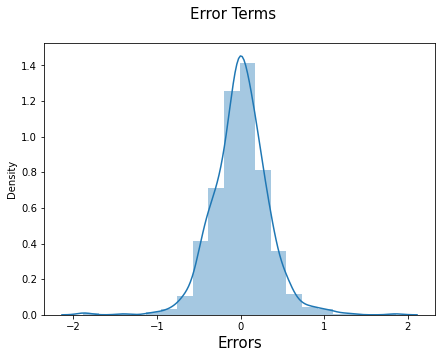

In [460]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(7,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)     
plt.show()

<b>The error terms look centered. Thus satisfying the condition for linear regression.</b>

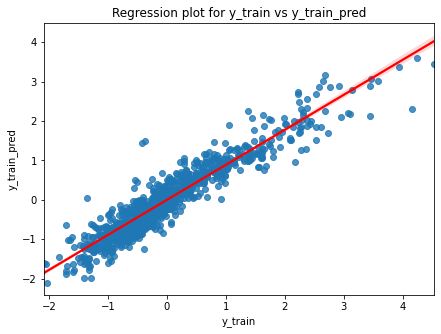

In [461]:
# Plotting y_train and y_train_pred to understand the spread.

plt.figure(figsize = (7,5))
sns.regplot(y_train, y_train_pred, line_kws={"color": "red"})
plt.title('Regression plot for y_train vs y_train_pred')
plt.xlabel('y_train')                        
plt.ylabel('y_train_pred')
plt.show()

In [462]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [463]:
y_test_pred = lm.predict(X_test_new)

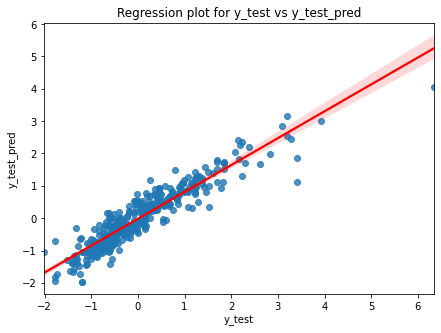

In [464]:
# Plotting y_test and y_pred to understand the spread.

plt.figure(figsize = (7,5))
sns.regplot(y_test, y_test_pred, line_kws={"color": "red"})
plt.title('Regression plot for y_test vs y_test_pred')
plt.xlabel('y_test')                        
plt.ylabel('y_test_pred')
plt.show()

<b>The test and train set are both showing decent linear relations.</b>

<b>After eleminiating the Higher VIF coeffiecients and Less Significant ones.  
We have our Final Model having :-  
R-squared : 0.890 , and  
Adj. R-squared: 0.886 
   
And the top 5 Most Important Predictor of Sales Price are :-  
OverallQual_Excellent,  
OverallCond_Excellent,  
2ndFlrSF,  
BsmtExposure_Gd,  
YearBuilt.</b>

## Regularization

### Model 1

### We are Regularizing the model we have just created using OLS and RFE

In [465]:
# Initialising Ridge Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [466]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 0.1}


<b>The Optimal Value of Lambda is 0.1 for Ridge Regression</b>

In [467]:
#Fitting Ridge model

alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [468]:
#Fitting Ridge model with 2 times the alpha

alpha2 = 2*alpha
ridge2 = Ridge(alpha=alpha2)
ridge2.fit(X_train, y_train)

Ridge(alpha=0.2)

In [469]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

R-squared on Training Set : 0.889548961870626
R-squared on Test Set : 0.8643301947971636
RSS on Training Set : 101.72540611715337
RSS on Test Set : 56.351218563353825
RMSE on Training Set : 0.1104510381293739
RMSE on Test Set : 0.14266131281861727


In [470]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge with twice the value of alpha
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

R-squared on Training Set : 0.889526447171181
R-squared on Test Set : 0.8643539155169226
RSS on Training Set : 101.74614215534228
RSS on Test Set : 56.34136602865298
RMSE on Training Set : 0.11047355282881899
RMSE on Test Set : 0.14263636969279234


In [471]:
# Initialising Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [472]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 0.0001}


<b>The Optimal Value of Lambda is 0.0001 for Lasso Regression</b>

In [473]:
#Fitting Lasso model

alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [474]:
#Fitting Lasso model with 2 times the alpha

alpha2 = 2*alpha
lasso2 = Lasso(alpha=alpha2)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [475]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

R-squared on Training Set : 0.8895343327184477
R-squared on Test Set : 0.8643590443363462
RSS on Training Set : 101.73887956630969
RSS on Test Set : 56.339235744586574
RMSE on Training Set : 0.11046566728155233
RMSE on Test Set : 0.1426309765685736


In [476]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Lasso with twice the alpha

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

R-squared on Training Set : 0.8894631682851103
R-squared on Test Set : 0.8643976347502493
RSS on Training Set : 101.80442200941343
RSS on Test Set : 56.3232069985804
RMSE on Training Set : 0.11053683171488972
RMSE on Test Set : 0.14259039746476052


### Coefficients after regularization

In [477]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [478]:
betas = pd.DataFrame(index=X_train.columns)

In [479]:
betas.rows = X_train.columns

In [480]:
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso2'] = lasso2.coef_

In [481]:
betas.head(297)

,Linear,Ridge,Lasso,Ridge2,Lasso2
const,4.046922e-17,0.000000,0.000000,0.000000,0.000000
YearBuilt,3.415405e-01,0.341344,0.340582,0.341133,0.339590
TotalBsmtSF,1.578958e-01,0.158470,0.158867,0.158998,0.159803
1stFlrSF,3.393059e-01,0.339011,0.339129,0.338770,0.338961
2ndFlrSF,3.948779e-01,0.395203,0.395889,0.395514,0.396888
MSZoning_RM,-2.412527e-01,-0.239910,-0.237547,-0.238658,-0.233884
Neighborhood_CollgCr,-2.396280e-01,-0.237799,-0.233922,-0.236041,-0.228245
Neighborhood_Crawfor,2.454411e-01,0.246133,0.246608,0.246738,0.247730
Neighborhood_Edwards,-2.733207e-01,-0.271138,-0.267664,-0.269104,-0.262038
Neighborhood_Gilbert,-3.840228e-01,-0.381271,-0.375724,-0.378591,-0.367460


In [482]:
round(betas['Ridge'].sort_values(ascending=False) , 2)

OverallQual_Excellent        0.93
OverallCond_Excellent        0.51
2ndFlrSF                     0.40
BsmtExposure_Gd              0.36
YearBuilt                    0.34
1stFlrSF                     0.34
BsmtFinType1_GLQ             0.26
Neighborhood_Crawfor         0.25
OverallCond_Good             0.25
SaleCondition_Partial        0.22
MasVnrType_Stone             0.16
TotalBsmtSF                  0.16
GarageType_BuiltIn           0.13
FireplaceQu_TA               0.08
FireplaceQu_Gd               0.08
const                        0.00
BsmtQual_Gd                 -0.12
GarageType_No Garage        -0.12
Neighborhood_Timber         -0.17
BldgType_TwnhsE             -0.24
Neighborhood_CollgCr        -0.24
MSZoning_RM                 -0.24
Neighborhood_SawyerW        -0.24
OverallCond_Below Average   -0.25
Neighborhood_Edwards        -0.27
Neighborhood_Mitchel        -0.33
Neighborhood_NWAmes         -0.34
Neighborhood_NAmes          -0.34
Neighborhood_Gilbert        -0.38
Neighborhood_S

<b>Top 5 Predictor Variable for Ridge are</b>  
OverallQual_Excellent  
OverallCond_Excellent  
2ndFlrSF  
BsmtExposure_Gd  
YearBuilt  

In [483]:
round(betas['Lasso'].sort_values(ascending=False) , 2)

OverallQual_Excellent        0.93
OverallCond_Excellent        0.51
2ndFlrSF                     0.40
BsmtExposure_Gd              0.36
YearBuilt                    0.34
1stFlrSF                     0.34
BsmtFinType1_GLQ             0.26
Neighborhood_Crawfor         0.25
OverallCond_Good             0.25
SaleCondition_Partial        0.22
MasVnrType_Stone             0.16
TotalBsmtSF                  0.16
GarageType_BuiltIn           0.12
FireplaceQu_Gd               0.08
FireplaceQu_TA               0.08
const                        0.00
BsmtQual_Gd                 -0.11
GarageType_No Garage        -0.12
Neighborhood_Timber         -0.16
BldgType_TwnhsE             -0.23
Neighborhood_CollgCr        -0.23
Neighborhood_SawyerW        -0.24
MSZoning_RM                 -0.24
OverallCond_Below Average   -0.25
Neighborhood_Edwards        -0.27
Neighborhood_Mitchel        -0.32
Neighborhood_NWAmes         -0.33
Neighborhood_NAmes          -0.34
Neighborhood_Gilbert        -0.38
Neighborhood_S

<b>Top 5 Predictor Variable for Lasso are</b>  
OverallQual_Excellent  
OverallCond_Excellent  
2ndFlrSF  
BsmtExposure_Gd  
YearBuilt  

In [484]:
round(betas['Ridge2'].sort_values(ascending=False) , 2)

OverallQual_Excellent        0.92
OverallCond_Excellent        0.51
2ndFlrSF                     0.40
BsmtExposure_Gd              0.36
YearBuilt                    0.34
1stFlrSF                     0.34
BsmtFinType1_GLQ             0.26
Neighborhood_Crawfor         0.25
OverallCond_Good             0.25
SaleCondition_Partial        0.22
MasVnrType_Stone             0.17
TotalBsmtSF                  0.16
GarageType_BuiltIn           0.13
FireplaceQu_TA               0.08
FireplaceQu_Gd               0.08
const                        0.00
BsmtQual_Gd                 -0.12
GarageType_No Garage        -0.12
Neighborhood_Timber         -0.17
BldgType_TwnhsE             -0.24
Neighborhood_CollgCr        -0.24
Neighborhood_SawyerW        -0.24
MSZoning_RM                 -0.24
OverallCond_Below Average   -0.25
Neighborhood_Edwards        -0.27
Neighborhood_Mitchel        -0.32
Neighborhood_NWAmes         -0.33
Neighborhood_NAmes          -0.34
Neighborhood_Gilbert        -0.38
Neighborhood_S

<b>Top 5 Predictor Variable for Ridge with double the alpha value are</b>  
OverallQual_Excellent  
OverallCond_Excellent  
2ndFlrSF  
BsmtExposure_Gd  
YearBuilt  

In [485]:
round(betas['Lasso2'].sort_values(ascending=False) , 2)

OverallQual_Excellent        0.93
OverallCond_Excellent        0.50
2ndFlrSF                     0.40
BsmtExposure_Gd              0.36
YearBuilt                    0.34
1stFlrSF                     0.34
BsmtFinType1_GLQ             0.26
Neighborhood_Crawfor         0.25
OverallCond_Good             0.25
SaleCondition_Partial        0.22
MasVnrType_Stone             0.17
TotalBsmtSF                  0.16
GarageType_BuiltIn           0.12
FireplaceQu_Gd               0.08
FireplaceQu_TA               0.08
const                        0.00
BsmtQual_Gd                 -0.11
GarageType_No Garage        -0.12
Neighborhood_Timber         -0.15
Neighborhood_SawyerW        -0.23
Neighborhood_CollgCr        -0.23
BldgType_TwnhsE             -0.23
MSZoning_RM                 -0.23
OverallCond_Below Average   -0.25
Neighborhood_Edwards        -0.26
Neighborhood_Mitchel        -0.31
Neighborhood_NWAmes         -0.32
Neighborhood_NAmes          -0.33
Neighborhood_Gilbert        -0.37
Neighborhood_S

<b>Top 5 Predictor Variable for Lasso with double the alpha value are</b>  
OverallQual_Excellent  
OverallCond_Excellent  
2ndFlrSF  
BsmtExposure_Gd  
YearBuilt  

In [486]:
# Dropping top 5 variables in Lasso
X_train_new2 = X_train.drop(['OverallQual_Excellent','OverallCond_Excellent','2ndFlrSF','BsmtExposure_Gd',
                             'YearBuilt'], axis=1)

In [487]:
# Initialising new Lasso Regression after droping the 5 variables
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [488]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 0.001}


In [489]:
#Fitting Lasso model

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new2, y_train) 

Lasso(alpha=0.001)

In [490]:
betas = pd.DataFrame(index=X_train_new2.columns)

In [491]:
betas['Lasso'] = lasso.coef_

In [492]:
round(betas['Lasso'].sort_values(ascending=False) , 2)

GarageType_BuiltIn           0.71
BsmtFinType1_GLQ             0.51
SaleCondition_Partial        0.45
MasVnrType_Stone             0.33
FireplaceQu_TA               0.32
1stFlrSF                     0.22
FireplaceQu_Gd               0.22
TotalBsmtSF                  0.21
OverallCond_Good             0.05
Neighborhood_Crawfor         0.04
Neighborhood_Timber          0.00
const                        0.00
BsmtQual_Gd                 -0.02
ExterCond_Po                -0.14
Neighborhood_CollgCr        -0.15
BldgType_TwnhsE             -0.19
Neighborhood_SawyerW        -0.20
Neighborhood_Gilbert        -0.20
BldgType_Other              -0.25
Neighborhood_Mitchel        -0.37
GarageType_No Garage        -0.37
BsmtCond_Po                 -0.38
Neighborhood_NWAmes         -0.38
OverallCond_Below Average   -0.42
Neighborhood_Edwards        -0.42
MSZoning_RM                 -0.47
Neighborhood_NAmes          -0.57
Neighborhood_Sawyer         -0.64
Name: Lasso, dtype: float64

<b>After dropping the top 5 variables from the Lasso Model these are the next top 5 Variables</b>

1) GarageType_BuiltIn,  
2) BsmtFinType1_GLQ,  
3) SaleCondition_Partial,  
4) MasVnrType_Stone,  
5) FireplaceQu_TA.              

# Model 2

## Creating Another Model using all independent variables i.e without using any RFE

In [493]:
# Test-Train Split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [494]:
# Initialising the scaler variable
scaler = StandardScaler()

In [495]:
df_train[list(num_vars)] = scaler.fit_transform(df_train[list(num_vars)])
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
68,-1.141032,-1.256050,-0.865958,-1.642975,-0.617788,-1.020498,0.485830,-0.685551,-1.096086,-0.802717,-1.620237,-0.828053,-0.997722,-0.729536,-1.046484,-1.559032,-0.928177,-0.957422,-1.147351,-0.784220,-0.747563,1.626385,-1.398353,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
149,0.060985,-0.829186,-1.166983,-1.642975,-0.617788,-1.020498,0.840579,-0.292536,-0.650755,0.293920,-0.238721,-0.828053,-0.997722,-0.729536,0.201977,0.425125,-0.928177,-0.957422,-1.049112,1.068981,1.487335,-1.358967,-0.858686,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
605,0.935179,1.095886,-0.197015,0.281211,0.710376,0.074232,-0.545083,-0.630159,0.215999,1.155564,1.246929,-0.828053,0.866177,1.264241,0.201977,0.425125,2.285548,0.422524,0.159225,-0.784220,0.075821,0.880047,0.529031,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0

In [496]:
df_test[list(num_vars)] = scaler.transform(df_test[list(num_vars)])
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Norm,Condition1_Other,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
1091,-2.397685,-1.896345,0.940188,0.762258,0.982046,0.209265,-1.078396,-1.073290,-1.463709,0.734534,-0.451618,1.127427,0.866177,1.264241,-1.046484,-1.559032,-0.928177,0.422524,0.041338,-0.784220,0.193447,0.133709,-0.164827,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
31,0.060985,-0.226554,-0.163568,1.050886,-0.617788,-1.020498,1.631025,0.583174,0.341529,-0.802717,-0.507156,-0.828053,-0.997722,1.264241,0.201977,-0.236260,-0.928177,-0.957422,-0.896842,-0.784220,0.526721,0.133709,-0.329040,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1277,0.060985,2.213004,-0.130121,-0.392254,2.091365,0.252668,1.450079,1.775405,1.823976,-0.802717,0.640635,1.127427,-0.997722,1.264241,0.201977,0.425125,0.678686,0.422524,0.129753,-0.784220,-0.747563,0.880047,0.419556,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,

In [497]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [498]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [499]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [500]:
# Initialising Ridge Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [501]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 6.0}


<b>The Optimal Value of Lambda is 6.0 for Ridge Regression</b>

In [502]:
#Fitting Ridge model

alpha = 6.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=6.0)

In [503]:
#Fitting Ridge model with 2 times the alpha

alpha2 = 2*alpha
ridge2 = Ridge(alpha=alpha2)
ridge2.fit(X_train, y_train)

Ridge(alpha=12.0)

In [504]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

R-squared on Training Set : 0.9291407978404908
R-squared on Test Set : 0.8861973785014026
RSS on Training Set : 65.26132518890805
RSS on Test Set : 47.26856051397958
RMSE on Training Set : 0.07085920215950928
RMSE on Test Set : 0.11966724180754323


In [505]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge with twice the value of alpha
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

R-squared on Training Set : 0.9253895742875182
R-squared on Test Set : 0.8833328272891623
RSS on Training Set : 68.71620208119575
RSS on Test Set : 48.4583680117167
RMSE on Training Set : 0.0746104257124818
RMSE on Test Set : 0.12267941268789039


In [506]:
# Initialising Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [507]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 0.001}


<b>The Optimal Value of Lambda is 0.001 for Lasso Regression</b>

In [508]:
#Fitting Lasso model

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [509]:
#Fitting Lasso model with 2 times the alpha

alpha2 = 2*alpha
lasso2 = Lasso(alpha=alpha2)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.002)

In [510]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

R-squared on Training Set : 0.9276124350536974
R-squared on Test Set : 0.8888690336025521
RSS on Training Set : 66.66894731554467
RSS on Test Set : 46.15887350362608
RMSE on Training Set : 0.07238756494630258
RMSE on Test Set : 0.11685790760411667


In [511]:
# Lets calculate some metrics such as R2 score, RSS and RMSE on Lasso with twice the alpha

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared on Training Set : ' + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared on Test Set : ' + str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Training Set : ' + str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test Set : ' + str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE on Training Set : ' + str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE on Test Set : ' + str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

R-squared on Training Set : 0.9210693839052689
R-squared on Test Set : 0.8849760361973702
RSS on Training Set : 72.69509742324732
RSS on Test Set : 47.77585192648145
RMSE on Training Set : 0.07893061609473108
RMSE on Test Set : 0.12095152386451


In [512]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [513]:
betas = pd.DataFrame(index=X_train.columns)

In [514]:
betas.rows = X_train.columns

In [515]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso2'] = lasso2.coef_

In [516]:
round(betas['Ridge'].sort_values(ascending=False) , 2)

OverallQual_Excellent                                               0.46
Neighborhood_Crawfor                                                0.25
OverallCond_Excellent                                               0.24
SaleType_New                                                        0.23
Neighborhood_NridgHt                                                0.22
2ndFlrSF                                                            0.21
TotalBsmtSF                                                         0.19
OverallCond_Good                                                    0.18
OverallQual_Good                                                    0.17
BsmtExposure_Gd                                                     0.17
1stFlrSF                                                            0.15
SaleCondition_Normal                                                0.15
SaleType_Other                                                      0.14
YearBuilt                                          

<b>Top 5 Predictor Variable for Ridge are</b>  
OverallQual_Excellent  
Neighborhood_Crawfor  
OverallCond_Excellent  
SaleType_New  
Neighborhood_NridgHt

In [517]:
round(betas['Lasso'].sort_values(ascending=False) , 2)

OverallQual_Excellent                                               0.65
SaleType_New                                                        0.31
Neighborhood_Crawfor                                                0.31
OverallCond_Excellent                                               0.30
2ndFlrSF                                                            0.26
Neighborhood_NridgHt                                                0.24
OverallQual_Good                                                    0.20
OverallCond_Good                                                    0.19
1stFlrSF                                                            0.19
BsmtExposure_Gd                                                     0.18
TotalBsmtSF                                                         0.17
YearBuilt                                                           0.14
SaleCondition_Normal                                                0.14
SaleType_Other                                     

<b>Top 5 Predictor Variable for Lasso are</b>  
OverallQual_Excellent   
SaleType_New  
Neighborhood_Crawfor   
OverallCond_Excellent  
2ndFlrSF               

In [518]:
round(betas['Ridge2'].sort_values(ascending=False) , 2)

OverallQual_Excellent                                               0.39
Neighborhood_NridgHt                                                0.22
Neighborhood_Crawfor                                                0.22
TotalBsmtSF                                                         0.18
OverallCond_Excellent                                               0.18
2ndFlrSF                                                            0.18
SaleType_New                                                        0.17
OverallCond_Good                                                    0.17
OverallQual_Good                                                    0.15
BsmtExposure_Gd                                                     0.15
GrLivArea                                                           0.15
YearBuilt                                                           0.13
SaleCondition_Normal                                                0.12
1stFlrSF                                           

<b>Top 5 Predictor Variable for Ridge with double the alpha value are</b>  
OverallQual_Excellent  
Neighborhood_NridgHt  
Neighborhood_Crawfor  
TotalBsmtSF    
OverallCond_Excellent

In [519]:
round(betas['Lasso2'].sort_values(ascending=False) , 2)

OverallQual_Excellent                                               0.72
Neighborhood_Crawfor                                                0.30
SaleType_New                                                        0.29
Neighborhood_NridgHt                                                0.27
OverallCond_Excellent                                               0.23
OverallQual_Good                                                    0.20
OverallCond_Good                                                    0.19
2ndFlrSF                                                            0.19
TotalBsmtSF                                                         0.18
BsmtExposure_Gd                                                     0.17
YearBuilt                                                           0.16
GrLivArea                                                           0.16
1stFlrSF                                                            0.11
SaleCondition_Normal                               

<b>Top 5 Predictor Variable for Lasso with double the alpha value are</b>  
OverallQual_Excellent  
Neighborhood_Crawfor  
SaleType_New  
Neighborhood_NridgHt  
OverallCond_Excellent  

In [520]:
# Dropping top 5 variables in Lasso
X_train_new2 = X_train.drop(['OverallQual_Excellent','SaleType_New','Neighborhood_Crawfor','OverallCond_Excellent',
                             '2ndFlrSF'], axis=1)

In [521]:
# Initialising Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [522]:
# Printing the best hyperparameter alpha / Optimal Value of Lambda
print(model_cv.best_params_)

{'alpha': 0.001}


In [523]:
#Fitting Lasso model

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new2, y_train)

Lasso(alpha=0.001)

In [524]:
betas = pd.DataFrame(index=X_train_new2.columns)

In [525]:
betas['Lasso'] = lasso.coef_

In [526]:
round(betas['Lasso'].sort_values(ascending=False) , 2)

GrLivArea                                                           0.33
Neighborhood_NridgHt                                                0.22
SaleCondition_Partial                                               0.20
TotalBsmtSF                                                         0.18
BsmtExposure_Gd                                                     0.17
SaleType_Other                                                      0.15
OverallCond_Good                                                    0.15
SaleCondition_Normal                                                0.13
YearBuilt                                                           0.13
BsmtCond_TA                                                         0.13
OverallQual_Good                                                    0.13
BsmtCond_Gd                                                         0.12
BsmtFinType1_GLQ                                                    0.10
Condition1_Norm                                    

<b>After dropping the top 5 variables from the Lasso Model these are the next top 5 Variables</b>

1) GrLivArea                                                  
2) Neighborhood_NridgHt                                      
3) SaleCondition_Partial                                
4) TotalBsmtSF                                                   
5) BsmtExposure_Gd

## Final Summary


1st Model Using RFE - 

The Optimal Value of Lambda for Ridge comes out to be = 0.1, the metrics it provided are as follows :-  

R-squared on Training Set : 0.889548961870626  
R-squared on Test Set : 0.8643301947971636  
RSS on Training Set : 101.72540611715337  
RSS on Test Set : 56.351218563353825  
RMSE on Training Set : 0.1104510381293739  
RMSE on Test Set : 0.14266131281861727  

Doubling the Lambda Value of alpha for Ridge gave us these results :-  

R-squared on Training Set : 0.889526447171181  
R-squared on Test Set : 0.8643539155169226  
RSS on Training Set : 101.74614215534228  
RSS on Test Set : 56.34136602865298  
RMSE on Training Set : 0.11047355282881899  
RMSE on Test Set : 0.14263636969279234  

The Optimal Value of Lambda for Lasso comes out to be = 0.0001, the metrics it provided are as follows :-  

R-squared on Training Set : 0.8895343327184477  
R-squared on Test Set : 0.8643590443363462  
RSS on Training Set : 101.73887956630969  
RSS on Test Set : 56.339235744586574  
RMSE on Training Set : 0.11046566728155233  
RMSE on Test Set : 0.1426309765685736  

Doubling the Lambda Value of alpha for Lasso gave us these results :-  

R-squared on Training Set : 0.8894631682851103  
R-squared on Test Set : 0.8643976347502493  
RSS on Training Set : 101.80442200941343  
RSS on Test Set : 56.3232069985804  
RMSE on Training Set : 0.11053683171488972  
RMSE on Test Set : 0.14259039746476052  

Top 3 most important predictor variables after doubling the alpha value are :-   

For Ridge and Lasso both are same -   

1) OverallQual_Excellent  
2) OverallCond_Excellent  
3) 2ndFlrSF   

2nd Model Directly Putting the data into Ridge and Lasso -   

The Optimal Value of Lambda for Ridge comes out to be = 6.0, the metrics it provided are as follows :-  

R-squared on Training Set : 0.9291407978404908  
R-squared on Test Set : 0.8861973785014026  
RSS on Training Set : 65.26132518890805  
RSS on Test Set : 47.26856051397958  
RMSE on Training Set : 0.07085920215950928  
RMSE on Test Set : 0.11966724180754323  

Doubling the Lambda Value of alpha for Ridge gave us these results :-  

R-squared on Training Set : 0.9253895742875182  
R-squared on Test Set : 0.8833328272891623  
RSS on Training Set : 68.71620208119575  
RSS on Test Set : 48.4583680117167  
RMSE on Training Set : 0.0746104257124818  
RMSE on Test Set : 0.12267941268789039  

The Optimal Value of Lambda for Lasso comes out to be = 0.001, the metrics it provided are as follows :-  

R-squared on Training Set : 0.9276124350536974  
R-squared on Test Set : 0.8888690336025521  
RSS on Training Set : 66.66894731554467  
RSS on Test Set : 46.15887350362608  
RMSE on Training Set : 0.07238756494630258  
RMSE on Test Set : 0.11685790760411667  

Doubling the Lambda Value of alpha for Lasso gave us these results :-  

R-squared on Training Set : 0.9210693839052689  
R-squared on Test Set : 0.8849760361973702  
RSS on Training Set : 72.69509742324732  
RSS on Test Set : 47.77585192648145  
RMSE on Training Set : 0.07893061609473108  
RMSE on Test Set : 0.12095152386451  

Top 3 most important predictor variables after doubling the alpha value are :-   

For Ridge -  

1) OverallQual_Excellent   
2) Neighborhood_NridgHt  
3) Neighborhood_Crawfor   
and Lasso -   

1) OverallQual_Excellent                                 
2) Neighborhood_Crawfor                                             
3) SaleType_New  